<a href="https://colab.research.google.com/github/AswiniKumar55/Shopify-EDA-Analysis/blob/main/Airline_Passinger_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussiness Problem



An international airline company aims to predict the key factors influencing passenger satisfaction and understand the distribution of passenger satisfaction levels (satisfied, neutral or dissatisfied). By addressing these objectives, the airline company seeks to enhance its services and improve overall customer satisfaction


# Attribute Information
**Gender:** Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age:** The actual age of the passengers

**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance:** The flight distance of this journey

**Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking:** Satisfaction level of online booking

**Gate location**: Satisfaction level of Gate location

**Food and drink**: Satisfaction level of Food and drink

**Online boarding**: Satisfaction level of online boarding

**Seat comfort**: Satisfaction level of Seat comfort

**Inflight entertainment:** Satisfaction level of inflight entertainment

**On-board service:** Satisfaction level of On-board service

**Leg room service:** Satisfaction level of Leg room service

**Baggage handling:** Satisfaction level of baggage handling

**Check-in service:** Satisfaction level of Check-in service

**Inflight service:** Satisfaction level of inflight service

**Cleanliness:** Satisfaction level of Cleanliness

**Departure Delay in Minutes:** Minutes delayed when departure

**Arrival Delay in Minutes:** Minutes delayed when Arrival

**Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing All Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Import the the Dataset**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Airlines Project/airline_passenger_satisfaction.csv')
df1

ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  ...  On-board Service  \
0                                            3  ...                 3   
1                                            2  ...                 5   
2                                            4  ...                 3   
3                                            2  ...                 5   
4                                            3  ...                 3   
...                                        ...  ...               ...   
129875                                       4  ...                 5   
129876                                       5  ...                 5   
129877                                       5  ...                 3   
129878                                       4  ...                 4   
129879                                       1  ...                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
1                  4                 5            5               3   
2                  5                 3            5               5   
3                  5                 5            4               4   
4                  4                 4            5               4   
...              ...               ...          ...             ...   
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
1                       5                       2                        5   
2                       3                       4                        3   
3                       5                       2                        5   
4                       3                       3                        3   
...                   ...                     ...                      ...   
129875                  5                       4                        4   
129876                  4                       3           

**Analysis of First 5 rows**

In [ ]:
df1.head()# top 5 rows

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

**Analysis of Last 5 rows**

In [ ]:
df1.tail()

ID  Gender  Age Customer Type Type of Travel         Class  \
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  ...  On-board Service  \
129875                                       4  ...                 5   
129876                                       5  ...                 5   
129877                                       5  ...                 3   
129878                                       4  ...                 4   
129879                                       1  ...                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
129875                  5                       4                        4   
129876                  4                       3                        2   
129877                  4                       2                        3   
129878                  4                       5                        3   
129879                  2                       3                        2   

        Baggage Handling             Satisfaction  
129875                 4  Neutral or Dissatisfied  
129876                 5  Neutral or Dissatisfied  
129877                 5  Neutral or Dissatisfied  
129878                 5                Satisfied  
129879                 1  Neutral or Dissatisfied  

[5 rows x 24 columns]

**Checking Dataset Shape**

In [ ]:
df1.shape

(129880, 24)

**The total number of rows and columns in the Dataset.**

**The data type of each column**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

**statistical information for each numerical column**

In [ ]:
df1.describe()

ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000                                2.000000   
50%         0.000000                                3.000000   
75%        13.000000                                4.000000   
max      1584.000000                                5.000000   

       Ease of Online Booking  Check-in Service  Online Boarding  \
count           129880.000000     129880.000000    129880.000000   
mean                 2.756876          3.306267         3.252633   
std                  1.401740          1.266185         1.350719   
min                  0.000000          0.000000         0.000000   
25%                  2.000000          3.000000         2.000000   
50%                  3.000000          3.000000         3.000000   
75%                  4.000000          4.000000         4.000000   
max                  5.000000          5.000000         5.000000   

       Gate Location  On-board Service   Seat Comfort  Leg Room Service  \
count  129880.000000     129880.000000  129880.000000     129880.000000   
mean        2.976925          3.383023       3.441361          3.350878   
std         1.278520          1.287099       1.319289          1.316252   
min         0.000000          0.000000       0.000000          0.000000   
25%         2.000000          2.000000       2.000000          2.000000   
50%         3.000000          4.000000       4.000000          4.000000   
75%         4.000000          4.000000       5.000000          4.000000   
max         5.000000          5.000000       5.000000          5.000000   

         Cleanliness  Food and Drink  In-flight Service  \
count  129880.000000   129880.000000      129880.000000   
mean        3.286326        3.204774           3.642193   
std         1.313682        1.329933           1.176669   
min         0.000000        0.000000           0.000000   
25%         2.000000        2.000000           3.000000   
50%         3.000000        3.000000           4.000000   
75%         4.000000        4.000000           5.000000   
max         5.000000        5.000000           5.000000   

       In-flight Wifi Service  In-flight Entertainment  Baggage Handling  
count           129880.000000            129880.000000     129880.000000  
mean                 2.728696                 3.358077          3.632114  
std                  1.329340                 1.334049          1.180025  
min                  0.000000                 0.000000          1.000000  
25%                  2.000000                 2.000000          3.000000  
50%                  3.000000                 4.000000          4.000000  
75%                  4.000000                 4.000000          5.000000  
max                  5.000000                 5.000000          5.000000

# Data Cleaning

**Cheking duplicates**

In [ ]:
duplicates = df1.duplicated()
#duplicates_per_column = df1.duplicated().sum()

In [ ]:
duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

**Checking Null values of Each column**

In [ ]:
df1.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

**Filling the Null values**

In [ ]:
mean_arrival_delay = df1["Arrival Delay"].median()
df1["Arrival Delay"].fillna(mean_arrival_delay, inplace=True)

In [ ]:
df1.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

**Drop Unnecessary Columns**

In [ ]:
df1 = df1.drop(columns=['ID'])
df1

Gender  Age Customer Type Type of Travel         Class  \
0         Male   48    First-time       Business      Business   
1       Female   35     Returning       Business      Business   
2         Male   41     Returning       Business      Business   
3         Male   50     Returning       Business      Business   
4       Female   49     Returning       Business      Business   
...        ...  ...           ...            ...           ...   
129875    Male   28     Returning       Personal  Economy Plus   
129876    Male   41     Returning       Personal  Economy Plus   
129877    Male   42     Returning       Personal  Economy Plus   
129878    Male   50     Returning       Personal  Economy Plus   
129879  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                            3                       3  ...   
1                                            2                       2  ...   
2                                            4                       4  ...   
3                                            2                       2  ...   
4                                            3                       3  ...   
...                                        ...                     ...  ...   
129875                                       4                       4  ...   
129876                                       5                       3  ...   
129877                                       5                       2  ...   
129878                                       4                       4  ...   
129879                                       1                       3  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                      3             5                 2            5   
1                      5             4                 5            5   
2                      3             5                 3            5   
3                      5             5                 5            4   
4                      3             4                 4            5   
...                  ...           ...               ...          ...   
129875                 5             1                 4            4   
129876                 5             2                 5            2   
129877                 3             3                 4            3   
129878                 4             4                 5            3   
129879                 4             2                 4            2   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
0                    5                  5                       3   
1                    3                  5                       2   
2                    5                  3                       4   
3                    4                  5                       2   
4                    4                  3                       3   
...                ...                ...                     ...   
129875               4                  5                       4   
129876               2                  4                       3   
129877               3                  4                  

**Checking Numeric Columns**

In [ ]:
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

# Exploratory data analysis

**Univariate Analysis**

In [ ]:
gender_counts = df1["Gender"].value_counts()
gender_counts

Female    65899
Male      63981
Name: Gender, dtype: int64

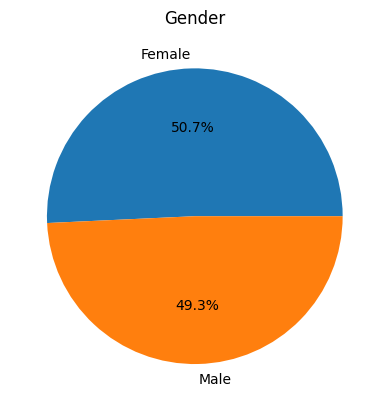

In [ ]:
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender")
plt.show()

**Summary**
1. The Pie Plot represents the Percentage of the Male and Female in the Gender column.
2. The female Percentage is high than the Male percentage.
3. Female 50.7% , Male 49.3%

In [ ]:
df1['Flight Distance'].value_counts()

337     841
594     505
404     480
862     473
2475    470
       ... 
1492      1
815       1
1293      1
1196      1
1051      1
Name: Flight Distance, Length: 3821, dtype: int64

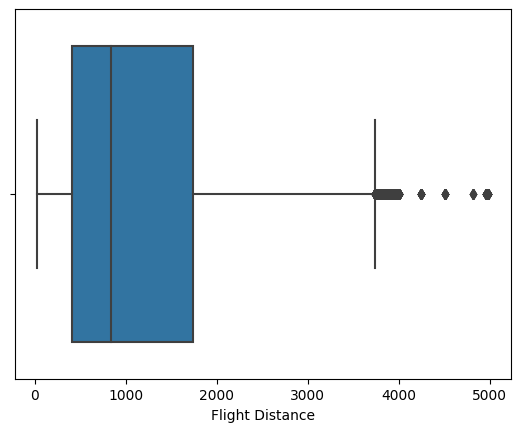

In [ ]:
# Create box plot
sns.boxplot(x="Flight Distance", data=df1)

# Display plot
plt.show()

**Summary**

This Box plot reprents of Flight travels between these distance 500 to 1800 kilometers

Median distance of flight travelling is 800.

It have the Outliers range from 4000 to 5000.



In [ ]:
df1['Age'].value_counts()

39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

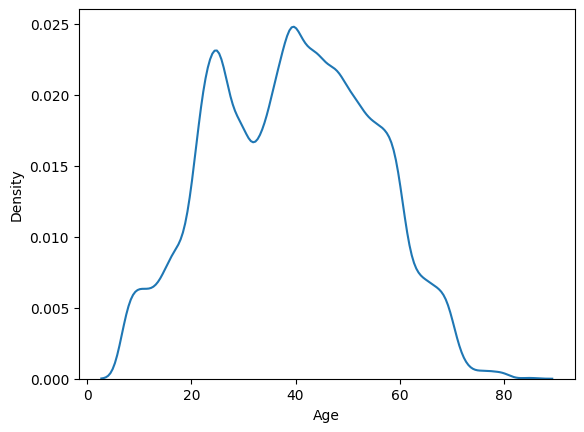

In [ ]:
sns.kdeplot(x="Age", data=df1)

# Label axes
plt.xlabel("Age")
plt.ylabel("Density")

# Display plot
plt.show()

**Summary**

This Kde plot represents passengers who traveled many times according to their Age.

39 years old passengers traveled many times.

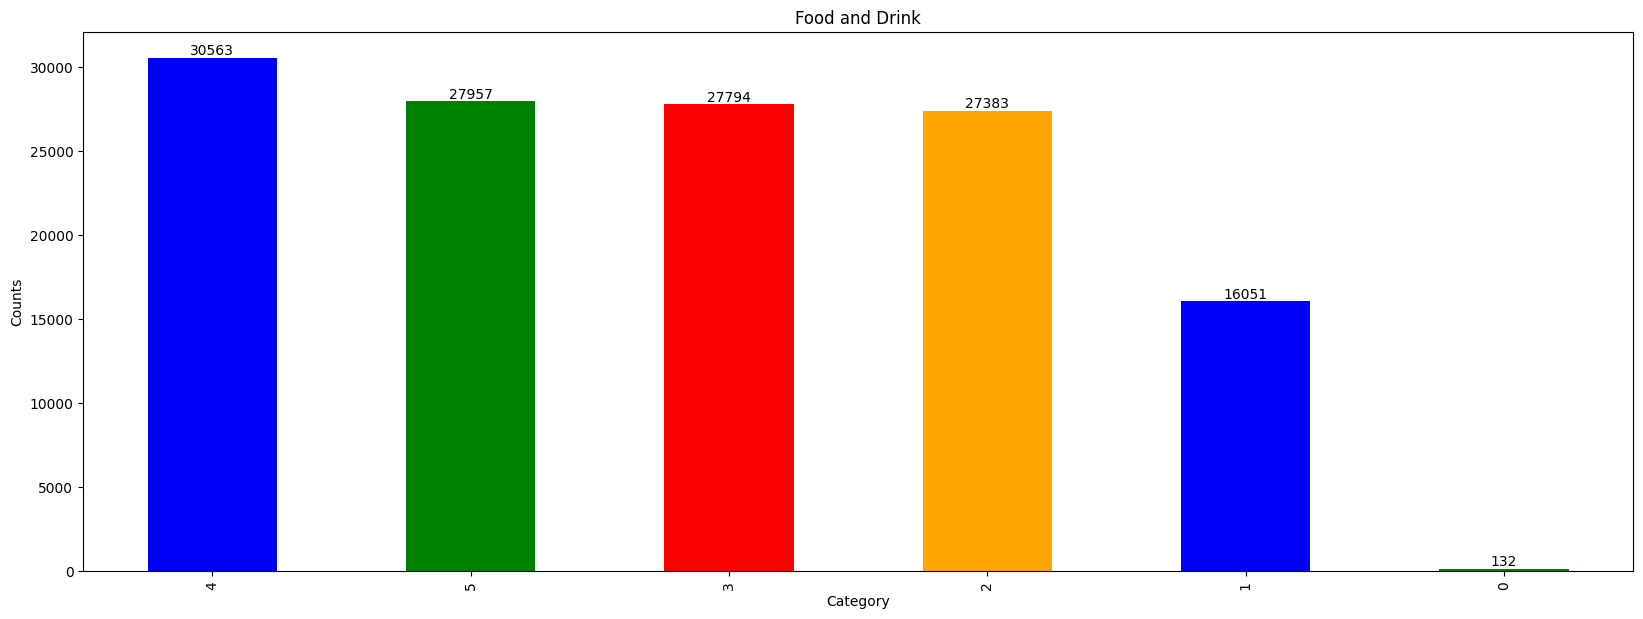

In [ ]:
plt.figure(figsize=(20, 7))
counts = df1['Food and Drink'].value_counts()
ax = counts.plot(kind="bar", color=["blue", "green", "red", "orange"])

plt.title("Food and Drink")
plt.xlabel("Category")
plt.ylabel("Counts")

# Adding counts as annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


**Summary**

1.This Bar plot represents  the rating of Food and Drink

2.The Highest rating for Food and Drink is 4

3.30563 Passengers Given this 4 rating

4.0 rating Given by 132 Passengers

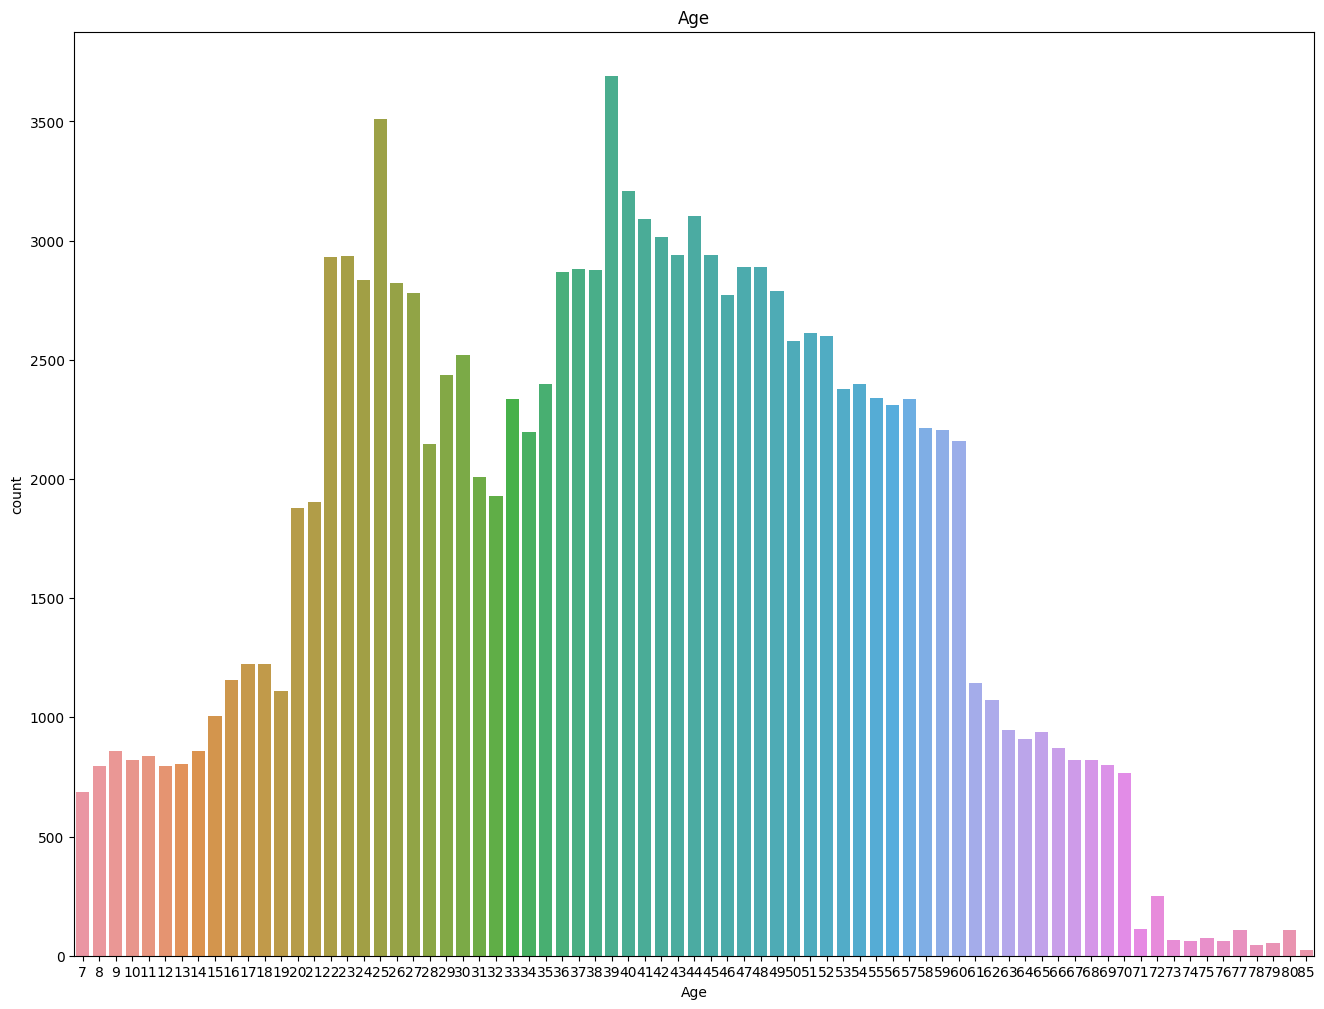

In [ ]:
plt.figure(figsize=(16, 12))
sns.countplot(x='Age', data=df1)
plt.title('Age')
plt.show()

**Summary**

1.This Count plot represents the Age of the Passengers

2.39 Years of Age Passengers mostly Travelled in this Airline

In [ ]:
df1['Seat Comfort'].value_counts()

4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat Comfort, dtype: int64

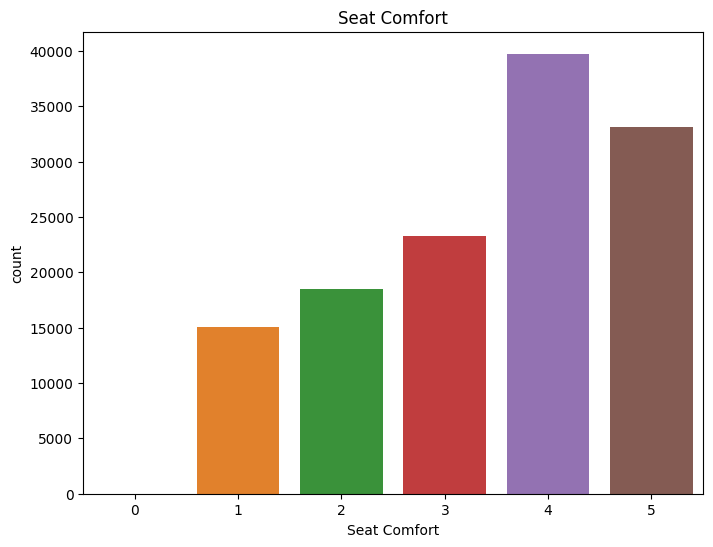

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Seat Comfort', data=df1)
plt.title('Seat Comfort')
plt.show()

**Summary**

1.This Bar plot represents how many passengers are given the rating for Seat Comfort.

2.The highest rating For Seat Comfort is 4.

3.Second higest rating for Seat Comfort is 5

In [ ]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
df1['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

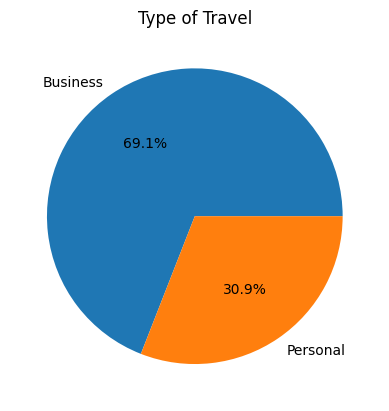

In [ ]:
plt.pie(df1['Type of Travel'].value_counts(), labels=df1['Type of Travel'].unique(), autopct='%1.1f%%')
plt.title('Type of Travel')
plt.show()

**Summary**

This Pie plot represents the Percentage of Type Of Travel.

The majority of passengers, comprising 69.1% of the total, are traveling for business purposes.

30.9% of  Passengers are traveling for personal purposes

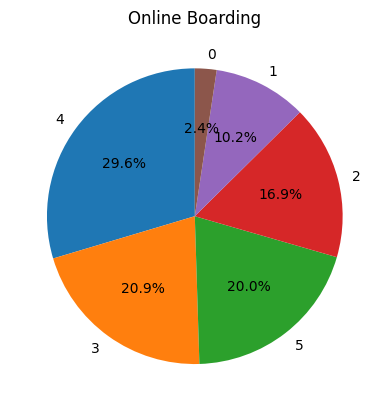

In [ ]:
counts = df1['Online Boarding'].value_counts()

# create a list of explode values
explode = [0.1 if x == 'Yes' else 0 for x in counts.index]

# create the pie chart
fig, ax = plt.subplots()
ax.pie(counts, explode=explode, labels=counts.index, autopct='%1.1f%%', startangle=90)

# set the title of the chart
ax.set_title("Online Boarding")

# show the chart
plt.show()

**Summary**

This Pie plot represents the Rating of Online Boarding.

29.6% of Passengers given a 4 rating for Online Boarding.

4% passengers given 0 rating for Online Boarding

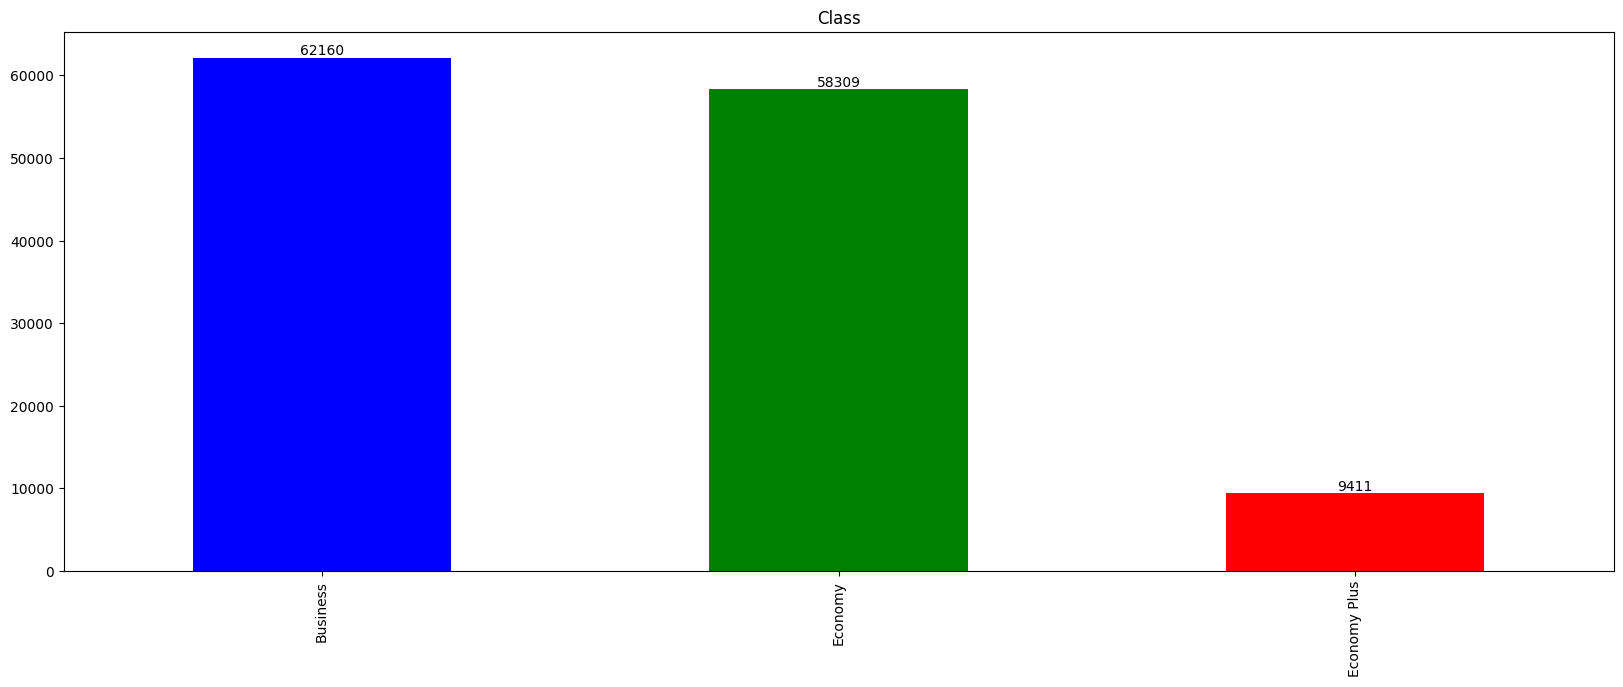

In [ ]:
plt.figure(figsize=(20, 7))
ax = df1['Class'].value_counts().plot(kind="bar", color=["blue", "green", "red", "orange"])
plt.title("Class")

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Summary**

This Bar plot represents the Most of the Passengers traveled in which class.

This plot shows Majority of the passengers are traveled Bussiness Class

Less of the passegers traveled Economy Plus class

In [ ]:
df1['Arrival Delay'].value_counts()

0.0       73146
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: Arrival Delay, Length: 472, dtype: int64

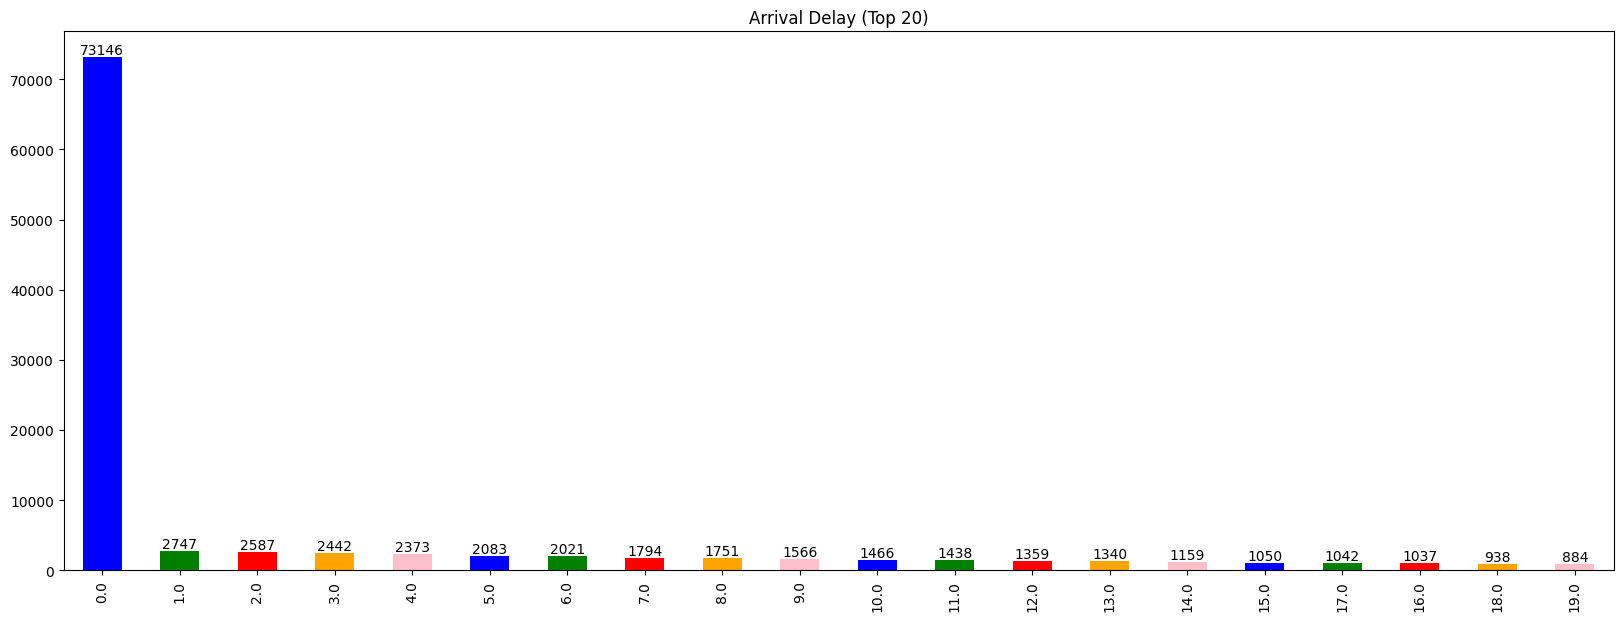

In [ ]:
plt.figure(figsize=(20, 7))
ax = df1['Arrival Delay'].value_counts().nlargest(20).plot(kind="bar", color=["blue", "green", "red", "orange", "pink"])
plt.title("Arrival Delay (Top 20)")

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


**Summary**

This Bar plot shows the Arrival Dealy of Passengers.

There was no delay for 73,146 passengers.



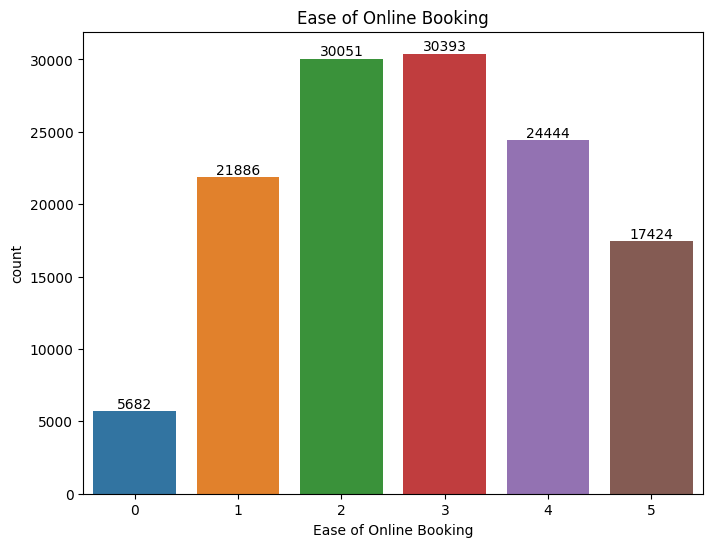

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ease of Online Booking', data=df1)

plt.title('Ease of Online Booking')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Summary**

This Bar plot represents the rating of Ease of Online Booking.

Majority of the passengers are given 3 rating

17424 Passengers are given 5 rating


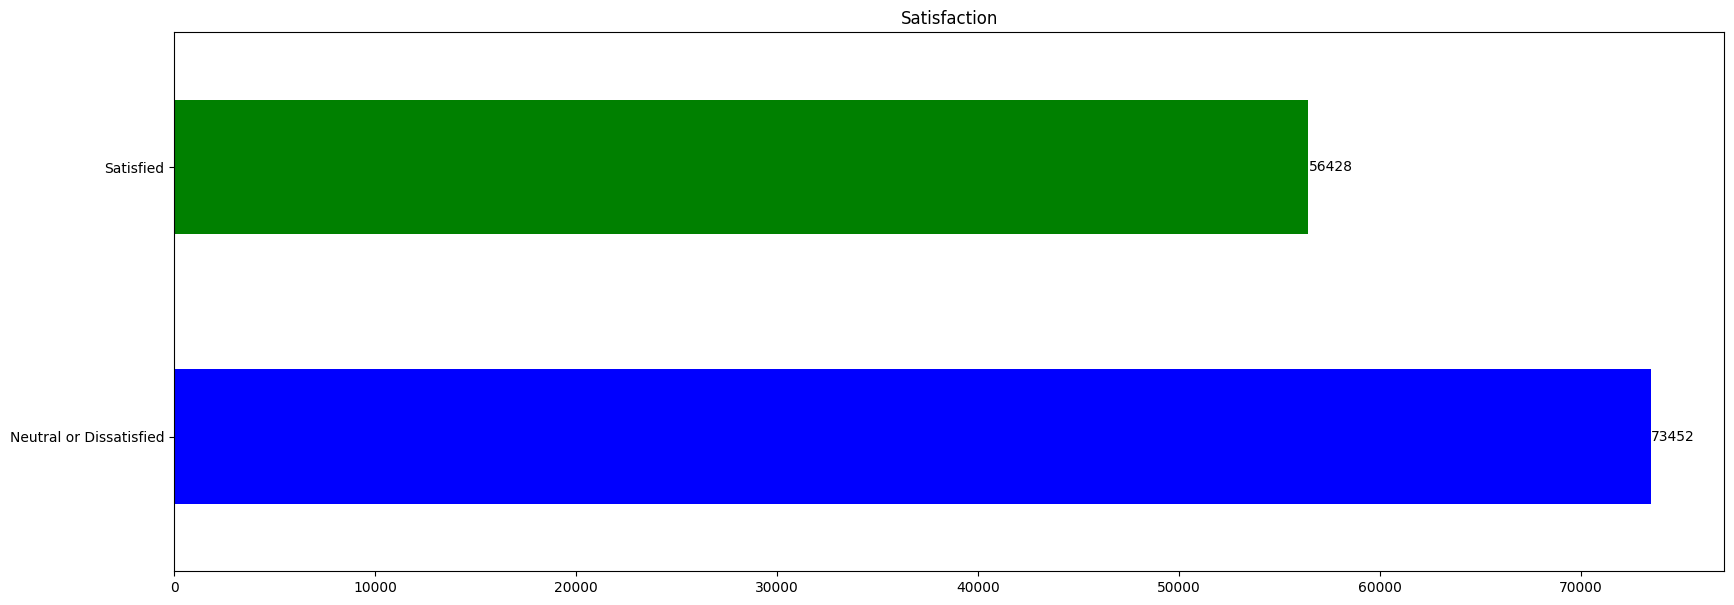

In [ ]:
plt.figure(figsize=(20, 7))
ax = df1['Satisfaction'].value_counts().plot(kind="barh", color=["blue", "green", "red", "orange"])
plt.title("Satisfaction")

# Add count values on top of the bars
for i, v in enumerate(df1['Satisfaction'].value_counts()):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.show()

**Summary**

This bar plot represents Satisfaction of the passengers

56428 Passengers are Satisfied.

73452 Passengers are Neutral and Dissatisfied

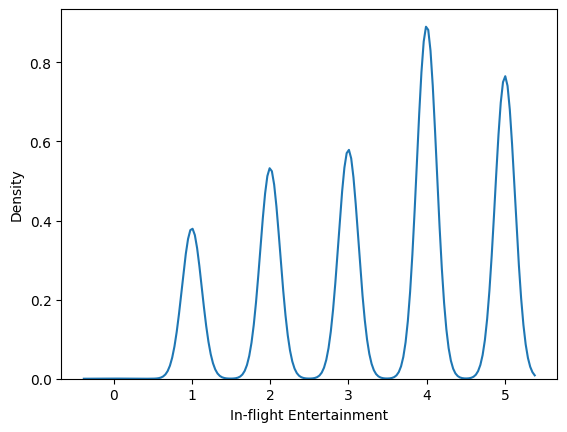

In [ ]:
sns.kdeplot(x="In-flight Entertainment", data=df1)

# Label axes
plt.xlabel("In-flight Entertainment")
plt.ylabel("Density")

# Display plot
plt.show()

**Summary**

This KDE plot shows the rating of In-flight Entertainment

Majority of the Passenggers are given 4 rating for In-flight Entertainment

# Bivariate Analysis

<Axes: ylabel='Class'>

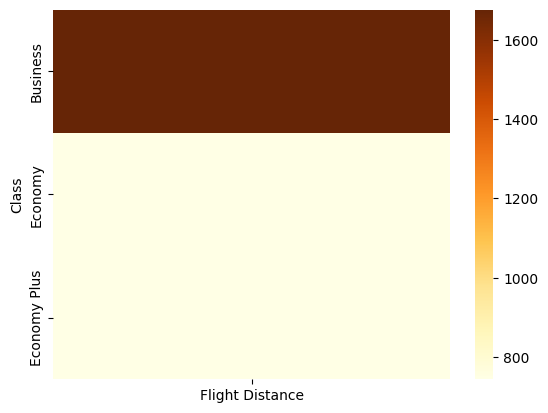

In [ ]:
flight_distance = df1.pivot_table(values='Flight Distance', index='Class', aggfunc='mean')

# create the heat map
sns.heatmap(data=flight_distance, cmap='YlOrBr')

**Summary**

This heatmap displays the passengers who traveled long distances based on their class.

Business class Passengers traveled long distances

In [ ]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<Axes: xlabel='Customer Type', ylabel='Baggage Handling'>

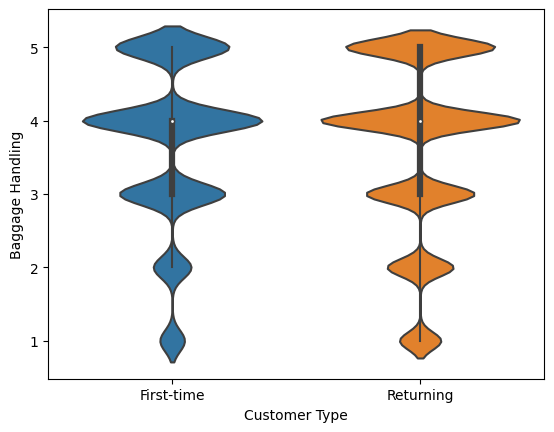

In [ ]:
sns.violinplot(data=df1, x='Customer Type', y='Baggage Handling')

**Summary**

This violin plot shows rating of Baggage Handling with Customer Type

Both Fisrt time and Returning passengers are given 4 rating

In [ ]:
df1['Gate Location'].value_counts()

3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate Location, dtype: int64

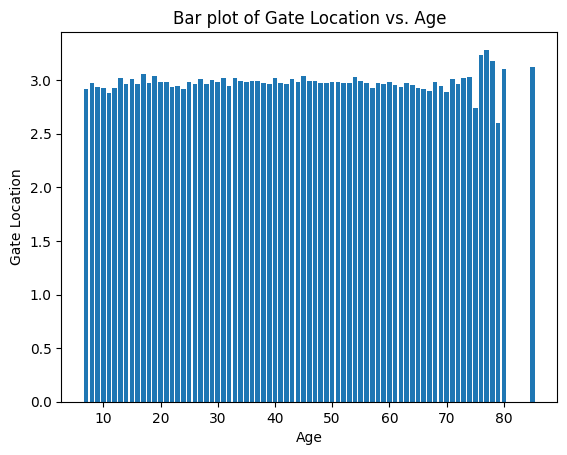

In [ ]:
grouped = df1.groupby('Age')['Gate Location'].mean()

# Create the bar plot using Matplotlib
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('Age')
ax.set_ylabel('Gate Location')
ax.set_title('Bar plot of Gate Location vs. Age')
plt.show()

**Summary**

This groped Bar plot represents rating of Gate Location by their Age

70 -80 years old passengers are given highest rating for this

<Axes: xlabel='Type of Travel', ylabel='count'>

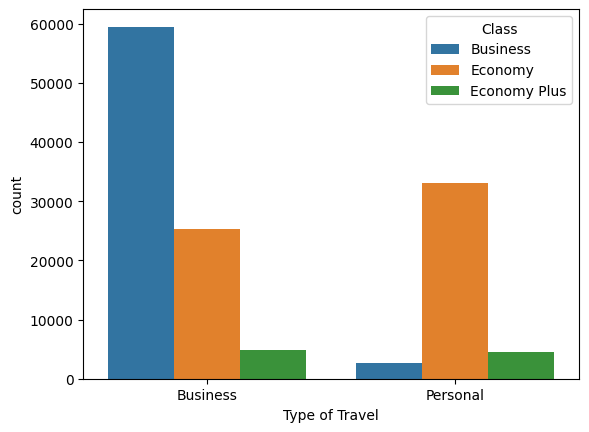

In [ ]:
sns.countplot(x='Type of Travel', hue='Class', data=df1)

**Summary**

This Count plot shows Type of Travel with Class

Mostly Passengers are traveling for business purposes.

Passenger are traveled on their personal purposes and they traveled in Economy Class

<Axes: xlabel='Departure and Arrival Time Convenience', ylabel='Class'>

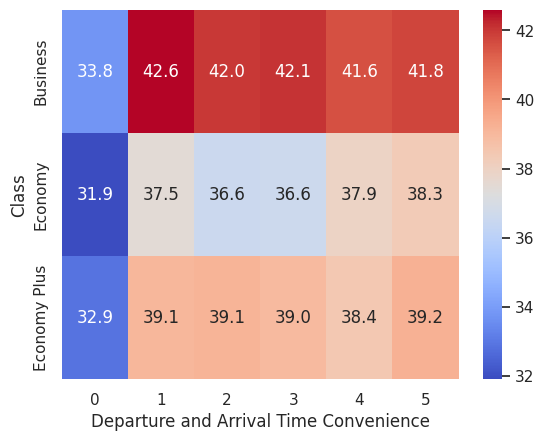

In [ ]:
sns.set(style='white')
heatmap_data = df1.pivot_table(values='Age', index=['Class'], columns='Departure and Arrival Time Convenience')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')

**Summary**

This heatmap illustrates the different ratings given by passengers of various classes regarding the convenience of departure and arrival times.

Business Class Passenger are given 5 rating for convenience of departure and arrival times


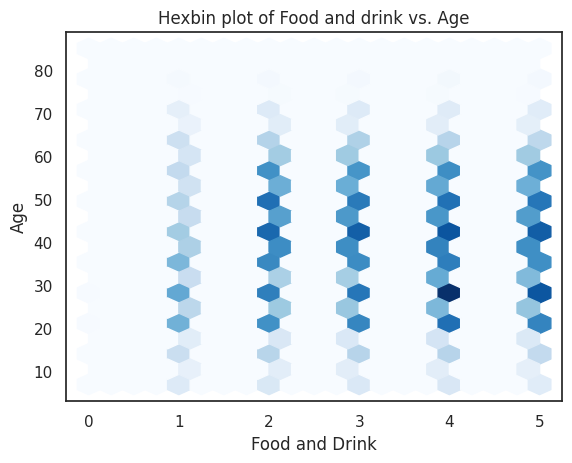

In [ ]:
fig, ax = plt.subplots()
ax.hexbin(df1['Food and Drink'], df1['Age'], gridsize=20, cmap='Blues')
ax.set_xlabel('Food and Drink')
ax.set_ylabel('Age')
ax.set_title('Hexbin plot of Food and drink vs. Age')
plt.show()

**Summary**

This Hexbin plot represents rating of Food and Drink accronding to their Age.

30 Years old passengers given highest rating for Food and Drink

70-80 years old passengers given lowest rating for Food and Drink.


<Axes: xlabel='Satisfaction', ylabel='count'>

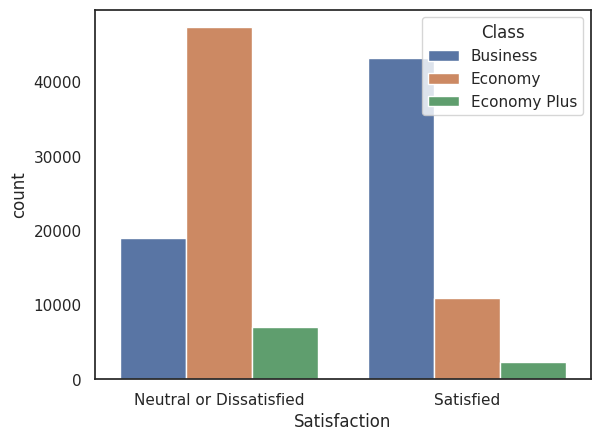

In [ ]:
sns.countplot(x='Satisfaction', hue='Class', data=df1)

**Summary**

This Bar plot represents Satisfaction and Dissatisfaction of the Customers.

From this plot Bussiness class Passengers are satisfied

Economy class passengers are Dissatisfied

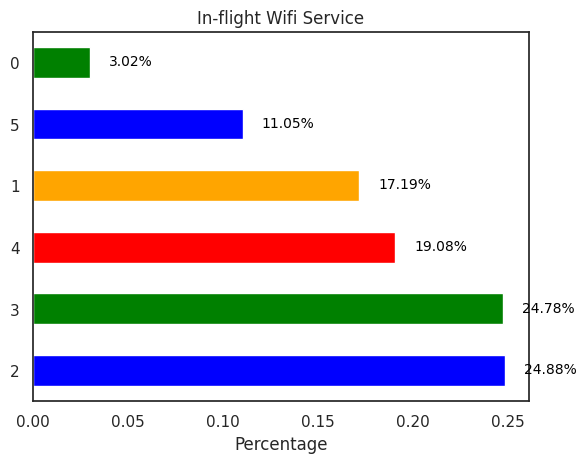

In [ ]:
ax = df1['In-flight Wifi Service'].value_counts(normalize=True).plot(kind="barh", color=["blue", "green", "red", "orange"])

# Add percentage labels to each bar
for i in ax.patches:
    width = i.get_width()
    plt.text(width+0.01, i.get_y()+0.2, f'{round(width*100, 2)}%', fontsize=10, color='black')

# Set title and axis labels
plt.title("In-flight Wifi Service")
plt.xlabel("Percentage")

# Show plot
plt.show()

**Summary**

This Horizontal Bar plot represents how much percentage of passengers given a rating for In - flight Wifi Services.

Majority of the passengers are given 2 rating

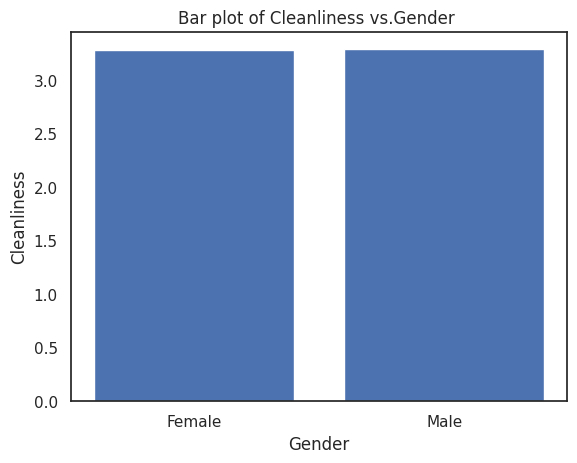

In [ ]:
grouped = df1.groupby('Gender')['Cleanliness'].mean()

# Create the bar plot using Matplotlib
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('Gender')
ax.set_ylabel('Cleanliness')
ax.set_title('Bar plot of Cleanliness vs.Gender ')
plt.show()

**Summary**

This Bar plot represents rating of Cleanliness by the Gender

Both Male and Female given 3 rating for Cleanliness.

# Multivariate

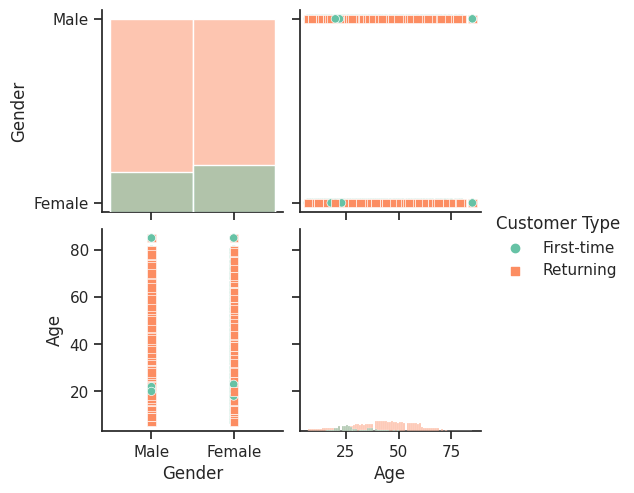

In [ ]:
sns.set(style='ticks')
sns.pairplot(df1, hue='Customer Type', diag_kind='hist',
             vars=['Gender', 'Age'], palette='Set2', markers=['o', 's'])

**Summary**

This Pair plot represents Customer Type along with gender and Age

The number of times females have traveled and returned is high

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


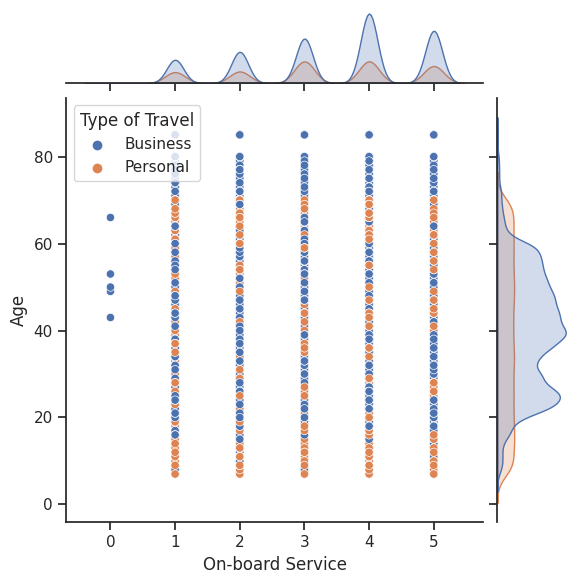

In [ ]:
sns.jointplot(data=df1, x="On-board Service", y="Age", hue="Type of Travel")

**summary**


This Joint plot represents On-board Service rating by age and type of travel

Passengers are who traveld their personal purposes given 5 rating

40 years old above passengers are given 0 rating

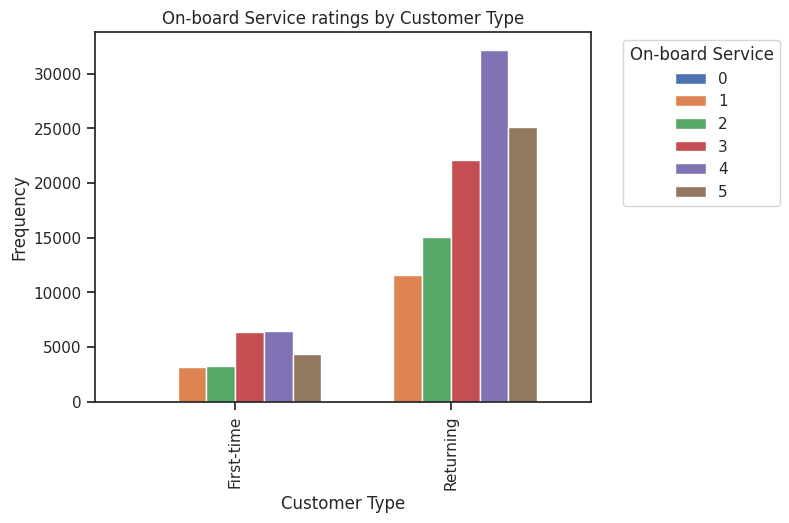

In [ ]:
grouped_data = df1.groupby(['Customer Type', 'On-board Service'])['Class'].count().unstack()

# Plot data as grouped barplot
ax = grouped_data.plot(kind='bar', width=0.8)

# Customize plot labels and legend
ax.set_xlabel('Customer Type')
ax.set_ylabel('Frequency')
ax.set_title('On-board Service ratings by Customer Type')
ax.legend(title='On-board Service', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Summary**

The Bar plot represents On-board Services rating by Customer Type

Majority Retruning Passengers are given 4 rating for On-board Servies

Few First time passengers are given 4 rating for on-board Services



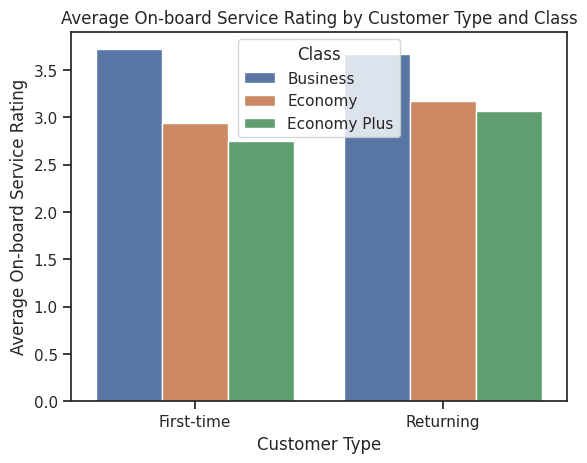

In [ ]:
grouped_data = df1.groupby(['Customer Type', 'Class'])['On-board Service'].mean().reset_index()

# Create barplot using seaborn
sns.barplot(x='Customer Type', y='On-board Service', hue='Class', data=grouped_data)

# Customize plot labels and legend
plt.xlabel('Customer Type')
plt.ylabel('Average On-board Service Rating')
plt.title('Average On-board Service Rating by Customer Type and Class')
plt.legend(title='Class')

plt.show()

**Summary**

This Bar plot represents Average rating on-boarding Services rating by First time and Returning Passengers.

First time and Returning Passengers  average rating is 3.5

[Text(0, 0.5, 'Customer Type')]

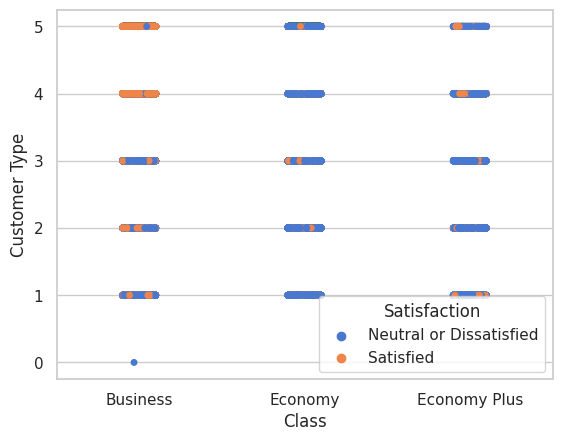

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.stripplot(data=df1, x="Class", y="Seat Comfort", hue="Satisfaction")
ax.set(ylabel="Customer Type")

**Summary**

This strip plot represents the Rating of Seat Comfort by Class, and are they satisftied or not.

Business class Passengers are given 5 rating for Seat Comfort and they are satisfied.

Economy Plus class Passenger given 3 rating for this Seat Comfort and they are not satisfied.


In [ ]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

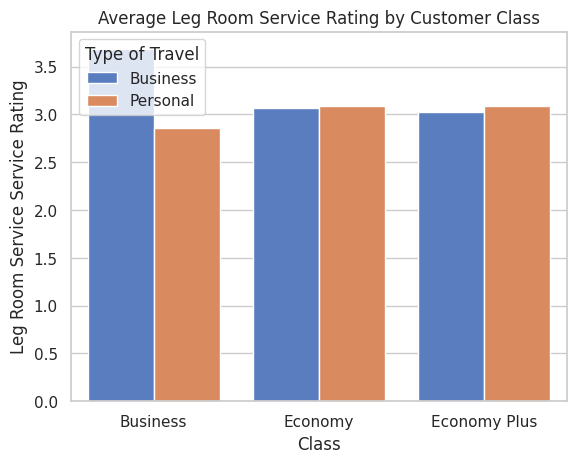

In [ ]:
grouped_data = df1.groupby(['Type of Travel', 'Class'])['Leg Room Service'].mean().reset_index()

# Create barplot using seaborn
sns.barplot(x='Class', y='Leg Room Service', hue='Type of Travel', data=grouped_data)

# Customize plot labels and legend
plt.xlabel('Class')
plt.ylabel('Leg Room Service Service Rating')
plt.title('Average Leg Room Service Rating by Customer Class')
plt.legend(title='Type of Travel')

plt.show()

**Summary**

This grouped bar plot reprents the rating of Leg Room Services by Class.

Business Class passengers are given 3.5 rating for Leg Room Services.

Economy and Economy Plus passengers are given 3.0 rating for Leg Room Services

In [ ]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
import plotly.express as px
parallel_data = df1[['Age', 'Ease of Online Booking', 'Check-in Service']].head(10)

# Create the parallel coordinates plot
fig = px.parallel_coordinates(parallel_data, color="Age",
                              labels={"Online Boarding": "Leg Room Service",
                                      "Seat Comfort": "Seat Comfort",
                                      },
                              color_continuous_scale=px.colors.sequential.Viridis)

# Show the plot
fig.show()

**Summary**

This parallel coordinate plot represents rating for Ease of online Booking and Check-in services by Age.

60 Age group Passengers are given 4 rating for Easo of online booking and 3 for Check-in service.

39 Age group Passengers are given 5 rating for Ease of online Booking and Check-in services.


<Axes: xlabel='Customer Type', ylabel='Food and Drink'>

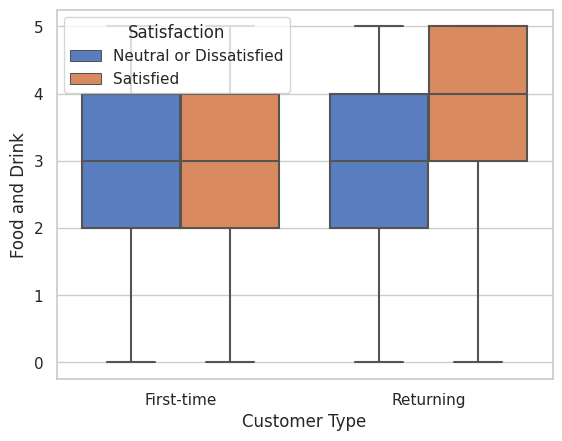

In [ ]:
sns.boxplot(x='Customer Type', y='Food and Drink', hue='Satisfaction', data=df1)

**summary**

This Box plot represents the Passenger is satisfied with Food and Drink or not.

First-time Passengers are given 4 rating for Food and drink and some passengers are satisfied.

Returning Passengers are given 5 rating for Food and Drink and they are satisfied and some of the passengers are dissatiesfied.


3


Text(0.5, 1.0, 'Check-in Service and Class')

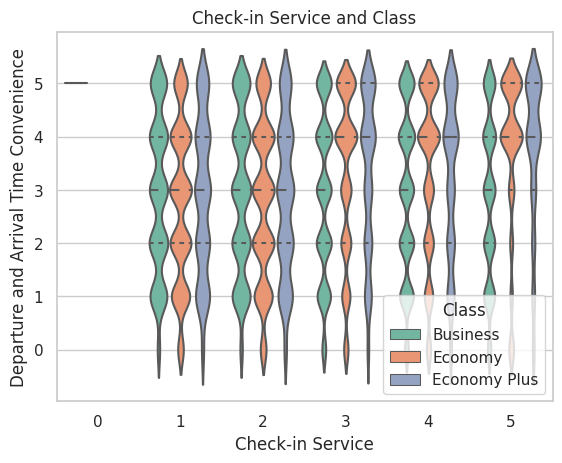

In [ ]:
sns.violinplot(x='Check-in Service', y='Departure and Arrival Time Convenience', hue='Class', data=df1,inner='quart', palette='Set2')
print(df1['Class'].nunique())
# Add a title
plt.title('Check-in Service and Class')

**Summary**

This violin Plot represents rating of check-in service and Depature and Arriaval time convience by Class.

Economy Class passengers are given 5 rating for Depature and Arrival time convience and 4 rating for check-in services.

Business class passengers are given 4 rating for Depature and Arrival Time convience.

Text(0.5, 1.0, 'Bubble chart with color by group')

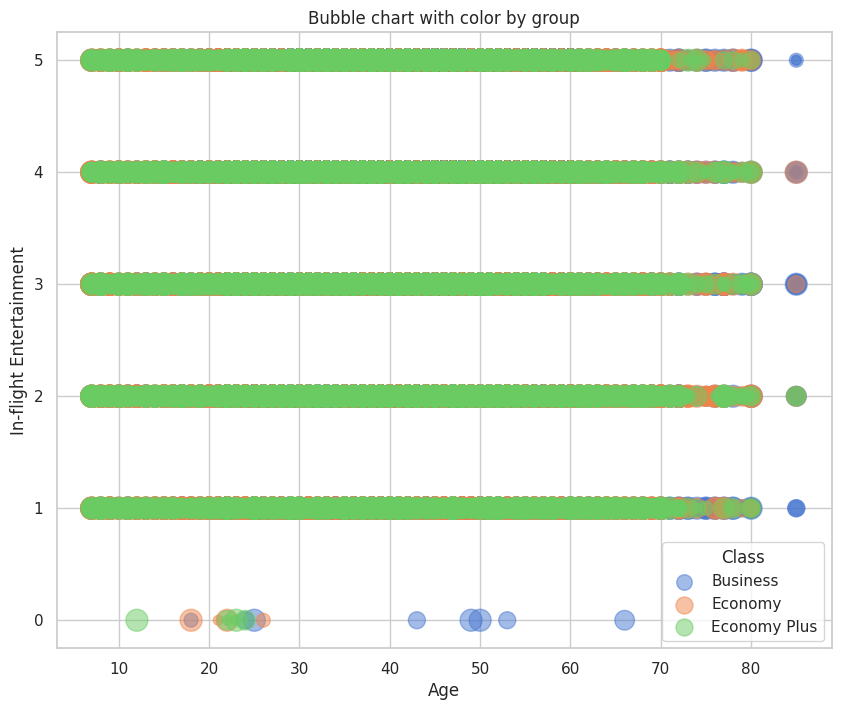

In [ ]:
x_var = 'Age'
y_var = 'In-flight Entertainment'
size_var = 'Gate Location'
color_var = 'Class'

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot with bubble size and color by group
groups = df1[color_var].unique()
for group in groups:
    df_group = df1[df1[color_var] == group]
    ax.scatter(df_group[x_var], df_group[y_var], s=df_group[size_var]*50, alpha=0.5, label=group)

# Set axis labels and legend
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.legend(title=color_var)

# Add a title
plt.title('Bubble chart with color by group')

In [ ]:
df1['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

In [ ]:
value_counts = df1[['Class']].value_counts()
value_counts

Class       
Business        62160
Economy         58309
Economy Plus     9411
dtype: int64

In [ ]:
value_counts = df1[['Class', 'In-flight Entertainment']].value_counts()
print(value_counts)

Class         In-flight Entertainment
Business      4                          21406
              5                          18033
Economy       4                          13187
              3                          12145
              2                          11878
              5                          11631
Business      3                           9756
Economy       1                           9464
Business      2                           8208
              1                           4749
Economy Plus  4                           2198
              3                           1983
              2                           1882
              5                           1880
              1                           1462
Business      0                              8
Economy Plus  0                              6
Economy       0                              4
dtype: int64


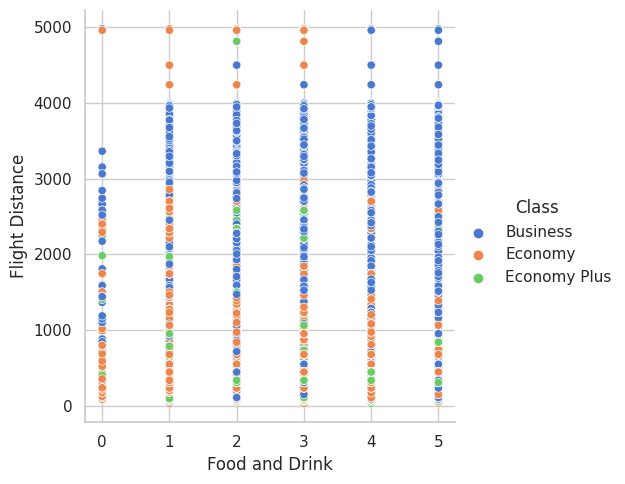

In [ ]:
sns.relplot(df1, x="Food and Drink", y="Flight Distance", hue="Class")

**Summary**

This scatter plot represents Flight Distance and Food and Drink by Class.

Majority of Business Class passengers are traveled long Distance and they are given 5 rating for Food and Drink.

Economy Class Passengers are given 2 rating for Food and Drink who traveled long distance.

In [ ]:
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [ ]:
def remove_outlier(df,column):

    # Plot before outlier treatment
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title('Before Treating outliers')
    sns.boxplot(df[column])
    plt.subplot(1, 2, 2)
    sns.distplot(df[column])

    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Remove outliers using IQR
    df = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

    # Plot after outlier treatment
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title('After Treating outliers')
    sns.boxplot(df[column])
    plt.subplot(1, 2, 2)
    sns.distplot(df[column])

    return df

<ipython-input-64-f28b24f90889>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-64-f28b24f90889>:25: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-64-f28b24f90889>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

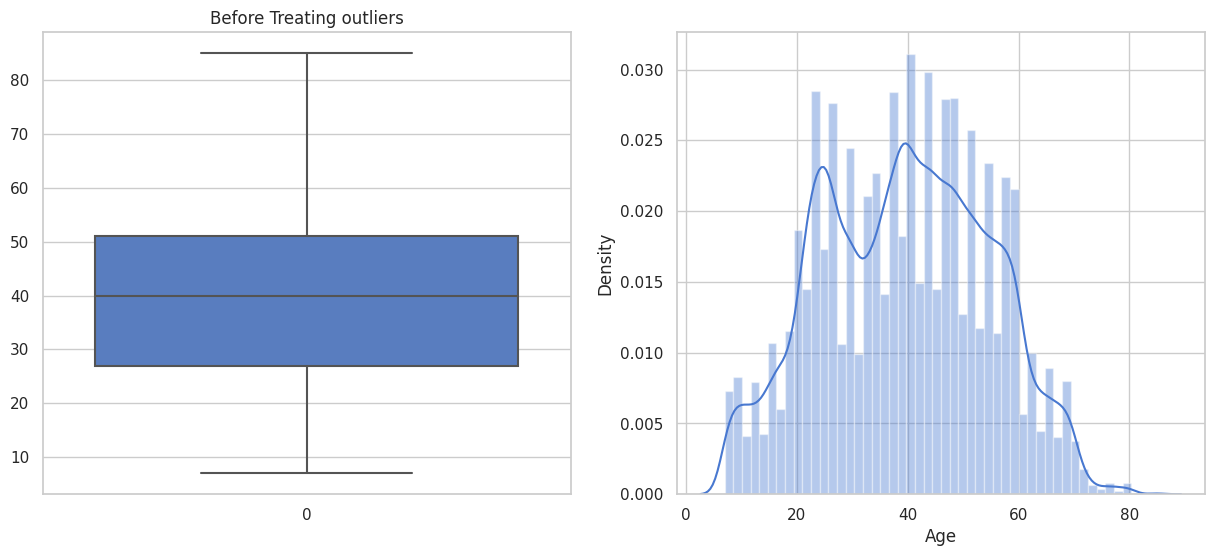

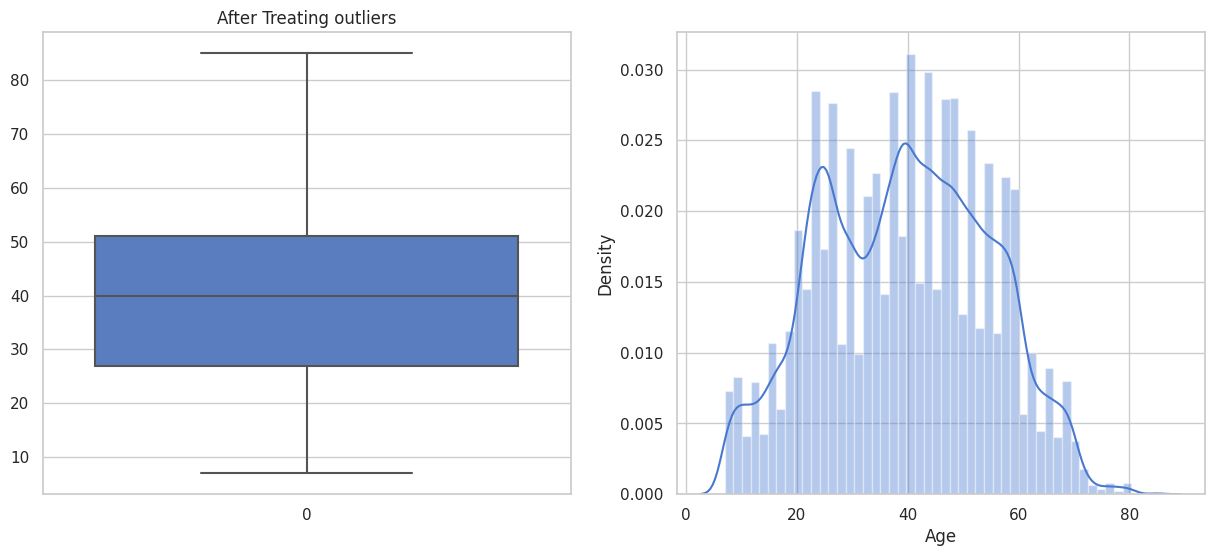

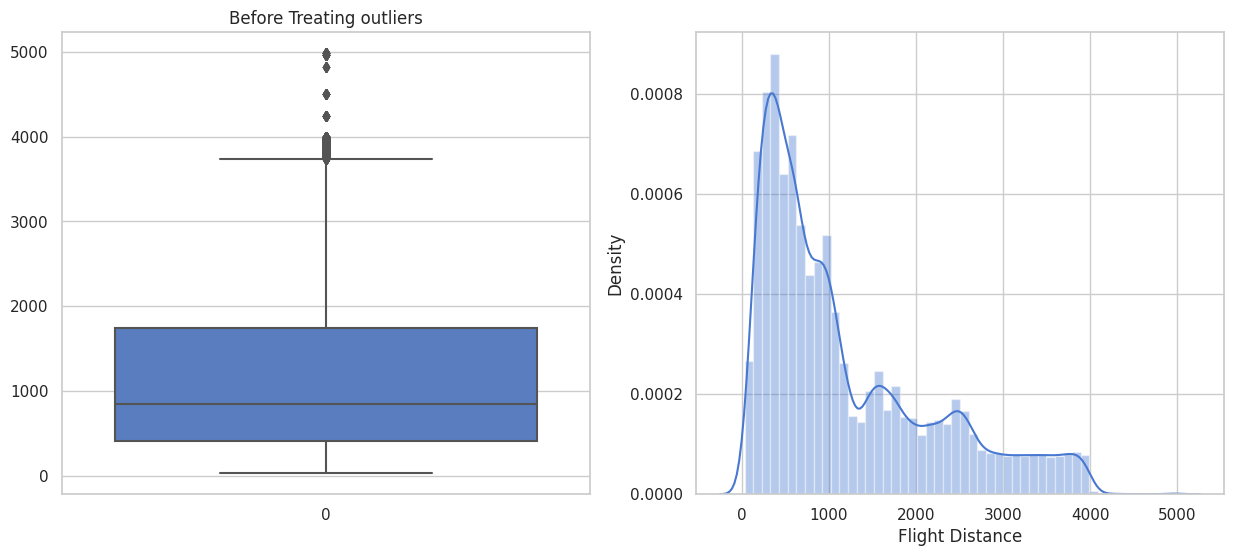

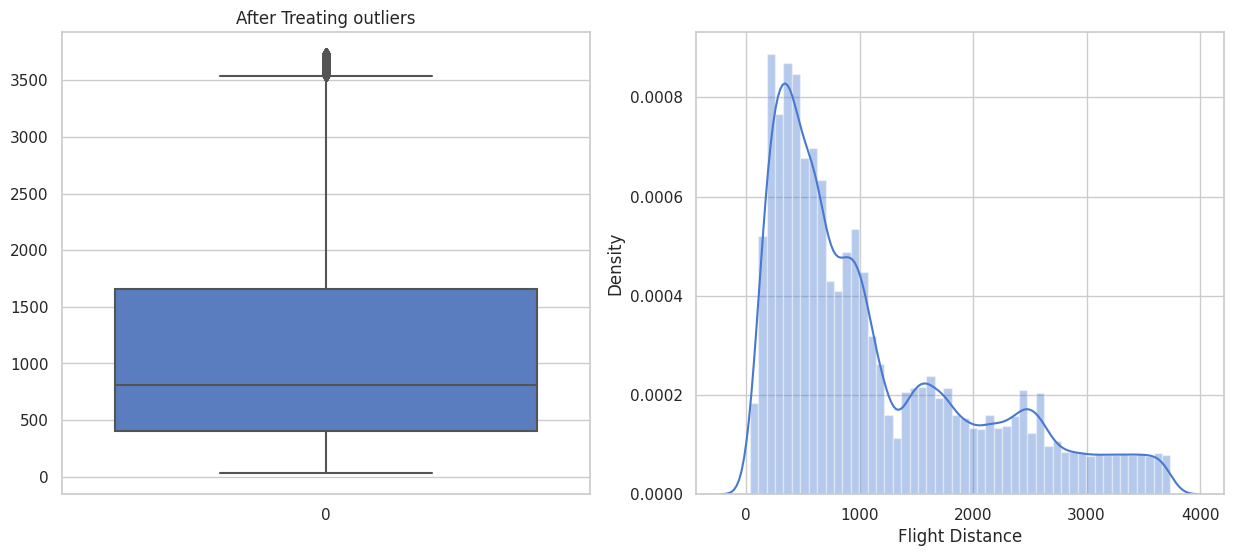

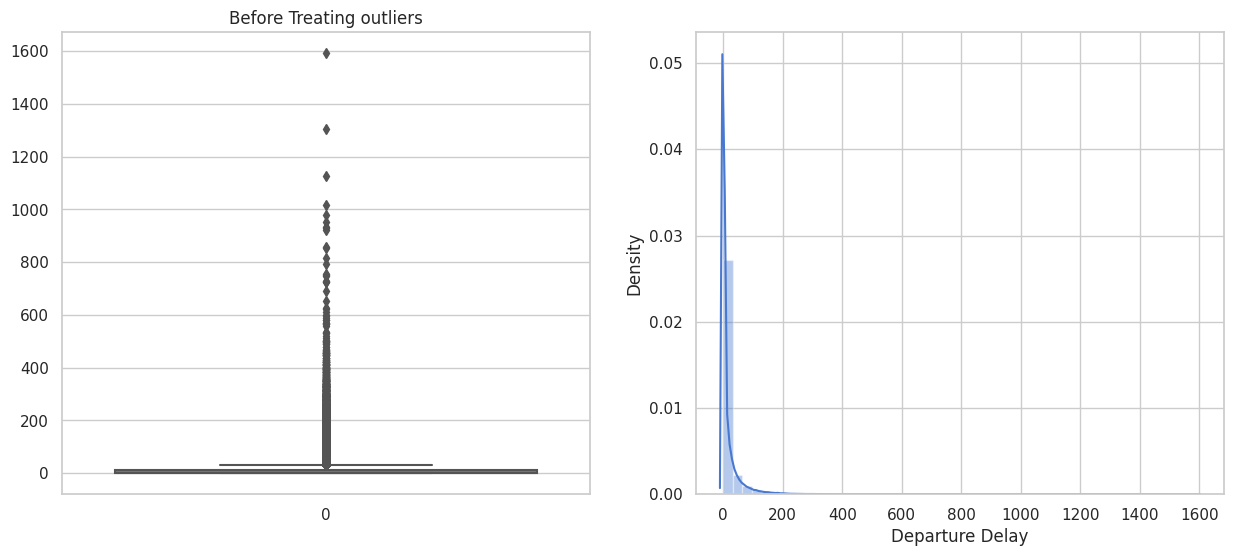

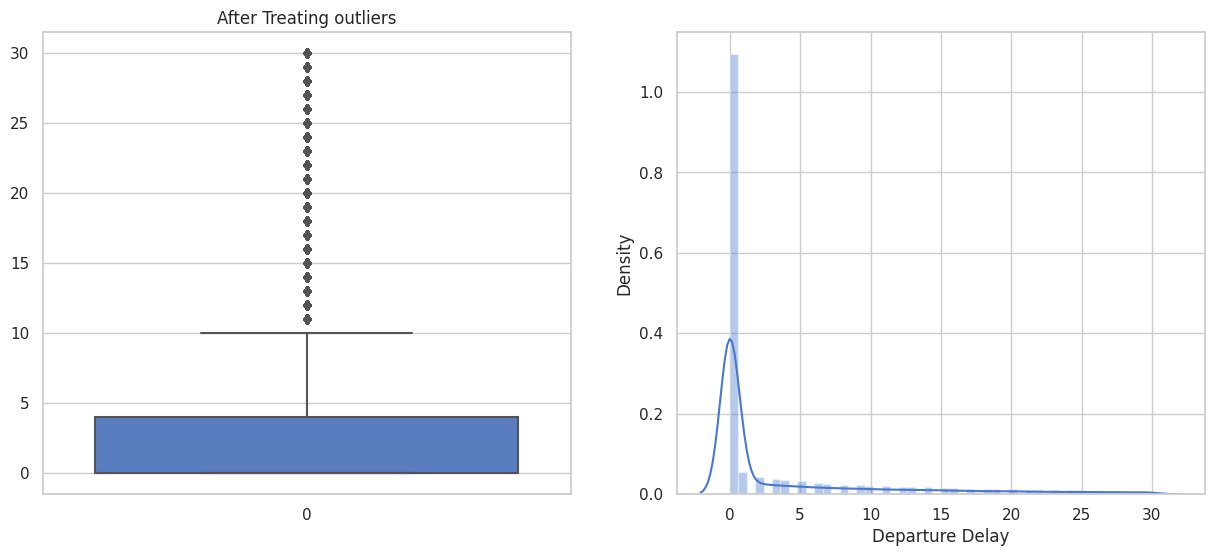

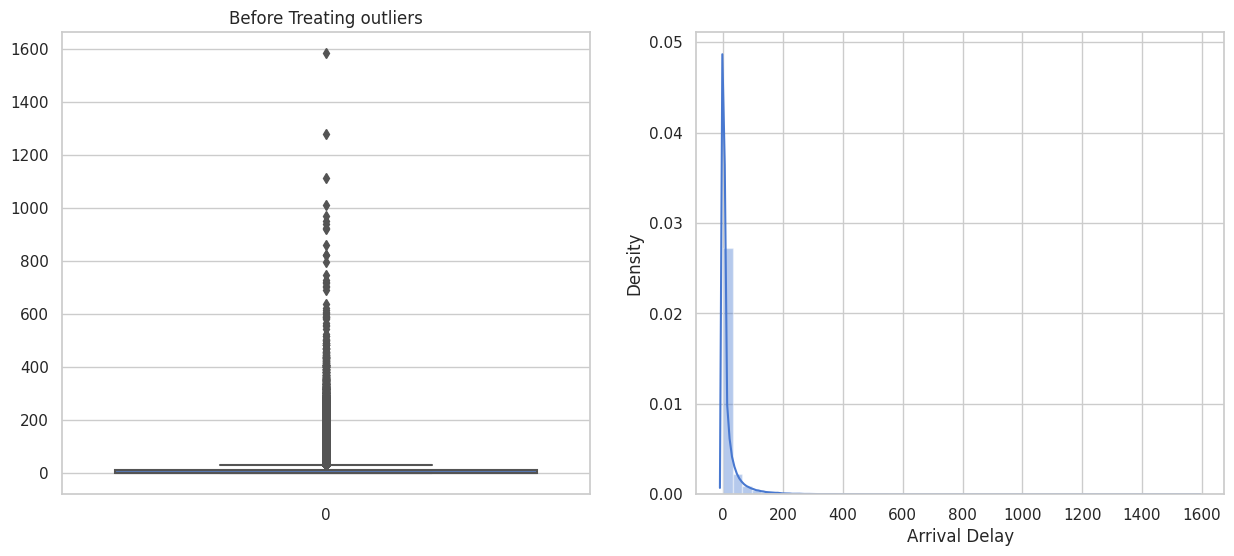

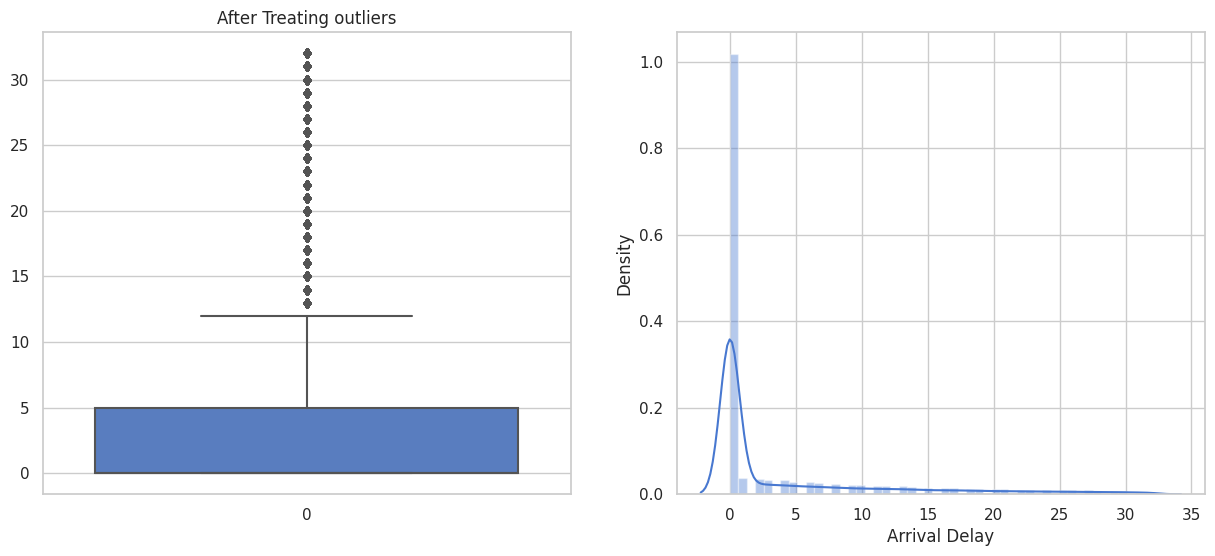

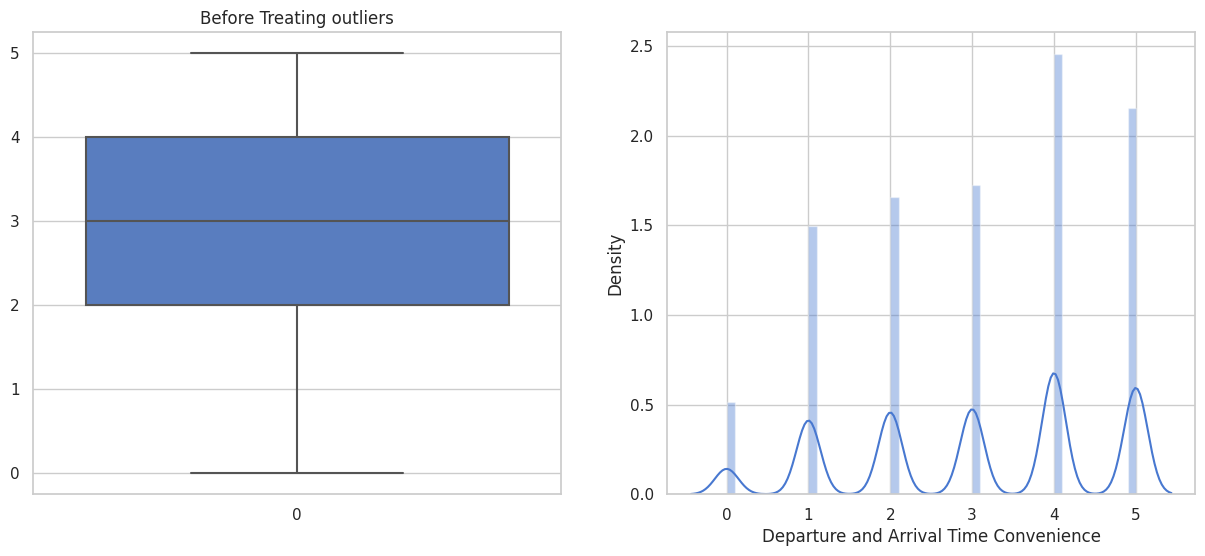

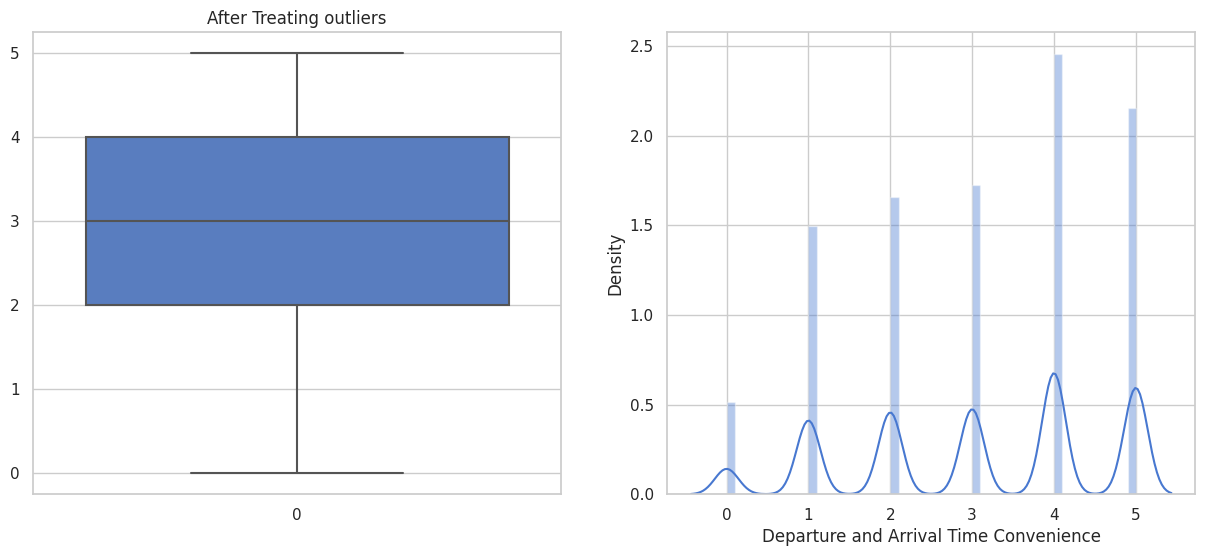

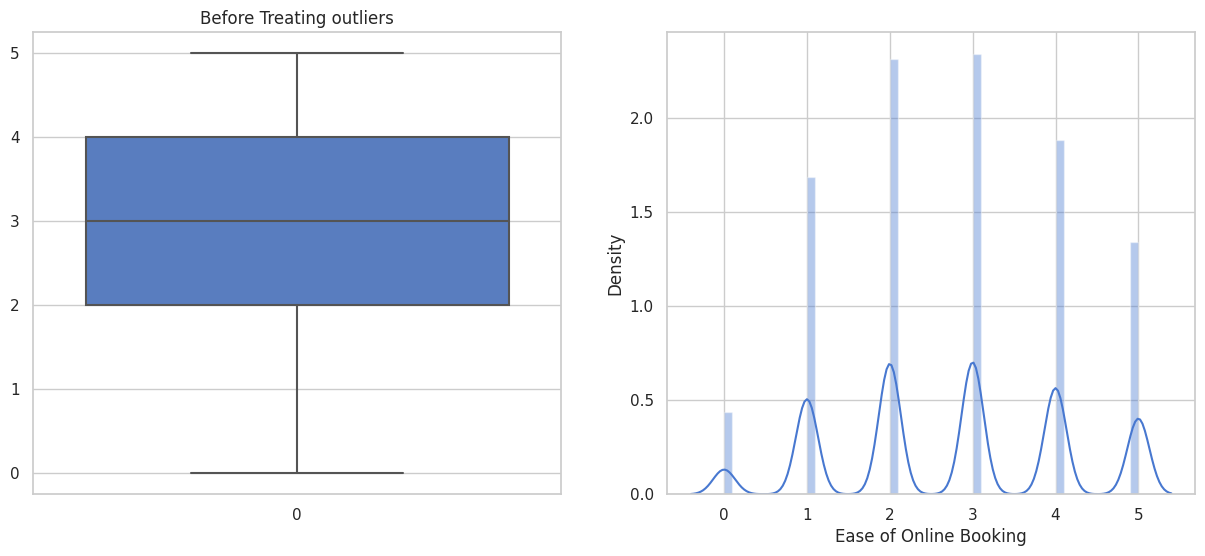

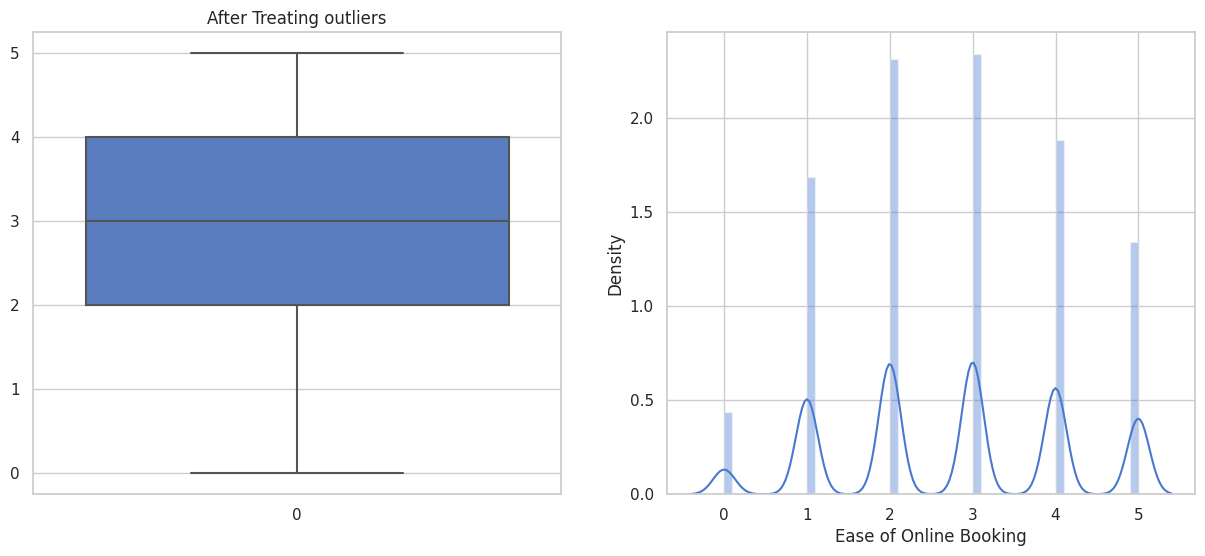

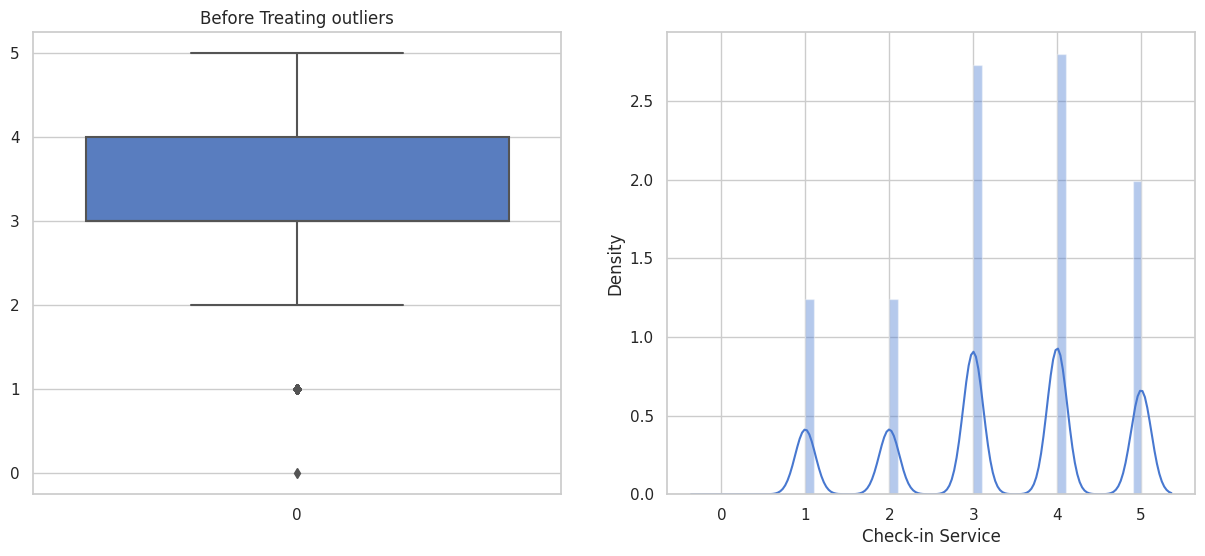

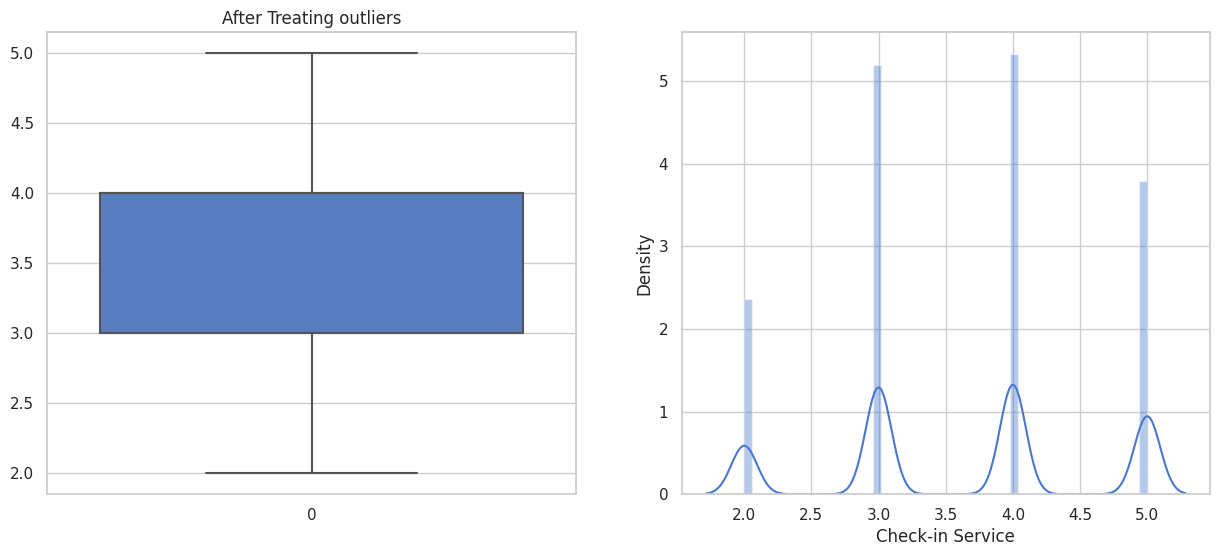

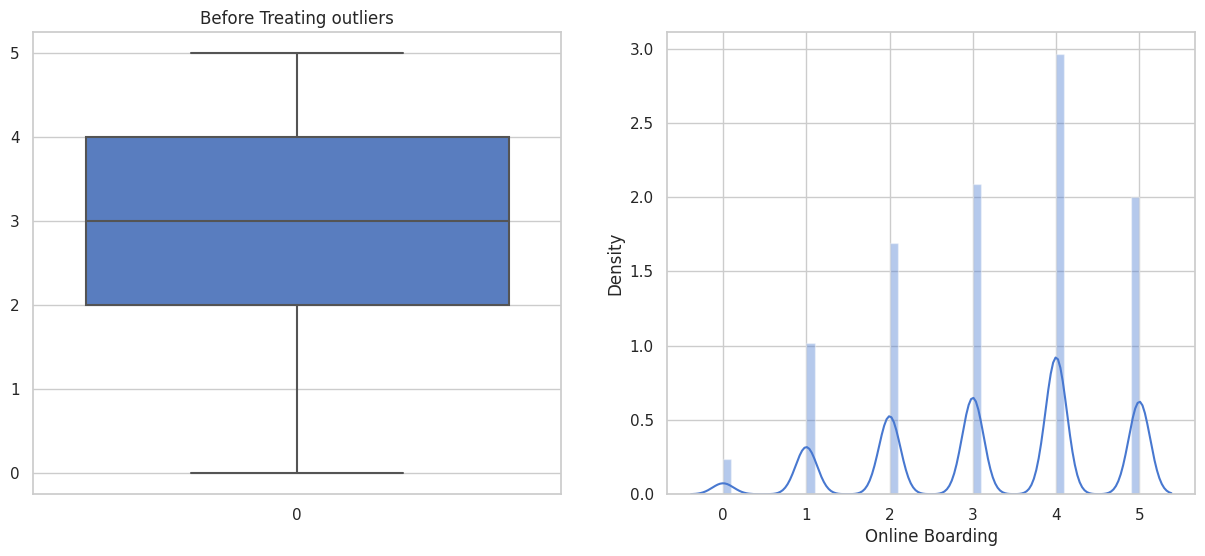

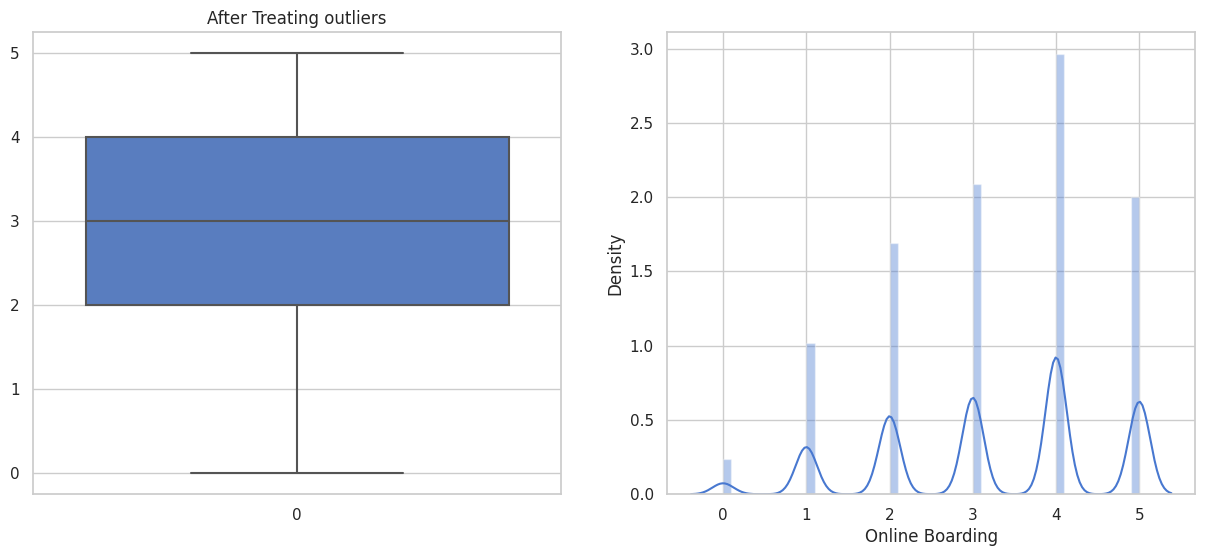

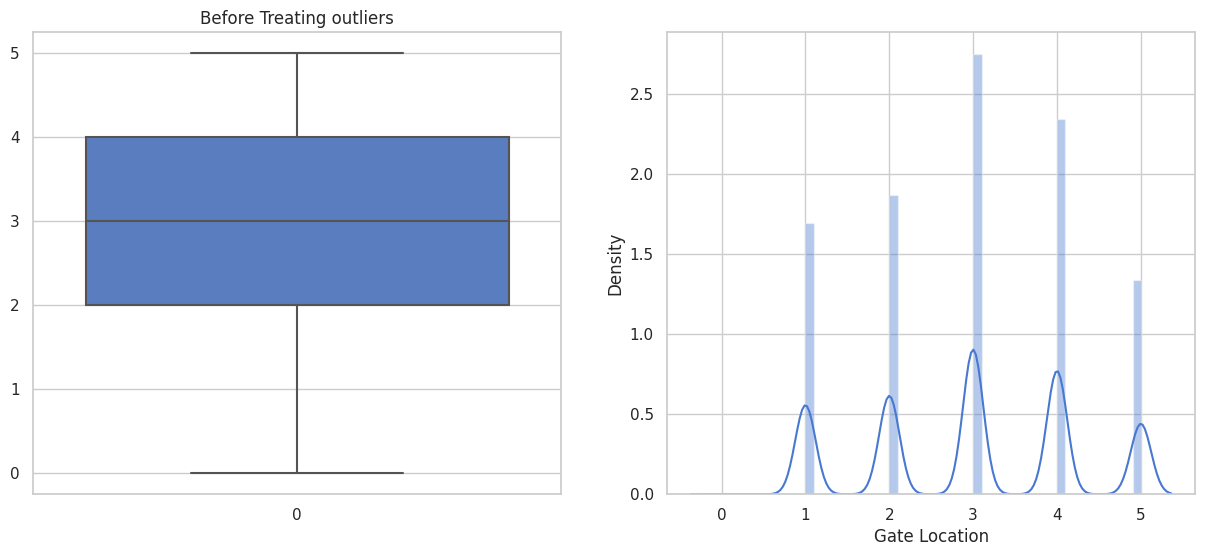

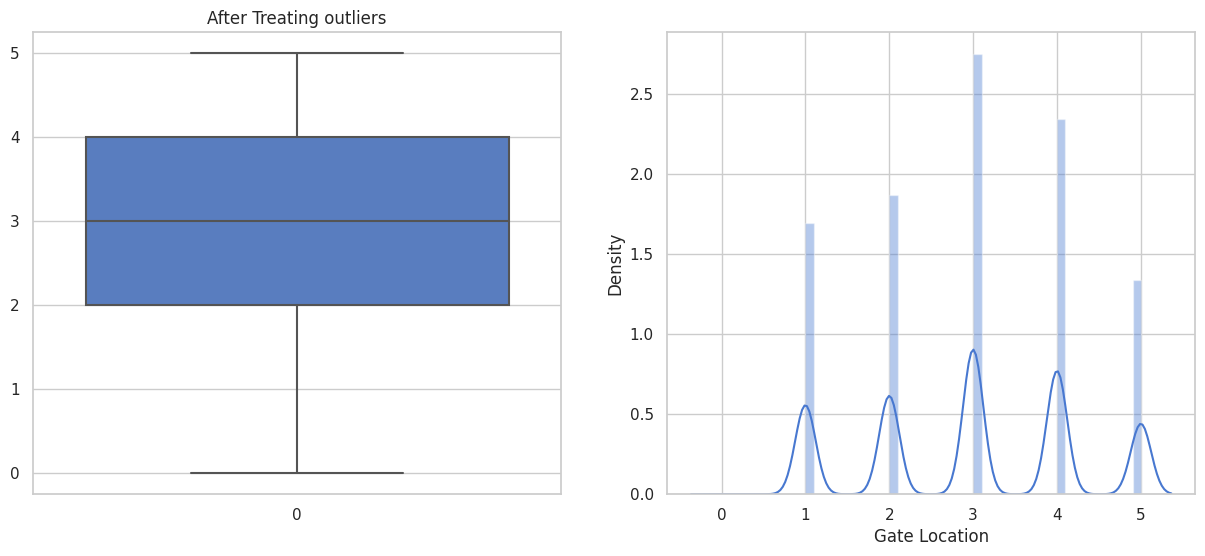

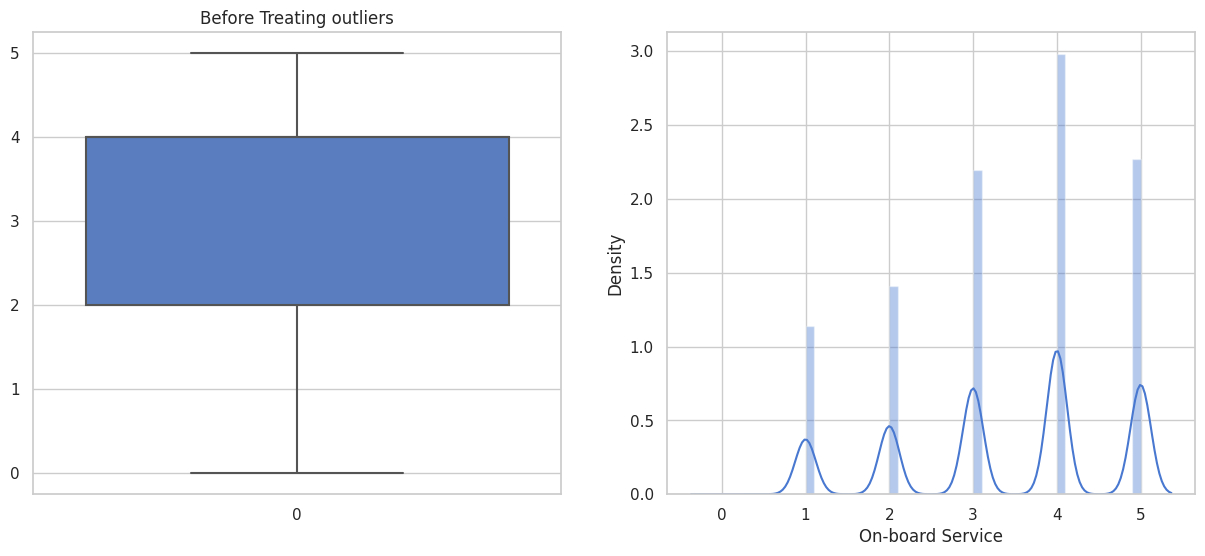

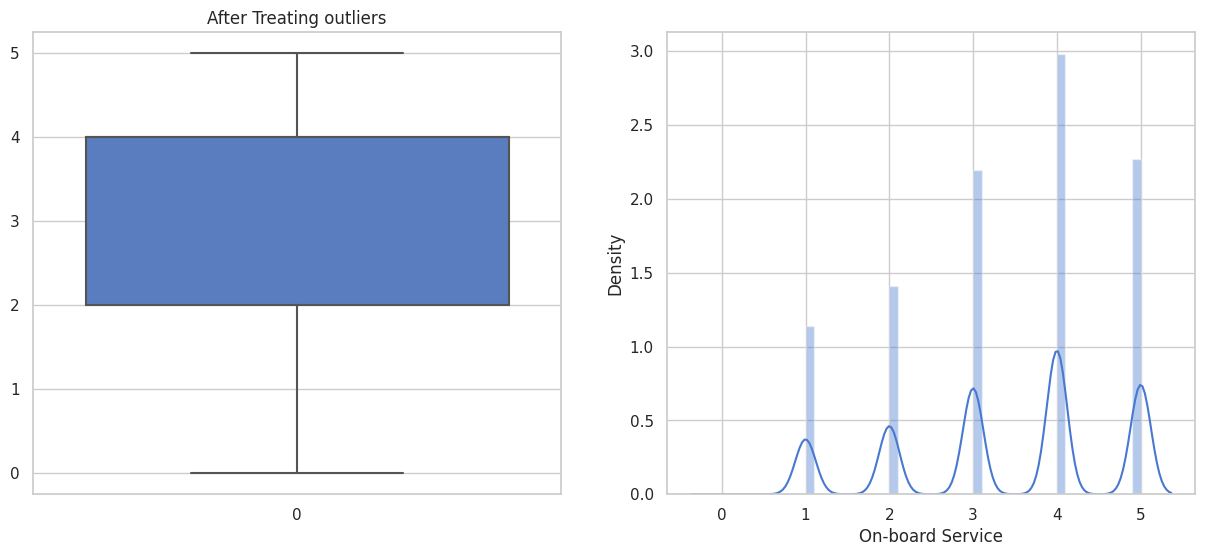

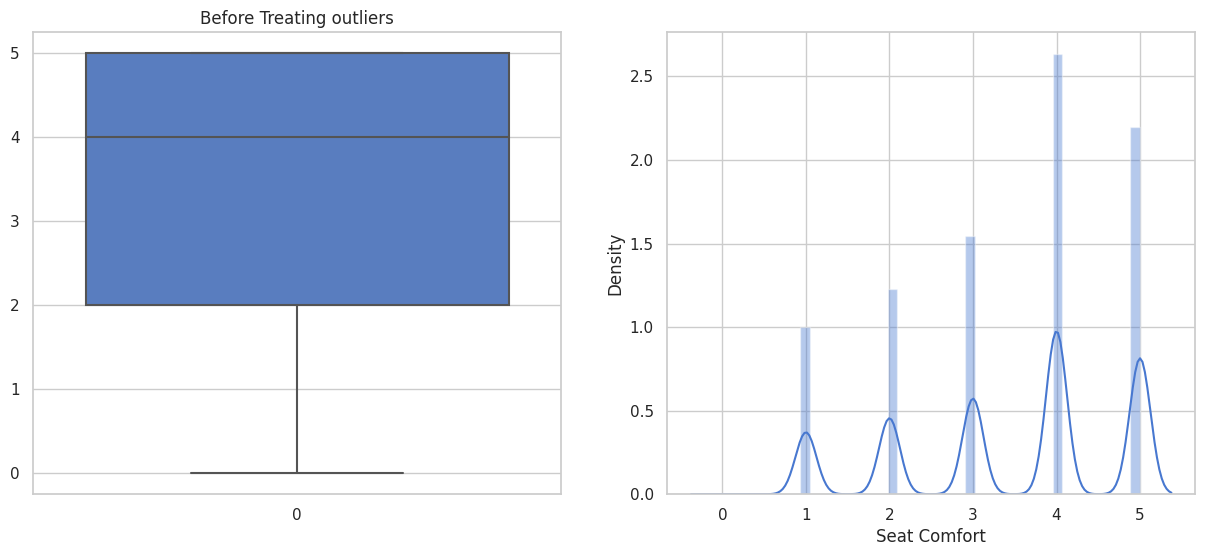

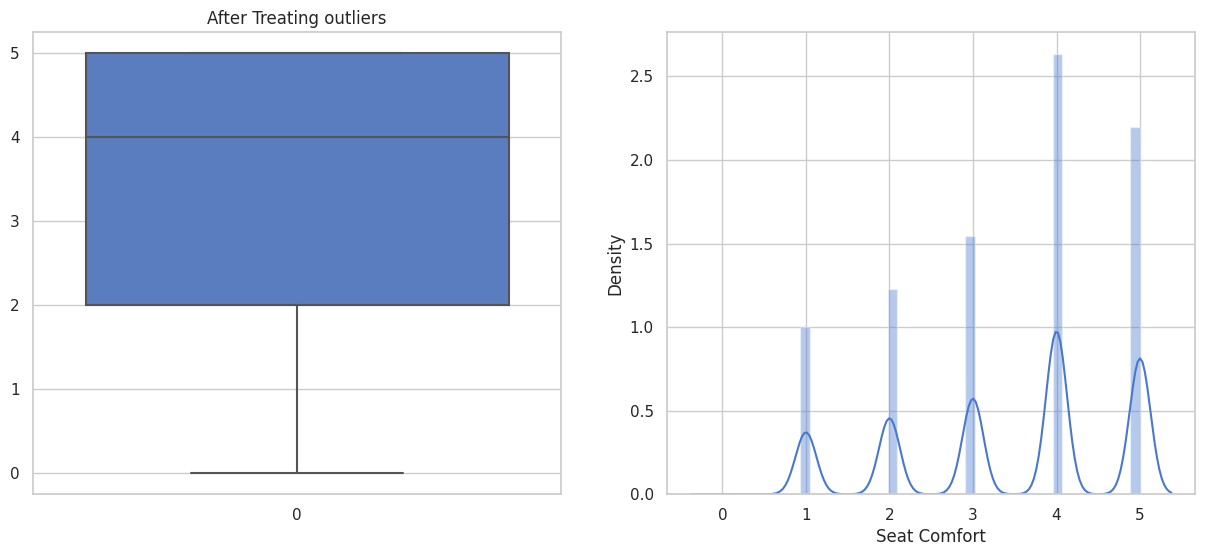

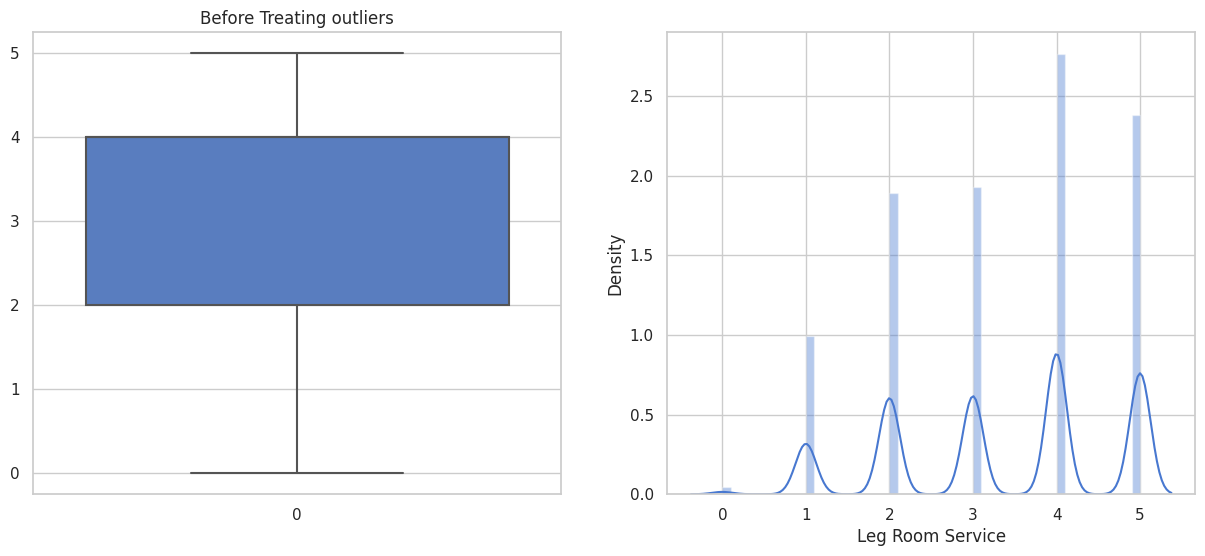

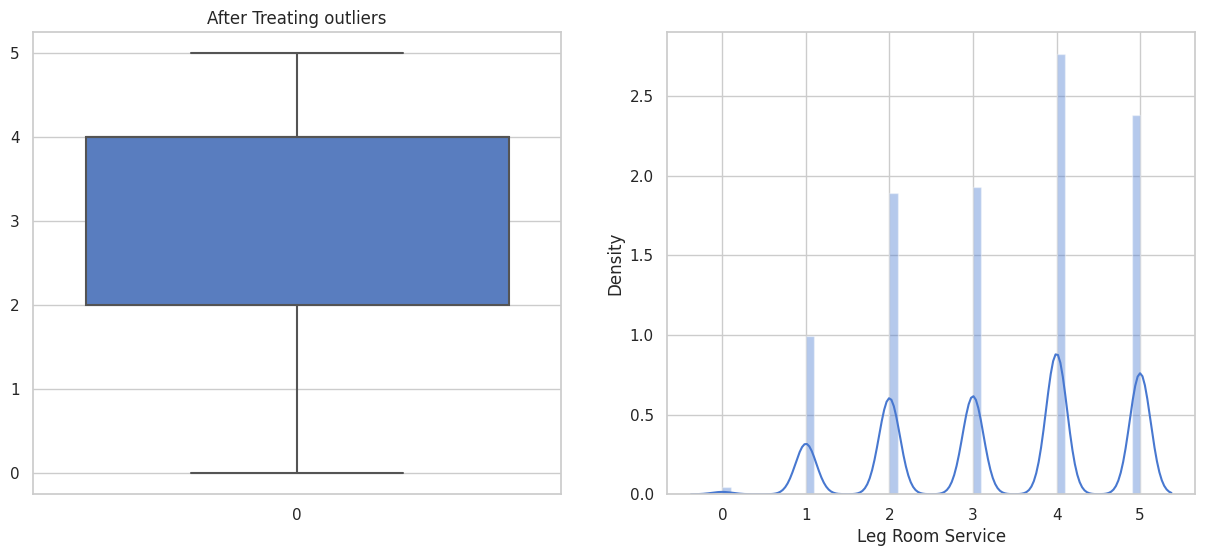

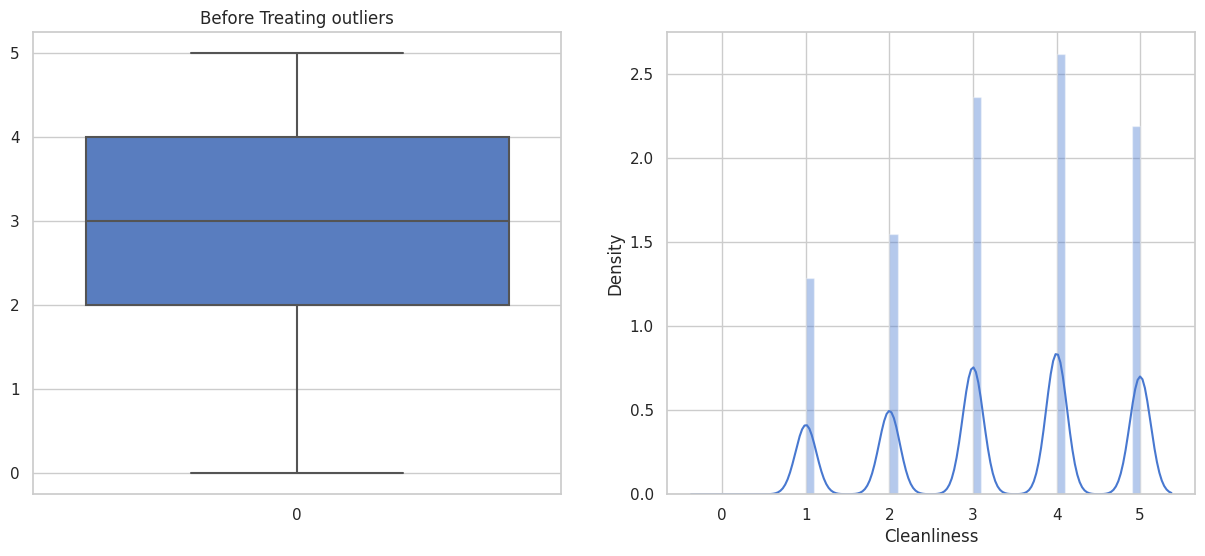

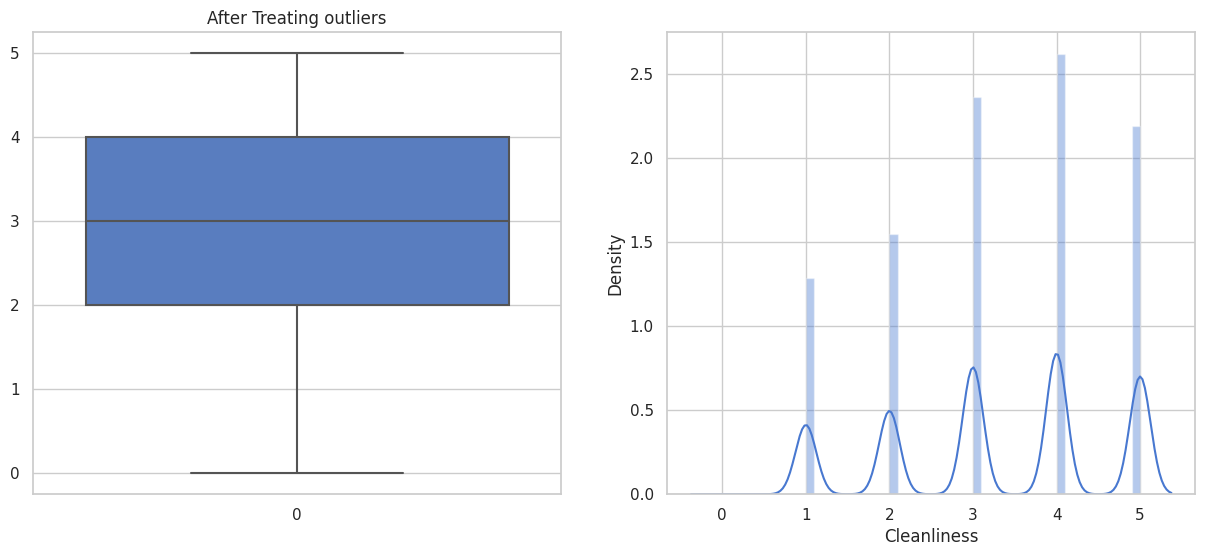

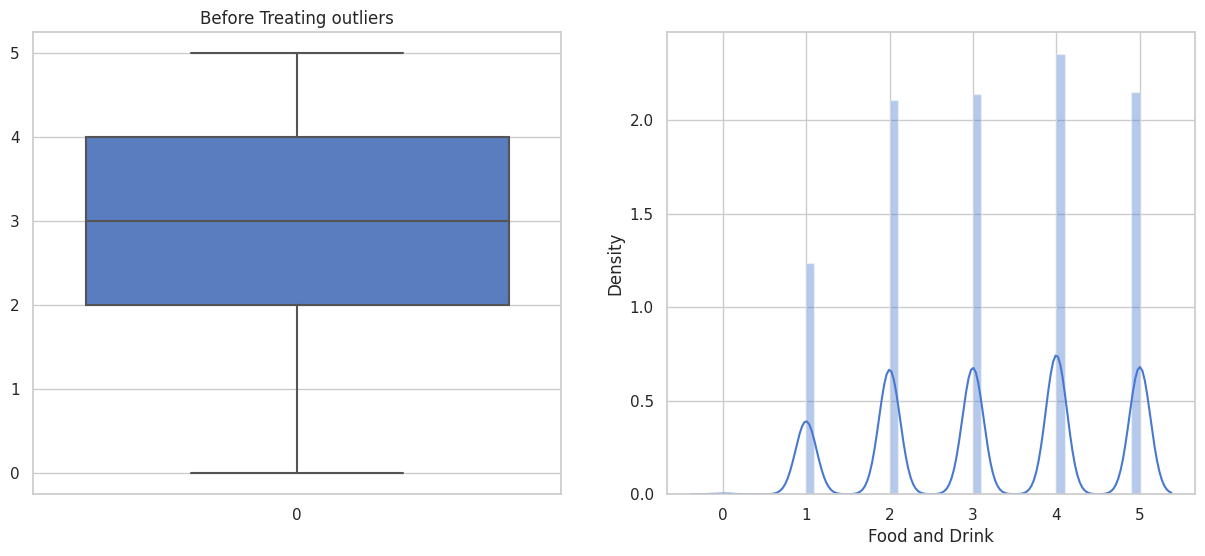

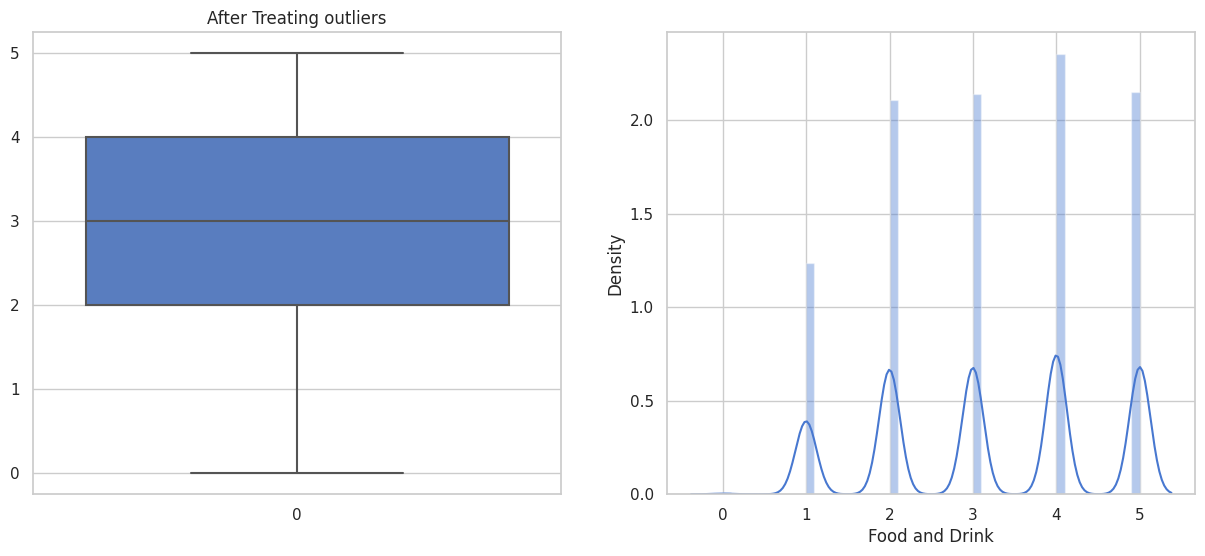

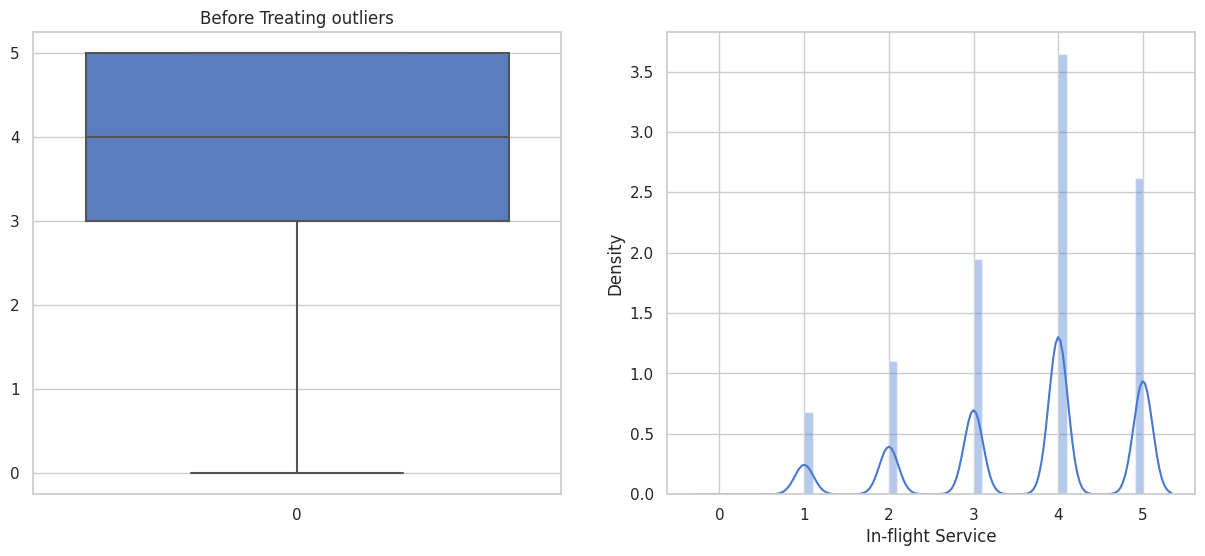

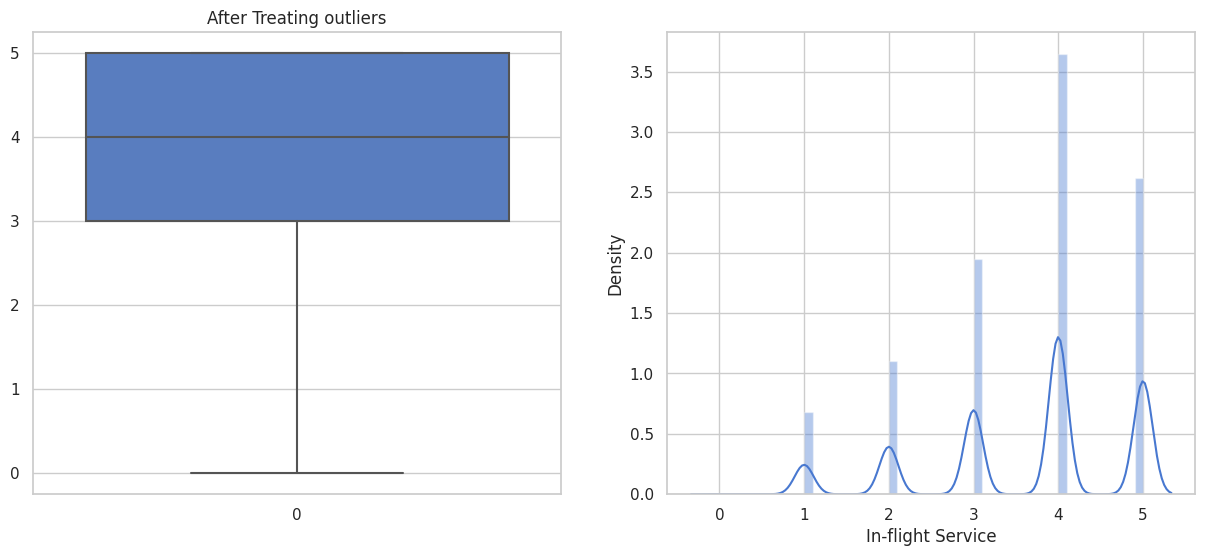

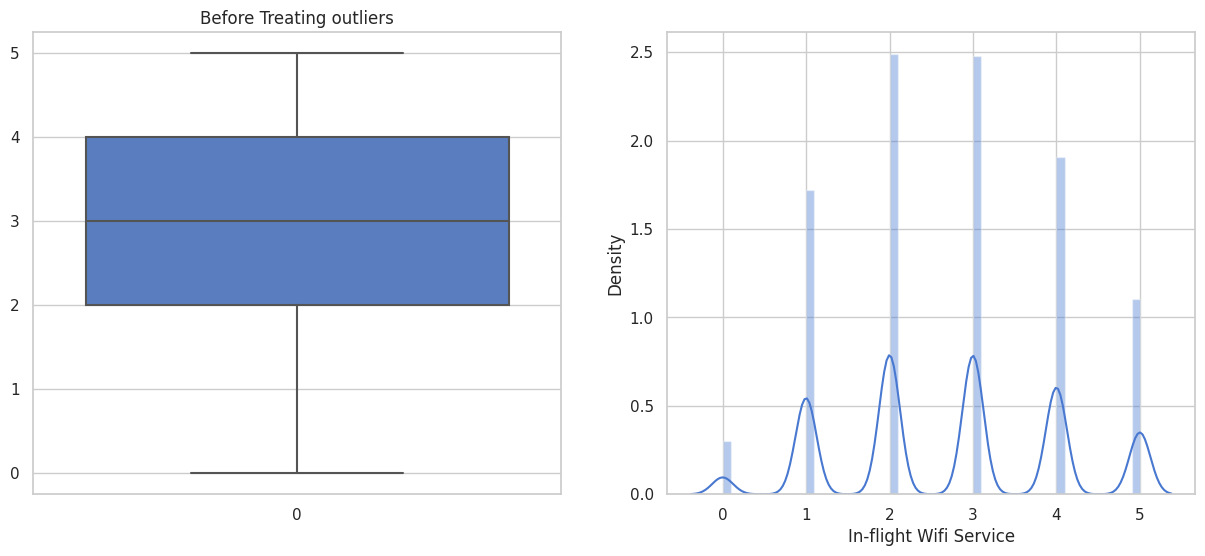

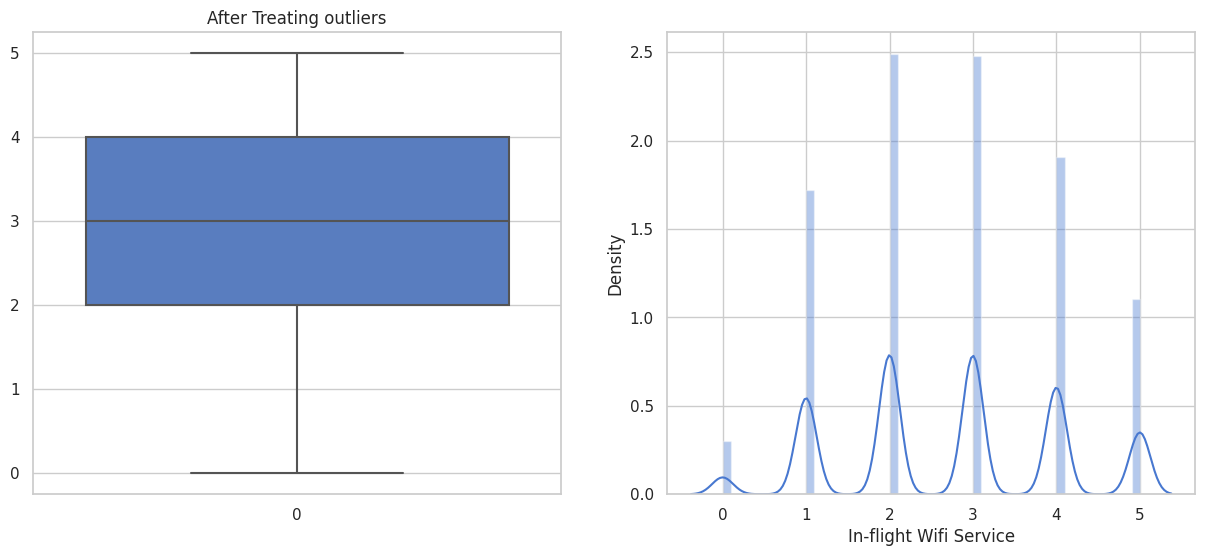

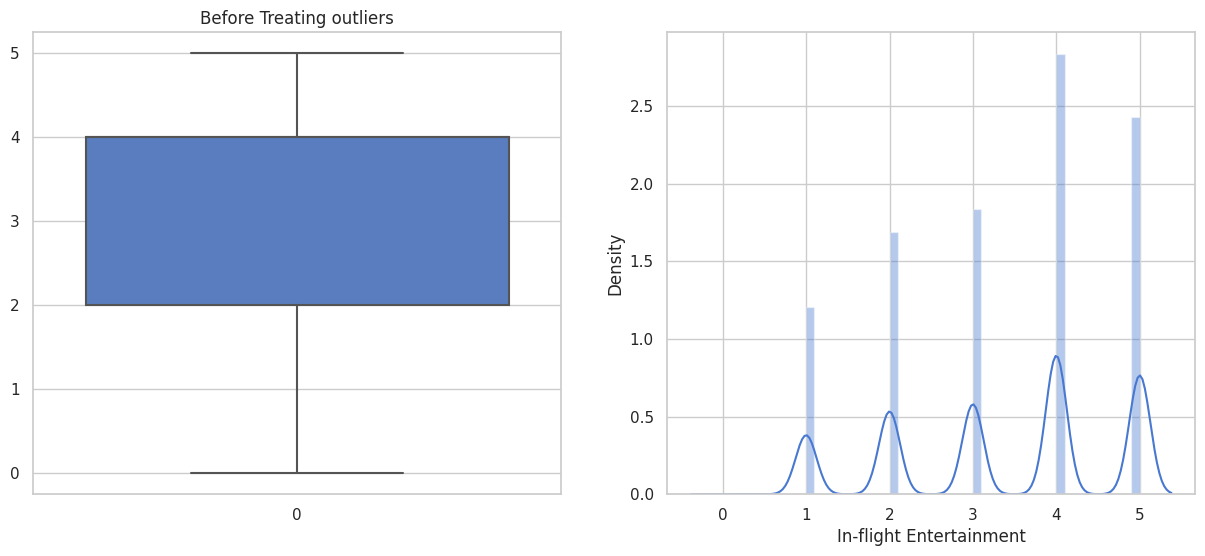

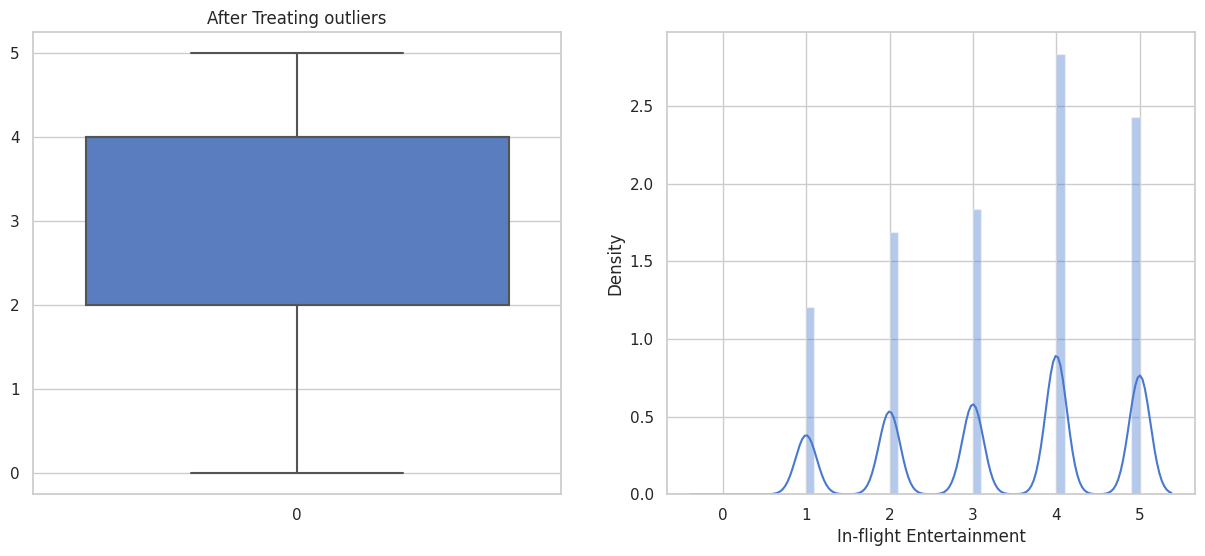

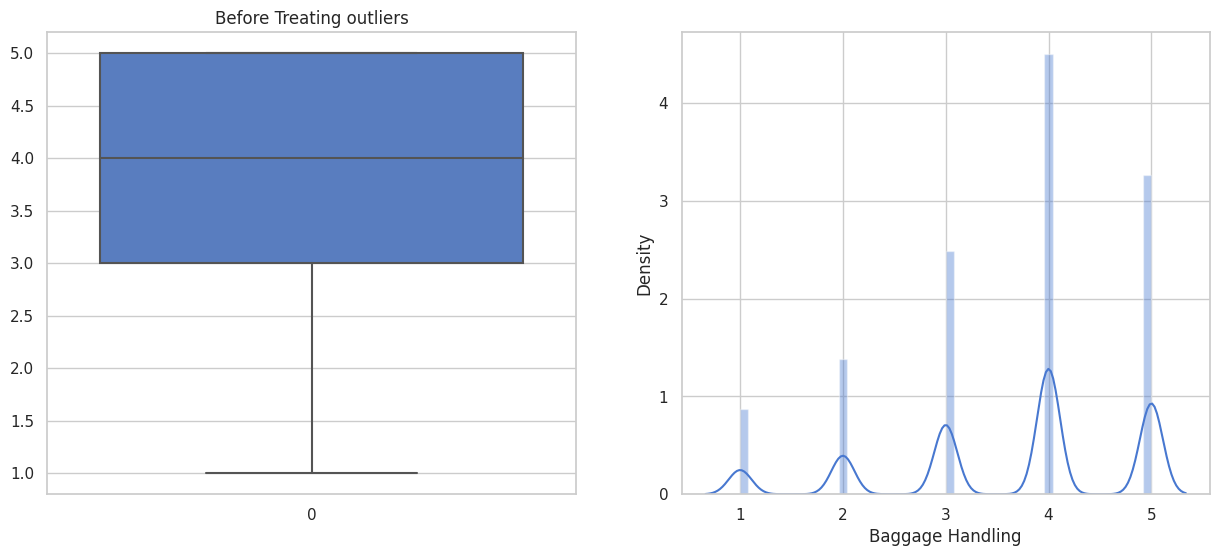

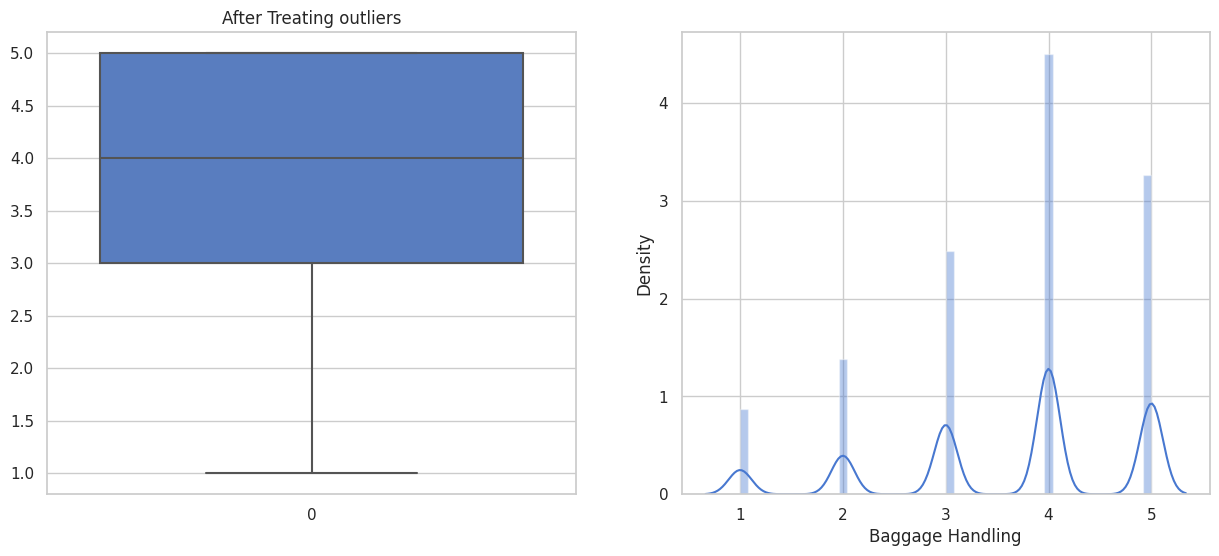

In [ ]:
for column in numeric_columns:
  remove_outlier(df1,column)

**summay**

This box plot represents Before outliers and After outliers of numeric columns only.

Removed outliers



# Feature Engineering

<ipython-input-66-270323fd1aab>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

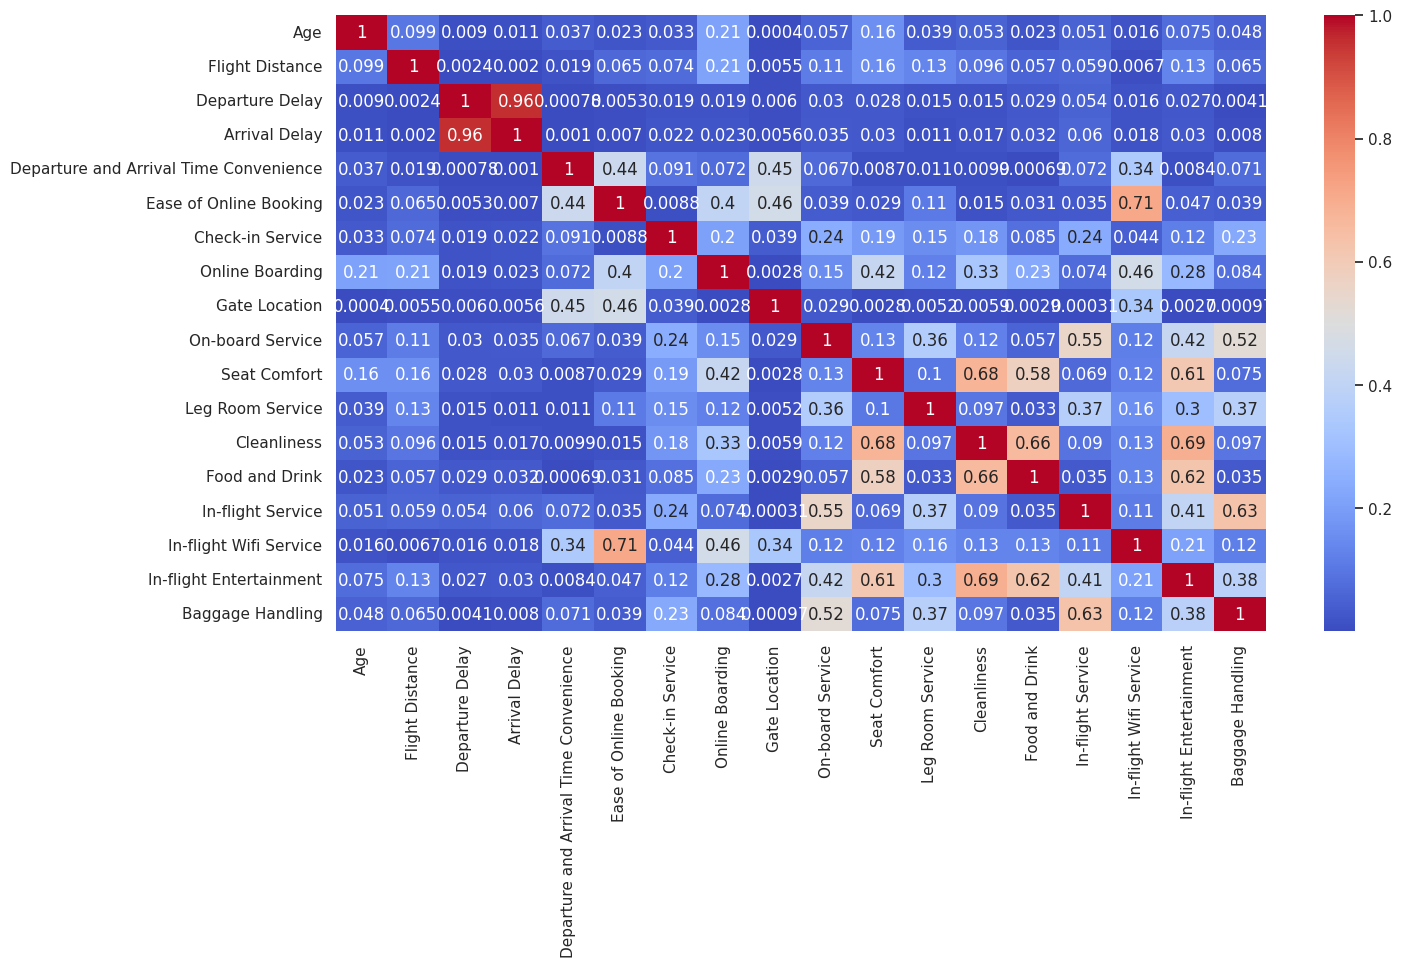

In [ ]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Summary**

This Heatmap represents thev corelation between the attributes.

The attributes which have the above 0.7 value they are highly corelated

Here Ease of Online Booking and In-flight Wifi services are highly corelated.

Remain all Attributes are low co-relation.

Here Depature delay and Arrival Delay have 0.96 vlaue so we can drop Arrival Delay

In [ ]:
df1 = df1.drop('Departure Delay', axis=1)

<ipython-input-68-270323fd1aab>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

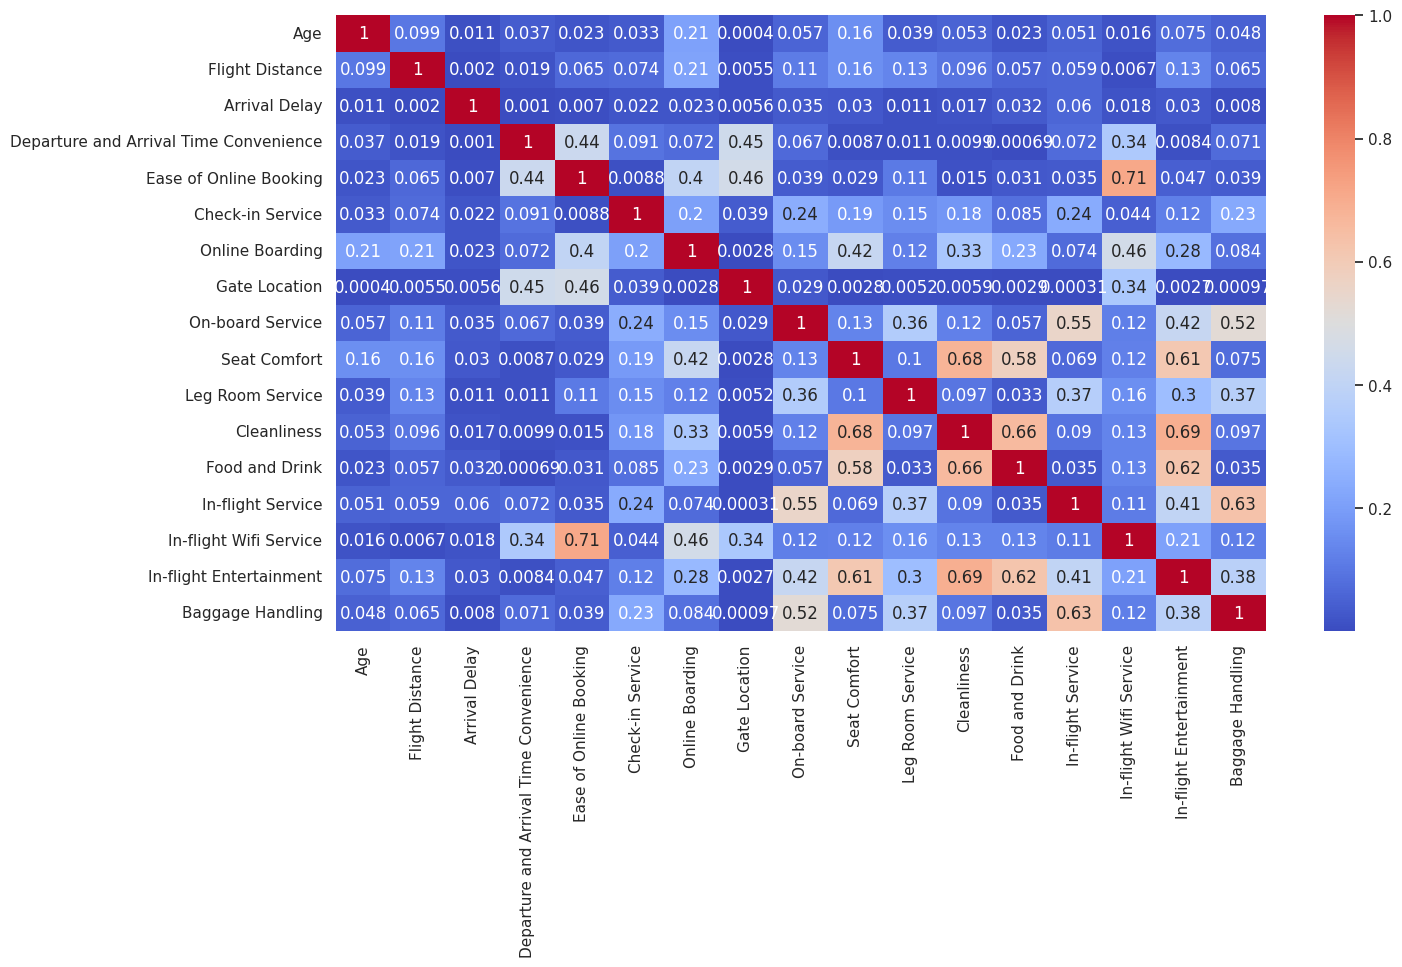

In [ ]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Summary**

This Heatmap represents corelattion after droping the Arrival Delay attribute.



# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_list = []
for i in df1.columns:
    if df1[i].dtype == "object":
        cat_list.append(i)
cat_list

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [ ]:
labelen = LabelEncoder()
for col in df1[cat_list]:
    df1[col] = labelen.fit_transform(df1[col])

In [ ]:
df1["Satisfaction"].value_counts(normalize=True)*100

0    56.553742
1    43.446258
Name: Satisfaction, dtype: float64

In [ ]:
# #from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(df1.drop(["Satisfaction"], axis=1))
# y = df1["Satisfaction"]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#from imblearn.over_sampling import SMOTE

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score


# Apply SMOTE to balance the class distribution of the training set
#smote = SMOTE()
#X_train_re, y_train_re = smote.fit_resample(X_scaled , y)

##from collections import Counter
#print('Original dataset shape', Counter(y_train))
#print('Resample dataset shape', Counter(y_train_re))
#Counter(y_train_re)


#X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_re,y_train_re, test_size = 0.20, random_state = 17,stratify=y)






# Train a logistic regression model on the resampled training set
#lr = LogisticRegression(random_state=42)
#lr.fit(X_train_os, y_train_os)

# Evaluate the model on the original testing set
#y_pred = lr.predict(X_test_os)
#accuracy = accuracy_score(y_test_os, y_pred)
#print("Accuracy on the original testing set: {:.2f}%".format(accuracy))

In [ ]:
independendent_variable=df1.drop(['Satisfaction'],axis=1)

dependent_variable=df1['Satisfaction']

In [ ]:
X=independendent_variable
y=dependent_variable

In [ ]:
X.head()

Gender  Age  Customer Type  Type of Travel  Class  Flight Distance  \
0       1   48              0               0      0              821   
1       0   35              1               0      0              821   
2       1   41              1               0      0              853   
3       1   50              1               0      0             1905   
4       0   49              1               0      0             3470   

   Arrival Delay  Departure and Arrival Time Convenience  \
0            5.0                                       3   
1           39.0                                       2   
2            0.0                                       4   
3            0.0                                       2   
4            1.0                                       3   

   Ease of Online Booking  Check-in Service  ...  Gate Location  \
0                       3                 4  ...              3   
1                       2                 3  ...              2   
2                       4                 4  ...              4   
3                       2                 3  ...              2   
4                       3                 3  ...              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling  
0                        5                 5  
1                        5                 5  
2                        3                 3  
3                        5                 5  
4                        3                 3  

[5 rows x 21 columns]

In [ ]:
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y)
print(X_train.shape)
print(X_test.shape)

(103904, 21)
(25976, 21)


# Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 58762, 1: 45142})
Resample dataset shape Counter({0: 73452, 1: 73452})


Counter({0: 73452, 1: 73452})

In [ ]:
#num_before = dict(Counter(y_train))
#num_after =dict(Counter(y_train_sm))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

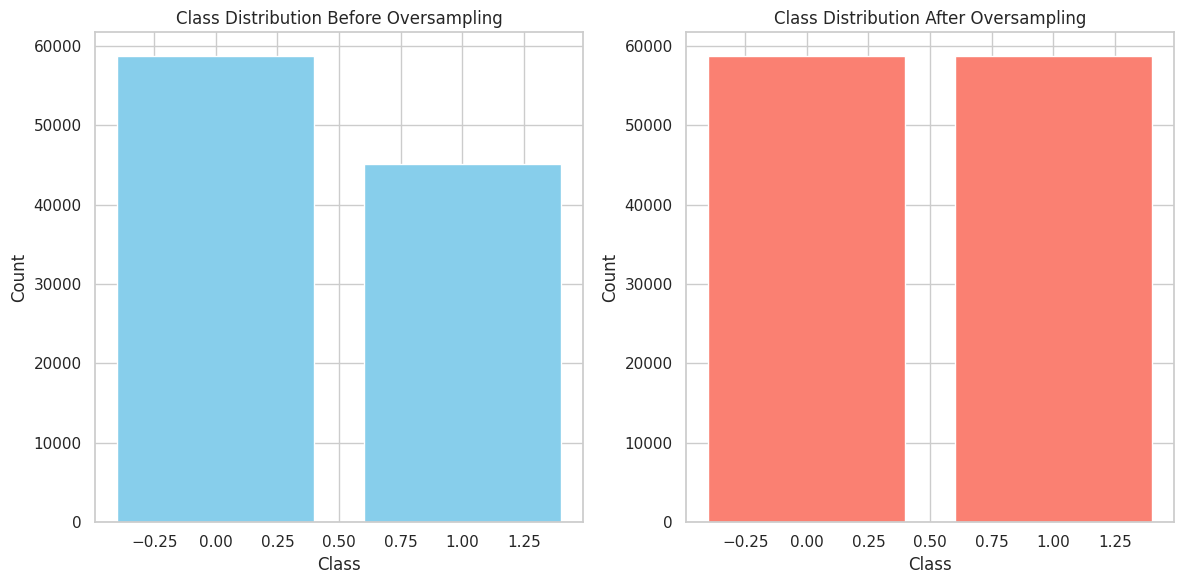

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

# Perform SMOTE oversampling
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Compute class distribution before and after oversampling
class_counts_before = Counter(y_train)
class_counts_after = Counter(y_train_sm)

# Set custom colors for before and after plots
color_before = 'skyblue'
color_after = 'salmon'

# Create separate bar plots for before and after oversampling with custom colors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(class_counts_before.keys(), class_counts_before.values(), color=color_before)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Oversampling')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.keys(), class_counts_after.values(), color=color_after)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Oversampling')

plt.tight_layout()
plt.show()




**Summary**

These Two bar plots represents the Before and After overssampling the Data

left side bar plot shows Before over sampling Original dataset shape Counter({0: 58762, 1: 45142})

Right side Bar plot shows Aftersample dataset shape Counter({0: 73452, 1: 73452})


In [ ]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify = y_train_sm)

# Models without optimization

# **Build Models**





1.   **Logistic Regression**

1.   **Dession Tree**

1.   **Gaussian NB**

1.   **KNN**
2.   **Random Forest**











# Logistic regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_os,y_train_os)
model_training_score = round(100*model.score(X_train_os, y_train_os),2)
model_test_score = round(100*model.score(X_test_os, y_test_os),2)
print("Train Accuracy:", model_training_score, "%\nTest Accuracy:", model_test_score, "%")

Train Accuracy: 82.96 %
Test Accuracy: 83.01 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

In [ ]:
y_pred = np.round(model.predict(X_test_os))

In [ ]:
def print_metrics(actual, predicted):
    print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
    print('precision_score is {}'.format(precision_score(actual, predicted)))
    print('recall_score is {}'.format(recall_score(actual, predicted)))
    print('f1_score is {}'.format(f1_score(actual, predicted)))
    print('roc_auc_score is {}'.format(roc_auc_score(actual, predicted)))
    print('confusion_matrix is \n{}'.format(confusion_matrix(actual, predicted)))
    print('clf_report\n{}'.format(classification_report(actual, predicted)))

In [ ]:
y_pred_train = np.round(model.predict(X_train_os))


In [ ]:
print_metrics(y_train_os, y_pred_train)

accuracy_score is 0.8295876365415501
precision_score is 0.8179262512055486
recall_score is 0.8479227381990683
f1_score is 0.8326544254350232
roc_auc_score is 0.8295878315543309
confusion_matrix is 
[[38137  8873]
 [ 7149 39860]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     47010
           1       0.82      0.85      0.83     47009

    accuracy                           0.83     94019
   macro avg       0.83      0.83      0.83     94019
weighted avg       0.83      0.83      0.83     94019



[[38137  8873]
 [ 7149 39860]]


[Text(0, 0.5, 'Satiesfied'), Text(0, 1.5, 'Disatiesfied or Neutral')]

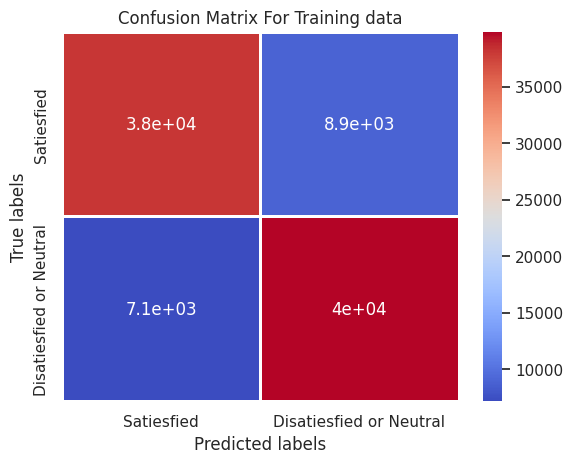

In [ ]:
labels = ['Satiesfied', 'Disatiesfied or Neutral']
cm = confusion_matrix(y_train_os, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

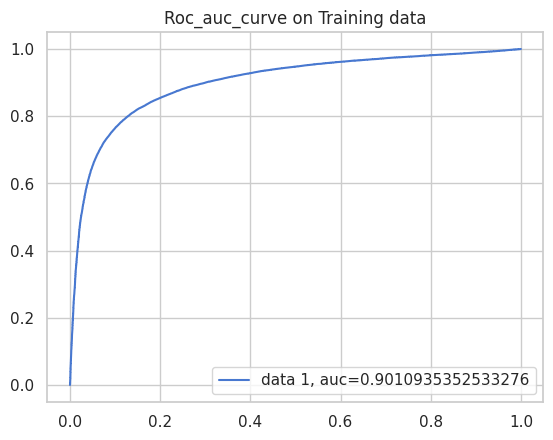

In [ ]:
y_pred = model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_pred )
auc = roc_auc_score(y_train_os,  y_pred )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_test = np.round(model.predict(X_test_os))

In [ ]:
print_metrics(y_test_os, y_pred_test)

accuracy_score is 0.8301212507977026
precision_score is 0.8200263939293962
recall_score is 0.8459116821237131
f1_score is 0.8327679356703104
roc_auc_score is 0.8301205789788069
confusion_matrix is 
[[9570 2182]
 [1811 9942]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     11752
           1       0.82      0.85      0.83     11753

    accuracy                           0.83     23505
   macro avg       0.83      0.83      0.83     23505
weighted avg       0.83      0.83      0.83     23505



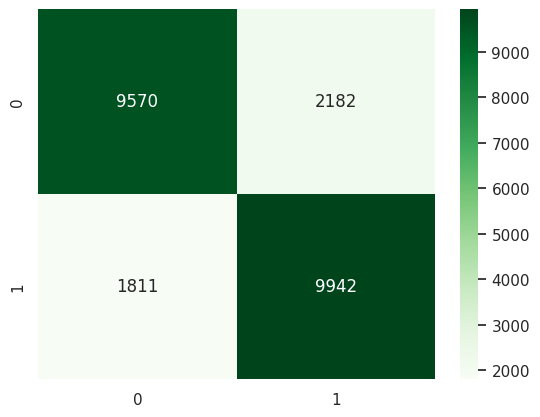

In [ ]:
sns.heatmap(confusion_matrix(y_test_os, y_pred_test), annot=True, fmt=".0f", cmap="Greens");

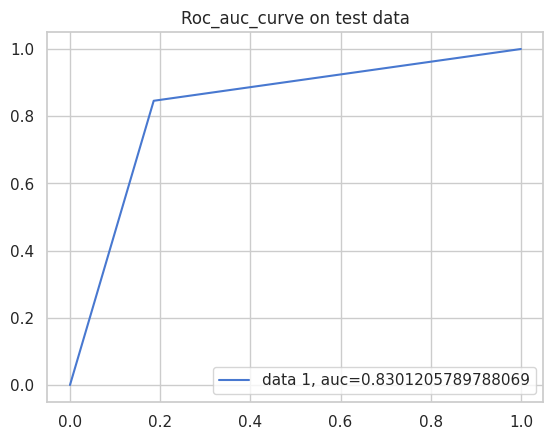

In [ ]:
y_pred = model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_pred_test)
auc = roc_auc_score(y_test_os,  y_pred_test )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on test data")
plt.legend(loc=4)
plt.show()

In [ ]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = LogisticRegression(max_iter=i)
    model.fit(X_train,y_train)
    tr_list.append(round(100*model.score(X_train_os, y_train_os),2))
    ts_list.append(round(100*model.score(X_test_os, y_test_os),2))

print("Train accuracy:", tr_list)
print("Test accuracy:", ts_list)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Train accuracy: [50.0, 50.0, 50.03, 50.3, 51.33, 53.44, 56.4, 58.67, 60.11, 60.57, 60.56, 60.55, 60.55, 60.59, 60.55, 60.49, 60.48, 60.5, 60.51, 60.51, 60.51, 60.54, 60.58, 60.65, 60.86, 61.16, 61.35, 61.95, 62.49, 64.84, 67.8, 70.77, 72.14, 72.4, 72.47, 72.48]
Test accuracy: [50.0, 50.0, 50.02, 50.2, 51.15, 53.33, 56.47, 58.76, 60.43, 60.77, 60.7, 60.71, 60.69, 60.63, 60.54, 60.48, 60.44, 60.52, 60.54, 60.55, 60.55, 60.55, 60.65, 60.69, 60.91, 61.3, 61.77, 62.34, 62.88, 65.16, 68.21, 71.24, 72.7, 72.91, 73.05, 73.06]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



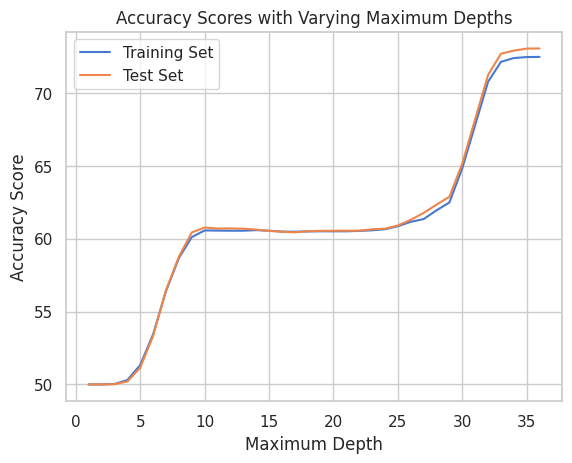

In [ ]:
plt.plot(range(1, 37), tr_list, label='Training Set')
plt.plot(range(1, 37), ts_list, label='Test Set')
plt.title('Accuracy Scores with Varying Maximum Depths')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

We have implemented logistic regression and we getting accuracy_score is approx 83%. and precision score approx is 84% and f1_score is 83%and roc_auc approx is 83% As we have imbalanced dataset, recall_score is approx 84% better parameter. Let's go ahead with other models and see if they can give better result.

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_os,y_train_os)
model_training_score = round(100*model.score(X_train_os, y_train_os),2)
print ('Tree Depth:', model.get_depth())
print ('Tree Leaves:', model.get_n_leaves())
model_test_score = round(100*model.score(X_test_os, y_test_os),2)
print("Train Accuracy:", model_training_score, "%\nTest Accuracy:", model_test_score, "%")

Tree Depth: 38
Tree Leaves: 4241
Train Accuracy: 100.0 %
Test Accuracy: 94.33 %


In [ ]:
y_pred_train_dt = np.round(model.predict(X_train_os))

In [ ]:
print_metrics(y_train_os, y_pred_train_dt)

accuracy_score is 1.0
precision_score is 1.0
recall_score is 1.0
f1_score is 1.0
roc_auc_score is 1.0
confusion_matrix is 
[[47010     0]
 [    0 47009]]
clf_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47010
           1       1.00      1.00      1.00     47009

    accuracy                           1.00     94019
   macro avg       1.00      1.00      1.00     94019
weighted avg       1.00      1.00      1.00     94019



In [ ]:
y_pred_test_dt = np.round(model.predict(X_test_os))

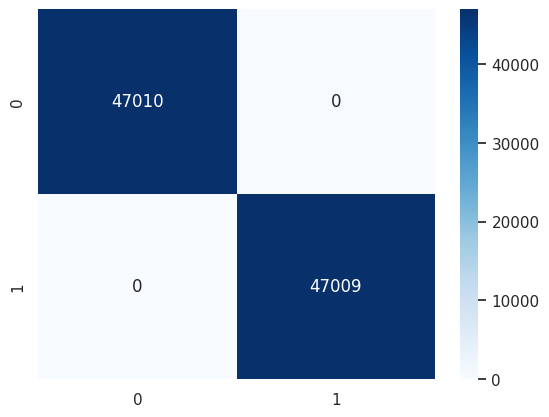

In [ ]:
sns.heatmap(confusion_matrix(y_train_os, y_pred_train_dt), annot=True, fmt=".0f", cmap="Blues");

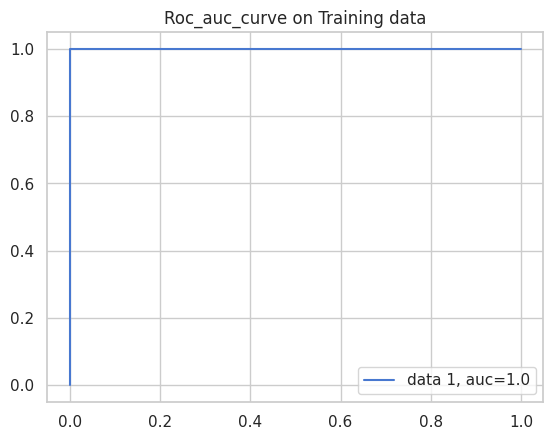

In [ ]:
y_pred_dr = model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_pred_train_dt)
auc = roc_auc_score(y_train_os,  y_pred_train_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os, y_pred_test_dt)

accuracy_score is 0.9433312061263561
precision_score is 0.9455322787516033
recall_score is 0.9408661618310219
f1_score is 0.943193449334698
roc_auc_score is 0.9433313110040066
confusion_matrix is 
[[11115   637]
 [  695 11058]]
clf_report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11752
           1       0.95      0.94      0.94     11753

    accuracy                           0.94     23505
   macro avg       0.94      0.94      0.94     23505
weighted avg       0.94      0.94      0.94     23505



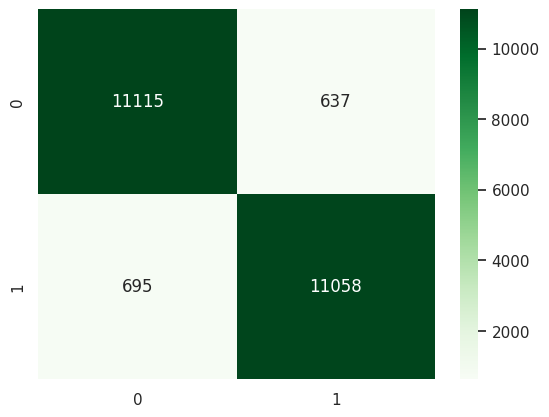

In [ ]:
sns.heatmap(confusion_matrix(y_test_os, y_pred_test_dt), annot=True, fmt=".0f", cmap="Greens");

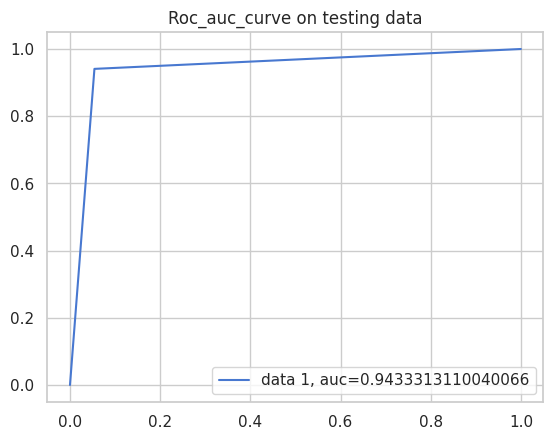

In [ ]:
y_pred_dr = model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_pred_test_dt)
auc = roc_auc_score(y_test_os,  y_pred_test_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on testing data")
plt.legend(loc=4)
plt.show()

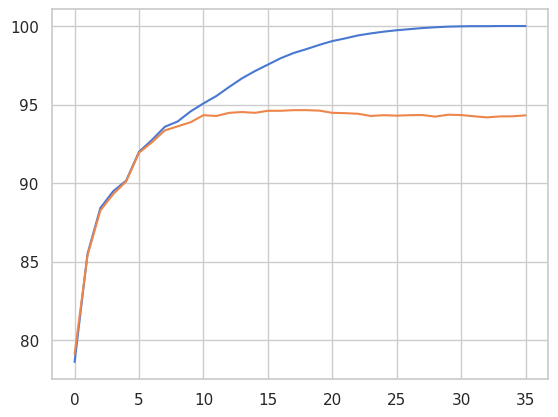

In [ ]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train_os,y_train_os)
    tr_list.append(round(100*model.score(X_train_os, y_train_os),2))
    ts_list.append(round(100*model.score(X_test_os, y_test_os),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

We have implemented Dession Tree and we getting accuracy_score is 0.9030325720703857
precision_score is 0.8878553648630945
recall_score is 0.9226056769450685
f1_score is 0.9048970190606537
roc_auc_score is 0.9030319058653185

Let's go ahead with other models and see if they can give better result.




# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train_os, y_train_os),2)
model_test_score = round(100*model.score(X_test_os, y_test_os),2)
print("n_estimators: ", model.n_estimators , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

n_estimators:  100  |  Train Accuracy: 98.52 %  | Test Accuracy: 98.41 %


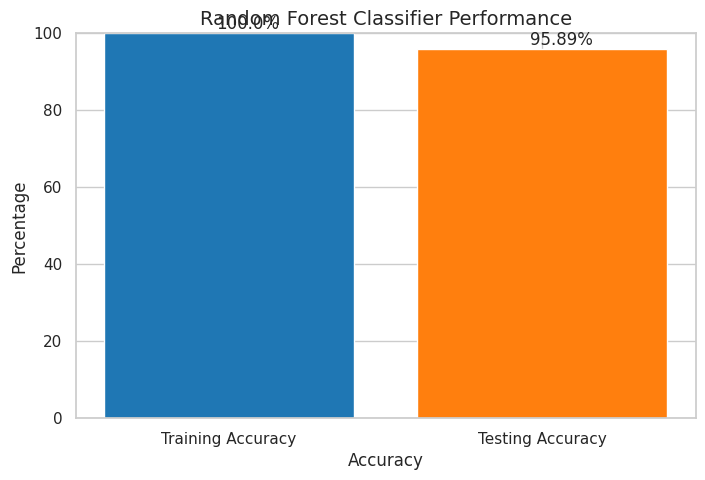

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train_os,y_train_os)
model_training_score = round(100*model.score(X_train_os, y_train_os),2)
model_test_score = round(100*model.score(X_test_os, y_test_os),2)
# Create a bar chart to visualize the performance of the model
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [model_training_score, model_test_score]
colors = ['#1f77b4', '#ff7f0e']
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels, scores, color=colors)
ax.set_ylim([0, 100])
ax.set_title('Random Forest Classifier Performance', fontsize=14)
ax.set_xlabel('Accuracy', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
for i, v in enumerate(scores):
    ax.text(i-0.04, v+1, str(v)+'%', fontsize=12)
plt.show()


In [ ]:
y_pred_rf_train = np.round(model.predict(X_train_os))

In [ ]:
print_metrics(y_train_os, y_pred_rf_train)

accuracy_score is 0.9999893638519873
precision_score is 0.9999787279302276
recall_score is 1.0
f1_score is 0.9999893638519873
roc_auc_score is 0.9999893639651137
confusion_matrix is 
[[47009     1]
 [    0 47009]]
clf_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47010
           1       1.00      1.00      1.00     47009

    accuracy                           1.00     94019
   macro avg       1.00      1.00      1.00     94019
weighted avg       1.00      1.00      1.00     94019



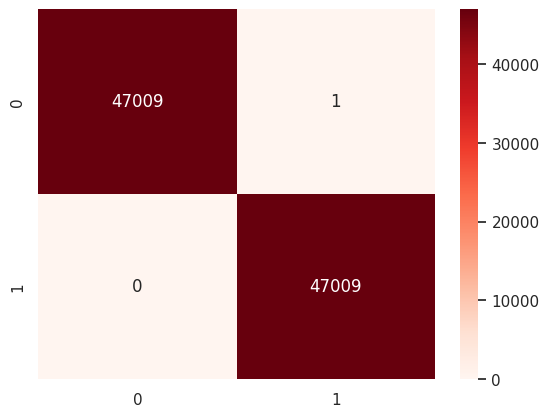

In [ ]:
sns.heatmap(confusion_matrix(y_train_os, y_pred_rf_train ), annot=True, fmt=".0f", cmap="Reds");

In [ ]:
y_pred_rf_train = np.round(model.predict(X_train_os))

In [ ]:
y_pred_rf = np.round(model.predict(X_test_os))

In [ ]:
print_metrics(y_test_os, y_pred_rf)

accuracy_score is 0.9588598170602
precision_score is 0.9709221096751659
recall_score is 0.9460563260444141
f1_score is 0.9583279465632407
roc_auc_score is 0.9588603617968837
confusion_matrix is 
[[11419   333]
 [  634 11119]]
clf_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11752
           1       0.97      0.95      0.96     11753

    accuracy                           0.96     23505
   macro avg       0.96      0.96      0.96     23505
weighted avg       0.96      0.96      0.96     23505



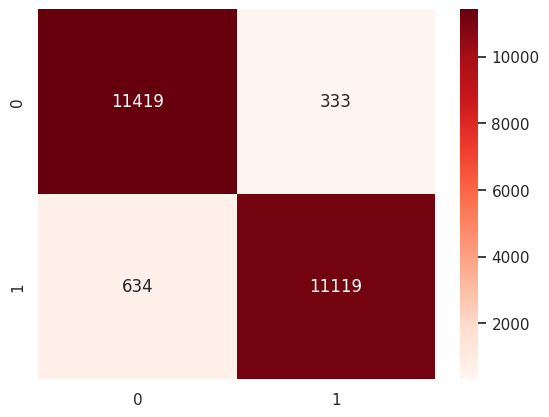

In [ ]:
sns.heatmap(confusion_matrix(y_test_os, y_pred_rf), annot=True, fmt=".0f", cmap="Reds");

In [ ]:
y_pred_rf_train = np.round(model.predict(X_train_os))

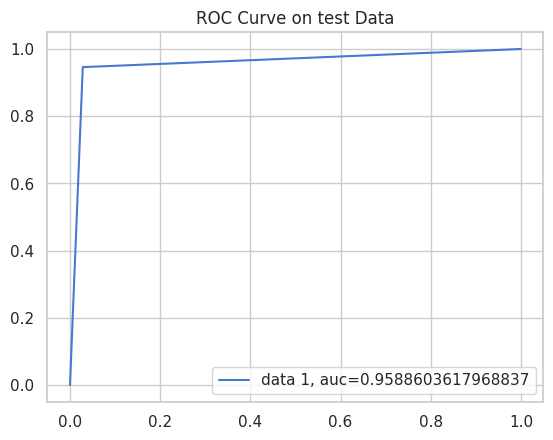

In [ ]:
y_pred_rf = model.predict(X_test_os)
fpr, tpr, _ = roc_curve(y_test_os,  y_pred_rf)
auc = roc_auc_score(y_test_os,  y_pred_rf)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on test Data")
plt.legend(loc=4)
plt.show()

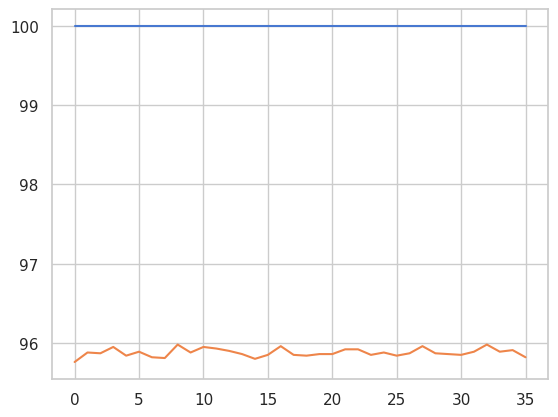

In [ ]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = RandomForestClassifier()
    model.fit(X_train_os,y_train_os)
    tr_list.append(round(100*model.score(X_train_os, y_train_os),2))
    ts_list.append(round(100*model.score(X_test_os, y_test_os),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

**Summary**

We have implemented Random Forest and we getting accuracy_score is 0.9838757711125292
precision_score is 1.0
recall_score is 0.9677529141495789
f1_score is 0.9836122281316211
roc_auc_score is 0.9838764570747894

Let's go ahead with other models and see if they can give better result.

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gn = GaussianNB()
model_gn.fit(X_train_os,y_train_os)
model_training_score = round(100*model_gn.score(X_train_os, y_train_os),2)
model_test_score = round(100*model_gn.score(X_test_os, y_test_os),2)
print("Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

Train Accuracy: 85.56 %  | Test Accuracy: 85.44 %


In [ ]:
y_pred_gnb_train = np.round(model_gn.predict(X_train_os))

In [ ]:
print_metrics(y_train_os, y_pred_gnb_train)

accuracy_score is 0.8555930184324445
precision_score is 0.8778993534385314
recall_score is 0.826075857814461
f1_score is 0.8511995440746138
roc_auc_score is 0.8555927044868945
confusion_matrix is 
[[41609  5401]
 [ 8176 38833]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     47010
           1       0.88      0.83      0.85     47009

    accuracy                           0.86     94019
   macro avg       0.86      0.86      0.86     94019
weighted avg       0.86      0.86      0.86     94019



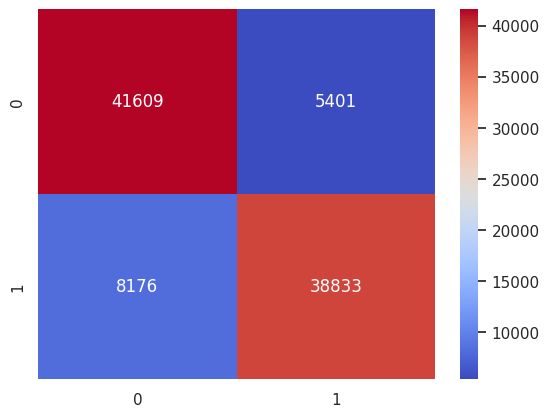

In [ ]:
sns.heatmap(confusion_matrix(y_train_os,y_pred_gnb_train), annot=True, fmt=".0f", cmap="coolwarm");

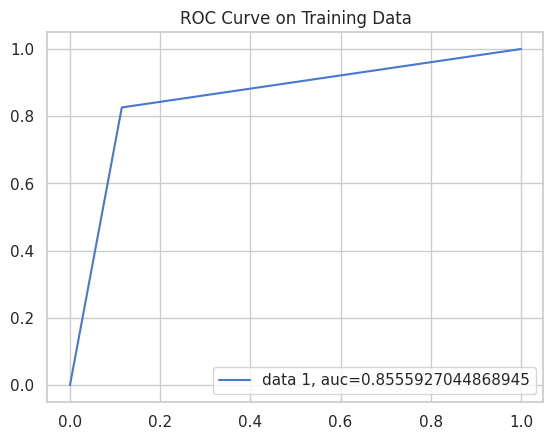

In [ ]:
y_pred_gnb = model.predict(X_train_os)
fpr, tpr, _ = roc_curve(y_train_os,  y_pred_gnb_train)
auc = roc_auc_score(y_train_os,  y_pred_gnb_train)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Training Data")
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_gnb_test = np.round(model.predict(X_test_os))

In [ ]:
print_metrics(y_test_os, y_pred_gnb_test )

accuracy_score is 0.854371410338226
precision_score is 0.8754281593654227
recall_score is 0.826342210499447
f1_score is 0.8501772661618594
roc_auc_score is 0.8543726028671504
confusion_matrix is 
[[10370  1382]
 [ 2041  9712]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     11752
           1       0.88      0.83      0.85     11753

    accuracy                           0.85     23505
   macro avg       0.86      0.85      0.85     23505
weighted avg       0.86      0.85      0.85     23505



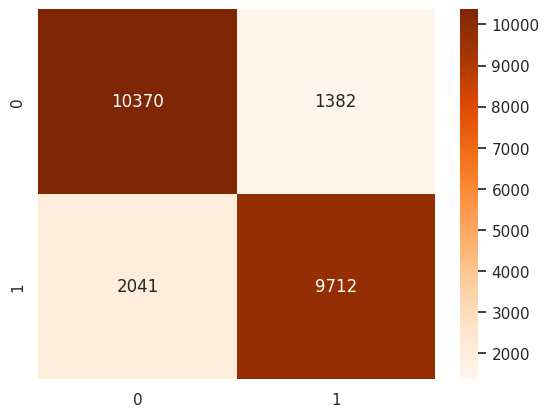

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_pred_gnb_test ), annot=True, fmt=".0f", cmap="Oranges");

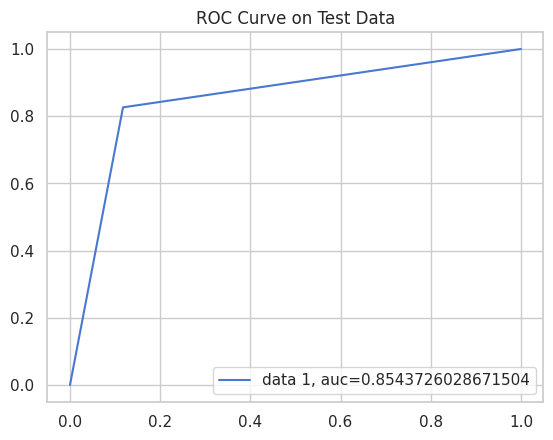

In [ ]:
y_pred_gnb_test = model.predict(X_test_os)
fpr, tpr, _ = roc_curve(y_test_os,  y_pred_gnb_test)
auc = roc_auc_score(y_test_os,  y_pred_gnb_test)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Test Data")
plt.legend(loc=4)
plt.show()

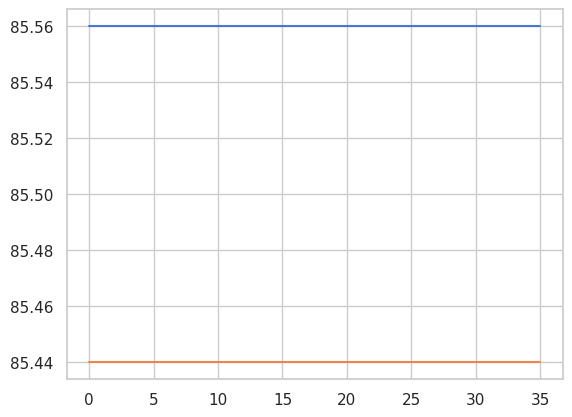

In [ ]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = GaussianNB()
    model.fit(X_train_os,y_train_os)
    tr_list.append(round(100*model.score(X_train_os, y_train_os),2))
    ts_list.append(round(100*model.score(X_test_os, y_test_os),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

**Summary**

We have implemented Gausian NB  and we getting
accuracy_score is 0.854371410338226
precision_score is 0.8753604902667628
recall_score is 0.8264272951586829
f1_score is 0.85019038032299
roc_auc_score is 0.8543725992471426
Let's go ahead with other models and see if they can give better result.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_os,y_train_os)
model_training_score = round(100*model.score(X_train_os, y_train_os),2)
model_test_score = round(100*model.score(X_test_os, y_test_os),2)
print("Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

Train Accuracy: 85.19 %  | Test Accuracy: 77.22 %


In [ ]:
y_pred_train_knn = np.round(model.predict(X_train_os))
print_metrics(y_train_os,y_pred_train_knn)

accuracy_score is 0.8518810027760346
precision_score is 0.8388054810232882
recall_score is 0.8711736050543513
f1_score is 0.8546831955922864
roc_auc_score is 0.8518812079728256
confusion_matrix is 
[[39140  7870]
 [ 6056 40953]]
clf_report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     47010
           1       0.84      0.87      0.85     47009

    accuracy                           0.85     94019
   macro avg       0.85      0.85      0.85     94019
weighted avg       0.85      0.85      0.85     94019



[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatisfied or Neutral')]

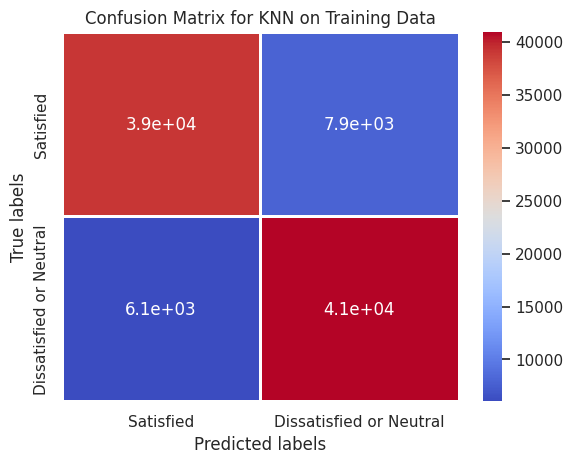

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_os, y_train_os)

# Predict on training data
y_pred_train_knn = model.predict(X_train_os)

# Compute the confusion matrix
cm = confusion_matrix(y_train_os, y_pred_train_knn)

# Plot the confusion matrix
labels = ['Satisfied', 'Dissatisfied or Neutral']
ax = plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN on Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

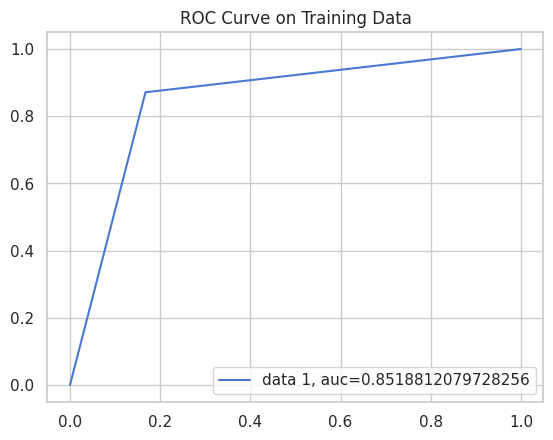

In [ ]:
y_pred_knn_train = model.predict(X_train_os)
fpr, tpr, _ = roc_curve(y_train_os,  y_pred_knn_train)
auc = roc_auc_score(y_train_os,  y_pred_knn_train)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Training Data")
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_knn = np.round(model.predict(X_test_os))

In [ ]:
print_metrics(y_test_os,y_pred_knn )

accuracy_score is 0.7721761327377153
precision_score is 0.7608022175118213
recall_score is 0.7940100399897898
f1_score is 0.7770515008951246
roc_auc_score is 0.7721752037933973
confusion_matrix is 
[[8818 2934]
 [2421 9332]]
clf_report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     11752
           1       0.76      0.79      0.78     11753

    accuracy                           0.77     23505
   macro avg       0.77      0.77      0.77     23505
weighted avg       0.77      0.77      0.77     23505



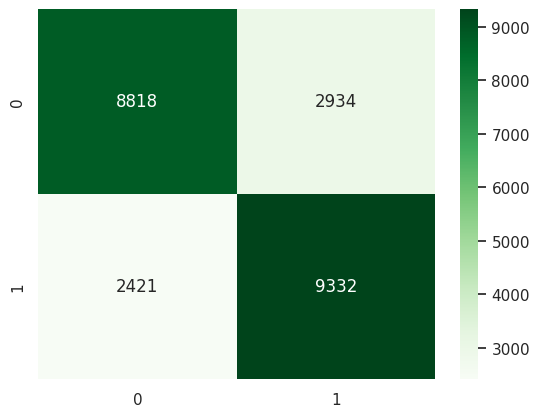

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_pred_knn), annot=True, fmt=".0f", cmap="Greens");

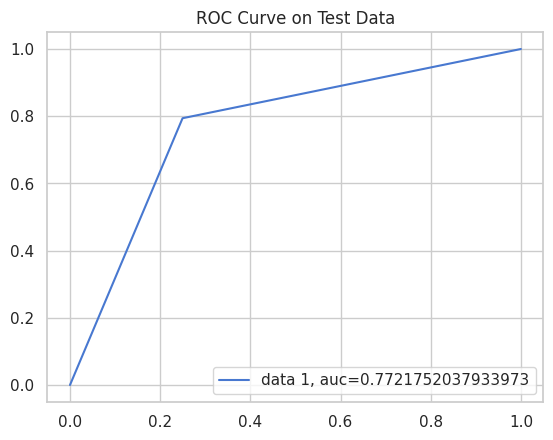

In [ ]:
y_pred_knn = model.predict(X_test_os)
fpr, tpr, _ = roc_curve(y_test_os,  y_pred_knn)
auc = roc_auc_score(y_test_os,  y_pred_knn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Test Data")
plt.legend(loc=4)
plt.show()

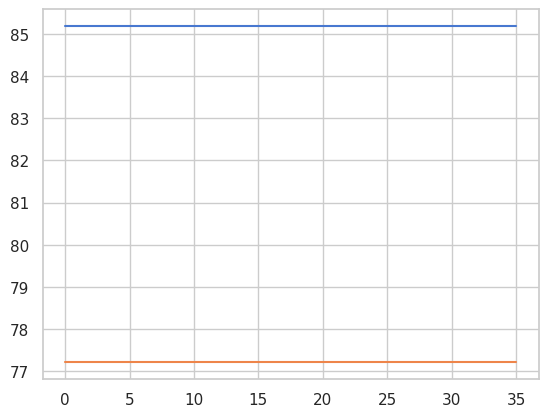

In [ ]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = KNeighborsClassifier(n_jobs=-1)
    model.fit(X_train_os,y_train_os)
    tr_list.append(round(100*model.score(X_train_os, y_train_os),2))
    ts_list.append(round(100*model.score(X_test_os, y_test_os),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

**Summary**

We have implemented KNN and we getting
accuracy_score is 0.7713252499468198
precision_score is 0.7588894301022894
recall_score is 0.7953713945375649
f1_score is 0.7767022558265133
roc_auc_score is 0.7713242268807634
 Let's go ahead with other models and see if they can give better result.

# with optimization

# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

model_log= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
model_log.fit(X_train_os, y_train_os)

In [ ]:
# Fit the model with training data
#model_log.fit(X_train_os, y_train_os)

# Model score on training data
print(f"Training model score: {model_log.score(X_train_os, y_train_os)}")

# Model score on testing data
print(f"Testing model score: {model_log.score(X_test_os, y_test_os)}")


Training model score: 0.8119635392846127
Testing model score: 0.8138693894915975


In [ ]:
optimized_log=model_log.best_estimator_
optimized_log

LogisticRegression(C=150)

In [ ]:
y_train_class_preds = model_log.predict(X_train_os)
y_test_class_preds = model_log.predict(X_test_os)

In [ ]:
print_metrics(y_train_os,y_train_class_preds)

accuracy_score is 0.8119635392846127
precision_score is 0.7870874280568497
recall_score is 0.8552830309089748
f1_score is 0.8197693978040799
roc_auc_score is 0.8119640000322369
confusion_matrix is 
[[36134 10876]
 [ 6803 40206]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     47010
           1       0.79      0.86      0.82     47009

    accuracy                           0.81     94019
   macro avg       0.81      0.81      0.81     94019
weighted avg       0.81      0.81      0.81     94019



[[36134 10876]
 [ 6803 40206]]


[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatiesfied or neutral')]

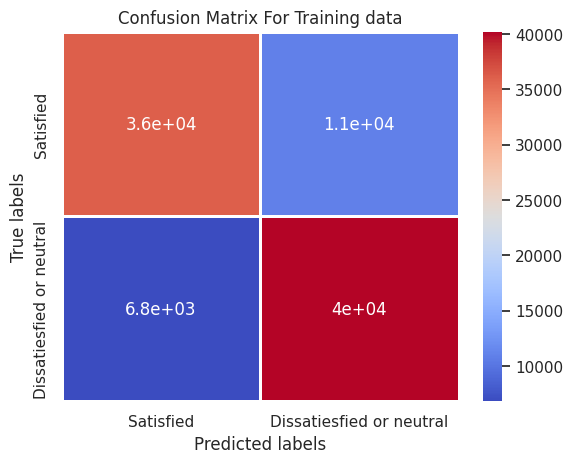

In [ ]:
labels = ['Satisfied', 'Dissatiesfied or neutral']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.8301212507977026
precision_score is 0.8200263939293962
recall_score is 0.8459116821237131
f1_score is 0.8327679356703104
roc_auc_score is 0.8301205789788069
confusion_matrix is 
[[9570 2182]
 [1811 9942]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     11752
           1       0.82      0.85      0.83     11753

    accuracy                           0.83     23505
   macro avg       0.83      0.83      0.83     23505
weighted avg       0.83      0.83      0.83     23505



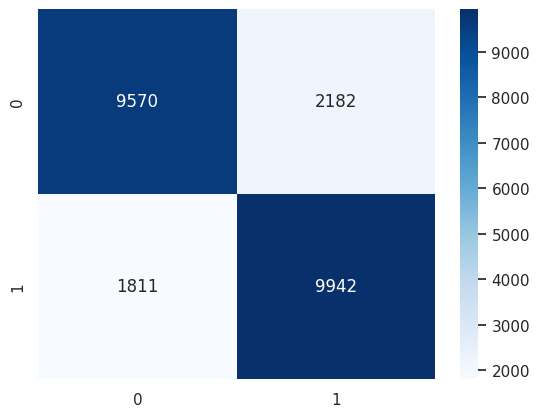

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_test_class_preds), annot=True, fmt=".0f", cmap="Blues");

In [ ]:
y_train_class_preds = model_log.predict(X_train_os)
y_test_class_preds = model_log.predict(X_test_os)

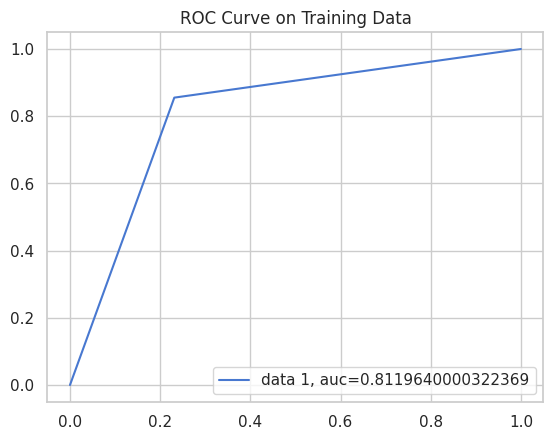

In [ ]:
y_train_class_preds = model_log.predict(X_train_os)
fpr, tpr, _ = roc_curve(y_train_os,  y_train_class_preds)
auc = roc_auc_score(y_train_os,  y_train_class_preds)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Training Data")
plt.legend(loc=4)
plt.show()

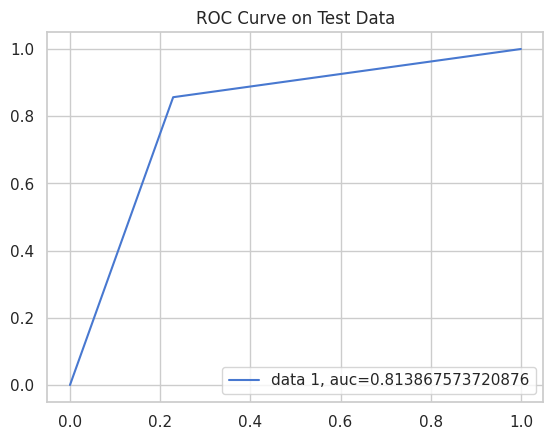

In [ ]:
y_test_class_preds = model_log.predict(X_test_os)
fpr, tpr, _ = roc_curve(y_test_os,  y_test_class_preds)
auc = roc_auc_score(y_test_os,  y_test_class_preds)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("ROC Curve on Test Data")
plt.legend(loc=4)
plt.show()

We have implemented Logistic Regression and we getting ccuracy_score is 0.8154435226547543
precision_score is 0.7907159099819651
recall_score is 0.8579937037352166
f1_score is 0.8229821268260833
roc_auc_score is 0.8154417123168936 Let's go ahead with other models and see if they can give better result.

# RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_score_

0.9501696623766278

In [ ]:
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9666450398323743
testing_model_score:  0.9499255477557966


In [ ]:
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [ ]:
print_metrics( y_train_os, y_train_class_preds_rf)

accuracy_score is 0.9666450398323743
precision_score is 0.9740464613722313
recall_score is 0.9588376693824586
f1_score is 0.9663822306076069
roc_auc_score is 0.9666449567929098
confusion_matrix is 
[[45809  1201]
 [ 1935 45074]]
clf_report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     47010
           1       0.97      0.96      0.97     47009

    accuracy                           0.97     94019
   macro avg       0.97      0.97      0.97     94019
weighted avg       0.97      0.97      0.97     94019



[[45809  1201]
 [ 1935 45074]]


[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatiesfied or neutral')]

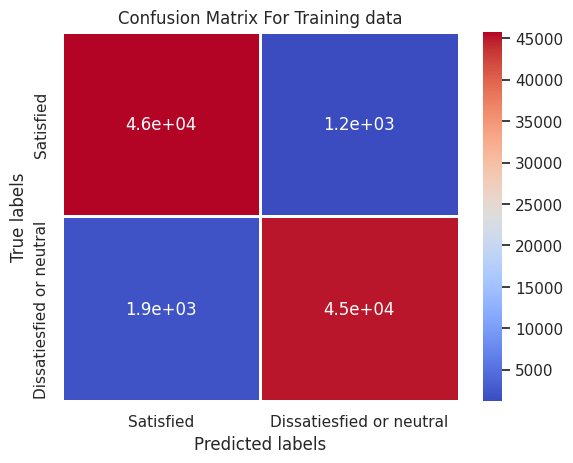

In [ ]:
labels = ['Satisfied', 'Dissatiesfied or neutral']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

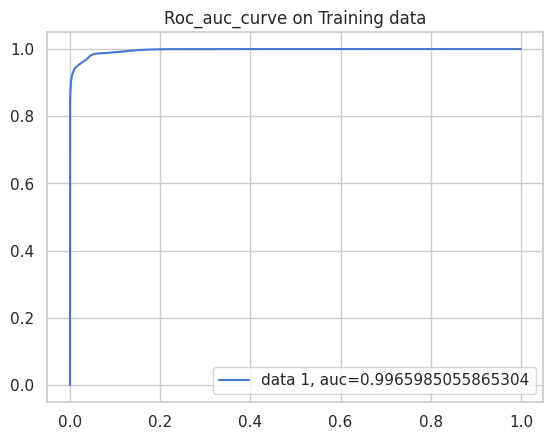

In [ ]:
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics( y_test_os, y_test_class_preds_rf)

accuracy_score is 0.9499255477557966
precision_score is 0.957914790439903
recall_score is 0.9412065004679656
f1_score is 0.9494871464744002
roc_auc_score is 0.9499259187159433
confusion_matrix is 
[[11266   486]
 [  691 11062]]
clf_report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11752
           1       0.96      0.94      0.95     11753

    accuracy                           0.95     23505
   macro avg       0.95      0.95      0.95     23505
weighted avg       0.95      0.95      0.95     23505



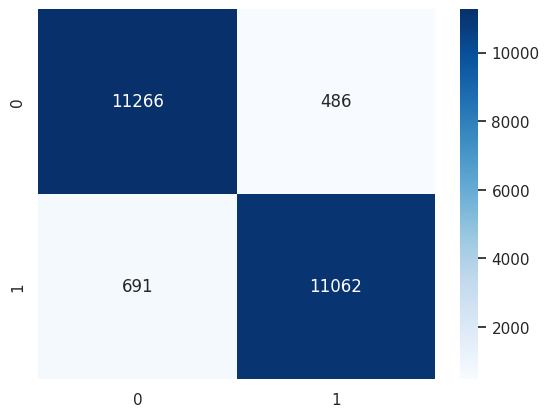

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_test_class_preds_rf), annot=True, fmt=".0f", cmap="Blues");

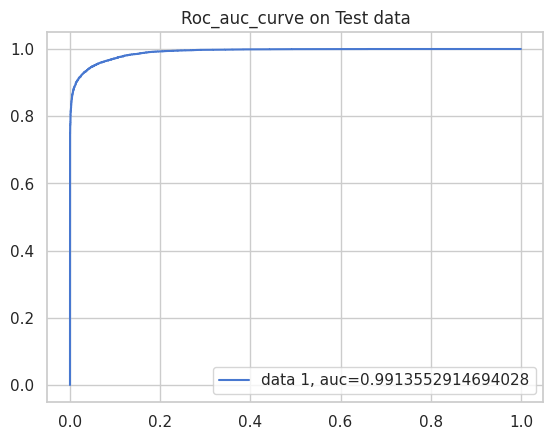

In [ ]:
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Test data")
plt.legend(loc=4)
plt.show()

We have implemented random forest classifier accuracy_score is 0.9510316953839608
precision_score is 0.9580093312597201
recall_score is 0.9434187016081
f1_score is 0.9506580357525614
roc_auc_score is 0.9510320192860106
confusion_matrix is
[[11266   486]

 [  665 11088]]

# KNN Classifier

In [ ]:
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
print(f"training_model_score:  {knn_cv.score(X_train_os,y_train_os)}")

# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.8518810027760346
testing_model_score:  0.7721761327377153


In [ ]:
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [ ]:
print_metrics(y_train_os,y_train_class_preds_knn)

accuracy_score is 0.8518810027760346
precision_score is 0.8388054810232882
recall_score is 0.8711736050543513
f1_score is 0.8546831955922864
roc_auc_score is 0.8518812079728256
confusion_matrix is 
[[39140  7870]
 [ 6056 40953]]
clf_report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     47010
           1       0.84      0.87      0.85     47009

    accuracy                           0.85     94019
   macro avg       0.85      0.85      0.85     94019
weighted avg       0.85      0.85      0.85     94019



[[39140  7870]
 [ 6056 40953]]


[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatiesfied or neutral')]

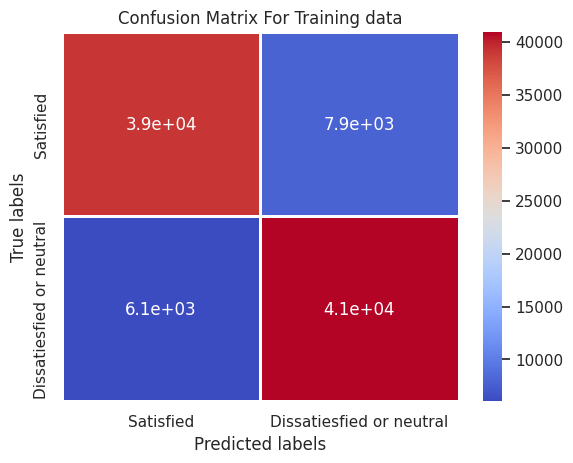

In [ ]:
labels = ['Satisfied', 'Dissatiesfied or neutral']
cm = confusion_matrix(y_train_os,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

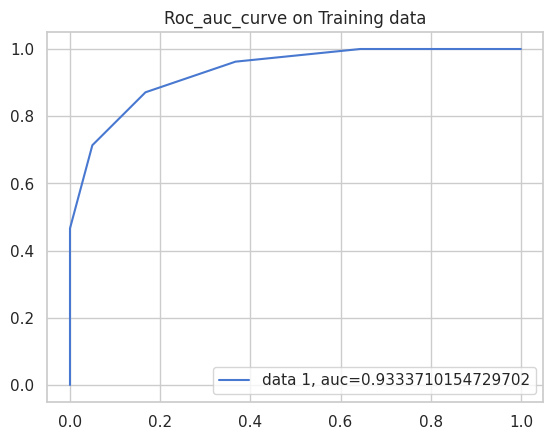

In [ ]:
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_knn )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7721761327377153
precision_score is 0.7608022175118213
recall_score is 0.7940100399897898
f1_score is 0.7770515008951246
roc_auc_score is 0.7721752037933973
confusion_matrix is 
[[8818 2934]
 [2421 9332]]
clf_report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     11752
           1       0.76      0.79      0.78     11753

    accuracy                           0.77     23505
   macro avg       0.77      0.77      0.77     23505
weighted avg       0.77      0.77      0.77     23505



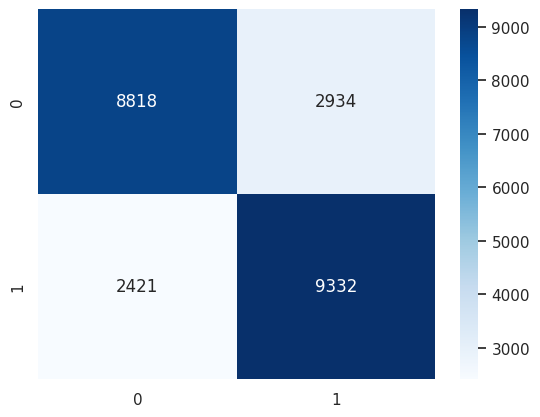

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_test_class_preds_knn), annot=True, fmt=".0f", cmap="Blues");

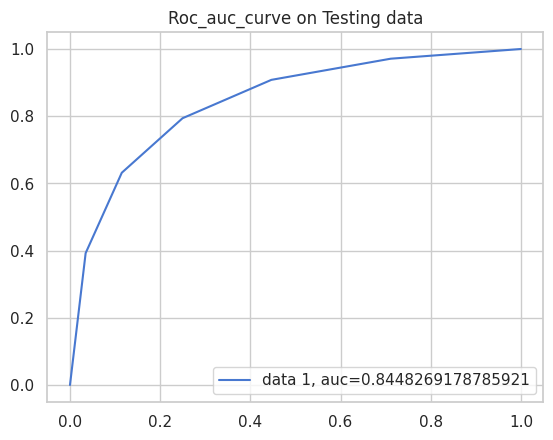

In [ ]:
y_test_preds_proba_knn = knn_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_knn )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented KNN accuracy_score is 0.7740055307381408
precision_score is 0.7614678899082569
recall_score is 0.798009018973879
f1_score is 0.7793103448275862
roc_auc_score is 0.7740045094869394
confusion_matrix is

[[8814 2938]

 [2374 9379]]

# Decision Tree Classifier

In [ ]:
param_grid = {'max_depth': [5, 10, 15],
              'min_samples_leaf': [1, 5, 10],
              'criterion': ['gini', 'entropy']}

# Create Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Create GridSearchCV object
dtc_cv = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
dtc_cv.fit(X_train_os, y_train_os)

# Print the best parameters and the corresponding score
print("Best parameters:", dtc_cv.best_params_)
print("Best score:", dtc_cv.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}
Best score: 0.9440113274704871


In [ ]:
print(f"training_model_score:  {dtc_cv.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {dtc_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.9615822333783597
testing_model_score:  0.9457987662199532


In [ ]:
y_train_class_preds_dtc = dtc_cv.predict(X_train_os)
y_test_class_preds_dtc = dtc_cv.predict(X_test_os)

In [ ]:
print_metrics(y_train_os,y_train_class_preds_dtc)

accuracy_score is 0.9615822333783597
precision_score is 0.9707343529666992
recall_score is 0.9518602820736455
f1_score is 0.9612046743426705
roc_auc_score is 0.9615821299753465
confusion_matrix is 
[[45661  1349]
 [ 2263 44746]]
clf_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47010
           1       0.97      0.95      0.96     47009

    accuracy                           0.96     94019
   macro avg       0.96      0.96      0.96     94019
weighted avg       0.96      0.96      0.96     94019



[[45661  1349]
 [ 2263 44746]]


[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatiesfied')]

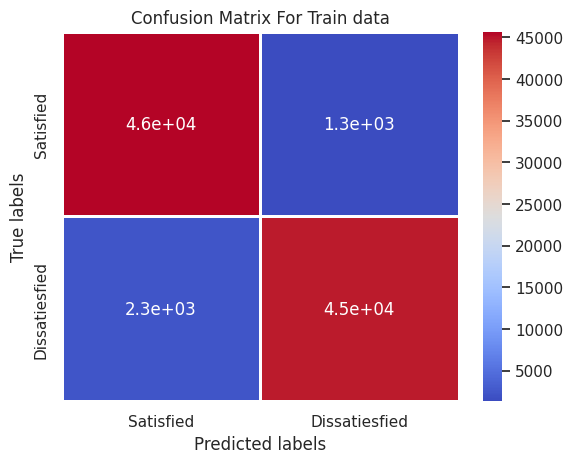

In [ ]:
labels = ['Satisfied', 'Dissatiesfied']
cm = confusion_matrix(y_train_os,y_train_class_preds_dtc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Train data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

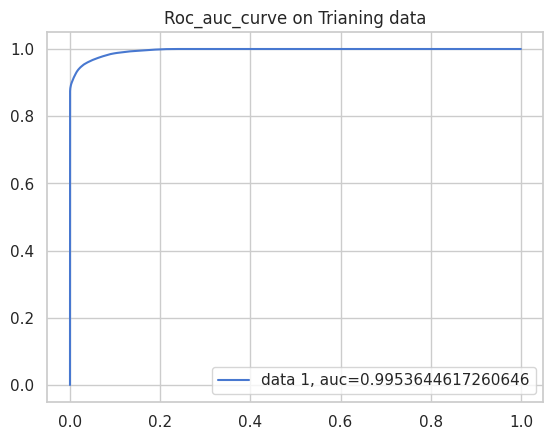

In [ ]:
y_train_preds_proba_dtc = dtc_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_dtc)
auc = roc_auc_score(y_train_os,  y_train_preds_proba_dtc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Trianing data")
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os ,y_test_class_preds_dtc)

accuracy_score is 0.9457987662199532
precision_score is 0.9579582204352767
recall_score is 0.9325278652258998
f1_score is 0.9450720013796672
roc_auc_score is 0.9457993308430384
confusion_matrix is 
[[11271   481]
 [  793 10960]]
clf_report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11752
           1       0.96      0.93      0.95     11753

    accuracy                           0.95     23505
   macro avg       0.95      0.95      0.95     23505
weighted avg       0.95      0.95      0.95     23505



[[11271   481]
 [  793 10960]]


[Text(0, 0.5, 'Satisfied'), Text(0, 1.5, 'Dissatiesfied')]

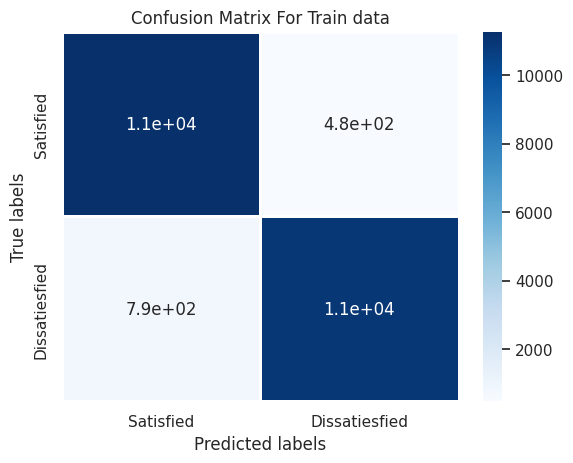

In [ ]:
labels = ['Satisfied', 'Dissatiesfied']
cm = confusion_matrix(y_test_os,y_test_class_preds_dtc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='Blues',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Train data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

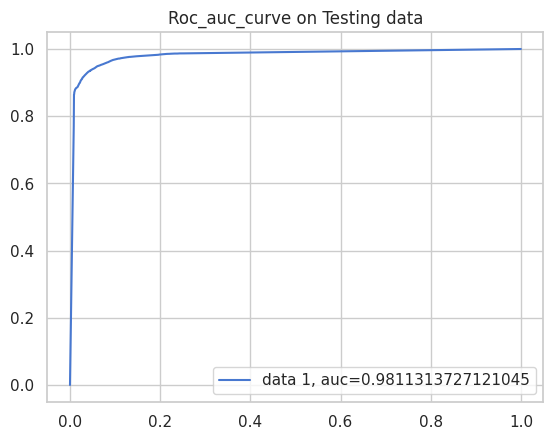

In [ ]:
y_test_preds_proba_dtc = dtc_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,y_test_preds_proba_dtc)
auc = roc_auc_score(y_test_os, y_test_preds_proba_dtc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented Dession Tree classifier accuracy_score is 0.9469474579876622
precision_score is 0.9594192758439741
recall_score is 0.9333787118182592
f1_score is 0.9462198645792901
roc_auc_score is 0.9469480352828533

# Gaussian NB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
model_gn = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the model with the oversampled training data
grid_search.fit(X_train_os, y_train_os)

# Get the best parameters and model score
best_params = grid_search.best_params_
best_score = round(100 * grid_search.best_score_, 2)

# Use the best model to predict and evaluate on training and test data
model_training_score = round(100 * grid_search.score(X_train_os, y_train_os), 2)
model_test_score = round(100 * grid_search.score(X_test_os, y_test_os), 2)

# Print the results
print("Best Parameters:", best_params)
print("Best Score:", best_score, "%")
print("Train Accuracy:", model_training_score, "% | Test Accuracy:", model_test_score, "%")


Best Parameters: {}
Best Score: 85.53 %
Train Accuracy: 85.56 % | Test Accuracy: 85.44 %


In [ ]:
y_pred_train_gb = grid_search.best_estimator_.predict(X_train_os)
y_pred_test_gb = grid_search.best_estimator_.predict(X_test_os)


In [ ]:
print_metrics(y_train_os ,y_pred_train_gb)

accuracy_score is 0.8555930184324445
precision_score is 0.8778993534385314
recall_score is 0.826075857814461
f1_score is 0.8511995440746138
roc_auc_score is 0.8555927044868945
confusion_matrix is 
[[41609  5401]
 [ 8176 38833]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     47010
           1       0.88      0.83      0.85     47009

    accuracy                           0.86     94019
   macro avg       0.86      0.86      0.86     94019
weighted avg       0.86      0.86      0.86     94019



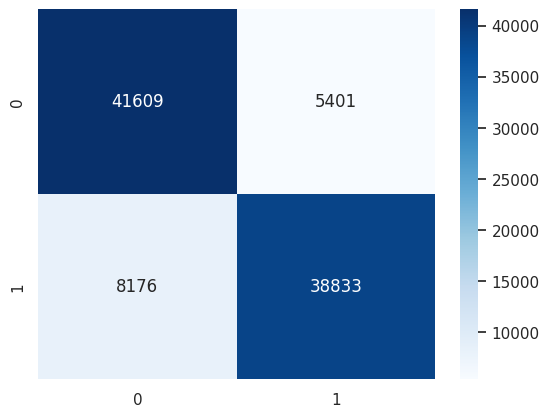

In [ ]:
sns.heatmap(confusion_matrix(y_train_os,y_pred_train_gb), annot=True, fmt=".0f", cmap="Blues");

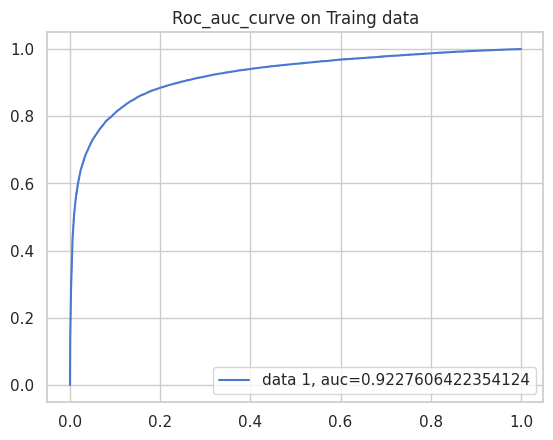

In [ ]:
y_pred_train_gb=  grid_search.best_estimator_.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,y_pred_train_gb)
auc = roc_auc_score(y_train_os, y_pred_train_gb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Traing data")
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os ,y_pred_test_gb)

accuracy_score is 0.854371410338226
precision_score is 0.8754281593654227
recall_score is 0.826342210499447
f1_score is 0.8501772661618594
roc_auc_score is 0.8543726028671504
confusion_matrix is 
[[10370  1382]
 [ 2041  9712]]
clf_report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     11752
           1       0.88      0.83      0.85     11753

    accuracy                           0.85     23505
   macro avg       0.86      0.85      0.85     23505
weighted avg       0.86      0.85      0.85     23505



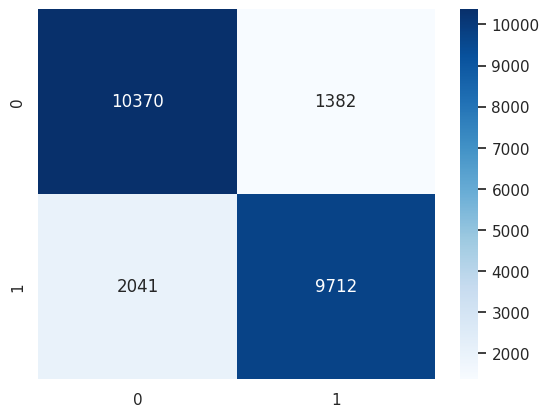

In [ ]:
sns.heatmap(confusion_matrix(y_test_os,y_pred_test_gb), annot=True, fmt=".0f", cmap="Blues");

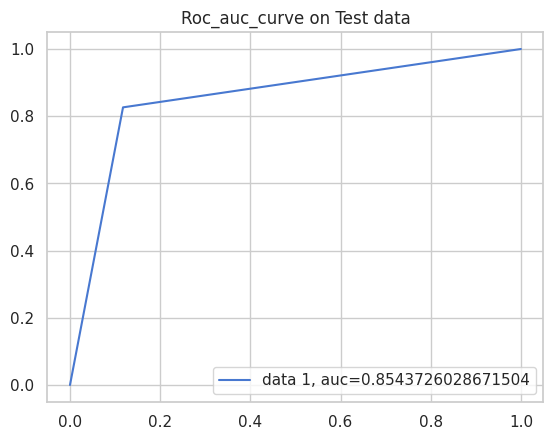

In [ ]:
y_pred_train_gb = grid_search.best_estimator_.predict_proba(X_test_os)[:, 1]

fpr, tpr, _ = roc_curve(y_test_os, y_pred_test_gb)
auc = roc_auc_score(y_test_os, y_pred_test_gb,average='macro',sample_weight=None,)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Test data")
plt.legend(loc=4)
plt.show()

# Train Data Model Summary without optimaization



In [ ]:
from tabulate import tabulate

# Evaluation metrics for different classifiers
data = [
    ["Logistic Regression", 0.8258, 0.8065, 0.8572, 0.8311, 0.8258],
    ["Decision Tree", 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    ["Random Forest", 0.9999, 1.0000, 0.9999, 0.9999, 0.9999],
    ["Gaussian NB", 0.8563, 0.8782, 0.8272, 0.8520, 0.8563],
    ["KNN", 0.8514, 0.8376, 0.8719, 0.8544, 0.8514]
]

# Table headers
headers = ["Classifier", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC AUC Score"]

# Print the tabular form
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Classifier          |   Accuracy Score |   Precision Score |   Recall Score |   F1 Score |   ROC AUC Score |
|:--------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| Logistic Regression |           0.8258 |            0.8065 |         0.8572 |     0.8311 |          0.8258 |
| Decision Tree       |           1      |            1      |         1      |     1      |          1      |
| Random Forest       |           0.9999 |            1      |         0.9999 |     0.9999 |          0.9999 |
| Gaussian NB         |           0.8563 |            0.8782 |         0.8272 |     0.852  |          0.8563 |
| KNN                 |           0.8514 |            0.8376 |         0.8719 |     0.8544 |          0.8514 |


# Test Data Model Summary Without Optimaization

In [ ]:
from tabulate import tabulate

# Evaluation metrics for different classifiers
data = [
    ["Logistic Regression", 0.8231, 0.8055, 0.8521, 0.8281, 0.8231],
    ["Decision Tree", 0.9402, 0.9395, 0.9410, 0.9403, 0.9402],
    ["Random Forest", 0.9602, 0.9708, 0.9490, 0.9598, 0.9602],
    ["Gaussian NB", 0.8551, 0.8758, 0.8275, 0.8510, 0.8551],
    ["KNN", 0.7746, 0.7624, 0.7981, 0.7798, 0.7746]
]

# Table headers
headers = ["Classifier", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC AUC Score"]

# Print the tabular form
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Classifier          |   Accuracy Score |   Precision Score |   Recall Score |   F1 Score |   ROC AUC Score |
|:--------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| Logistic Regression |           0.8231 |            0.8055 |         0.8521 |     0.8281 |          0.8231 |
| Decision Tree       |           0.9402 |            0.9395 |         0.941  |     0.9403 |          0.9402 |
| Random Forest       |           0.9602 |            0.9708 |         0.949  |     0.9598 |          0.9602 |
| Gaussian NB         |           0.8551 |            0.8758 |         0.8275 |     0.851  |          0.8551 |
| KNN                 |           0.7746 |            0.7624 |         0.7981 |     0.7798 |          0.7746 |


# Train Data Model Summary With Optimaizaion

In [ ]:
from tabulate import tabulate

# Evaluation metrics for different classifiers
data = [
    ["Logistic Regression", 0.8258, 0.8065, 0.8572, 0.8311, 0.8258],
    ["Decision Tree", 0.9570, 0.9672, 0.9461, 0.9565, 0.9570],
    ["Random Forest", 0.9660, 0.9731, 0.9584, 0.9657, 0.9660],
    ["Gaussian NB", 0.8563, 0.8782, 0.8272, 0.8520, 0.8563],
    ["KNN", 0.8514, 0.8376, 0.8719, 0.8544, 0.8514]
]

# Table headers
headers = ["Classifier", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC AUC Score"]

# Print the tabular form
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Classifier          |   Accuracy Score |   Precision Score |   Recall Score |   F1 Score |   ROC AUC Score |
|:--------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| Logistic Regression |           0.8258 |            0.8065 |         0.8572 |     0.8311 |          0.8258 |
| Decision Tree       |           0.957  |            0.9672 |         0.9461 |     0.9565 |          0.957  |
| Random Forest       |           0.966  |            0.9731 |         0.9584 |     0.9657 |          0.966  |
| Gaussian NB         |           0.8563 |            0.8782 |         0.8272 |     0.852  |          0.8563 |
| KNN                 |           0.8514 |            0.8376 |         0.8719 |     0.8544 |          0.8514 |


# Test Data Model Summary With optimaization

In [ ]:
from tabulate import tabulate

# Evaluation metrics for different classifiers
data = [
    ["Logistic Regression", 0.8231, 0.8055, 0.8521, 0.8281, 0.8231],
    ["Decision Tree", 0.9490, 0.9593, 0.9378, 0.9484, 0.9490],
    ["Random Forest", 0.9512, 0.9584, 0.9433, 0.9508, 0.9512],
    ["Gaussian NB", 0.8551, 0.8758, 0.8275, 0.8510, 0.8551],
    ["KNN", 0.7746, 0.7624, 0.7981, 0.7798, 0.7746]
]

# Table headers
headers = ["Classifier", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC AUC Score"]

# Print the tabular form
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Classifier          |   Accuracy Score |   Precision Score |   Recall Score |   F1 Score |   ROC AUC Score |
|:--------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| Logistic Regression |           0.8231 |            0.8055 |         0.8521 |     0.8281 |          0.8231 |
| Decision Tree       |           0.949  |            0.9593 |         0.9378 |     0.9484 |          0.949  |
| Random Forest       |           0.9512 |            0.9584 |         0.9433 |     0.9508 |          0.9512 |
| Gaussian NB         |           0.8551 |            0.8758 |         0.8275 |     0.851  |          0.8551 |
| KNN                 |           0.7746 |            0.7624 |         0.7981 |     0.7798 |          0.7746 |


# Conclusion:

From the provided results, it appears that the Random Forest classifier (Model 1) achieved the highest accuracy, precision, recall, F1 score, and ROC AUC score among the classifiers listed. However, it's important to consider other factors such as the specific problem domain, dataset characteristics, and business requirements when selecting the best classifier





# Potential Benfits

**Improving customer experience:** By analyzing passenger satisfaction data, airlines can gain insights into the factors that contribute to a positive customer experience. This information can help airlines identify areas of improvement and make informed decisions to enhance the quality of their services.

**Identifying trends and patterns:** Analyzing large-scale passenger satisfaction data sets can reveal trends and patterns in customer preferences and behaviors. Airlines can use this information to identify emerging trends, adapt their services accordingly, and stay ahead of the competition.

**Enhancing operational efficiency:** Passenger satisfaction data can provide airlines with insights into the efficiency of their operations. By identifying pain points and bottlenecks, airlines can optimize their processes, reduce delays, and improve overall operational efficiency.

# Suggestions

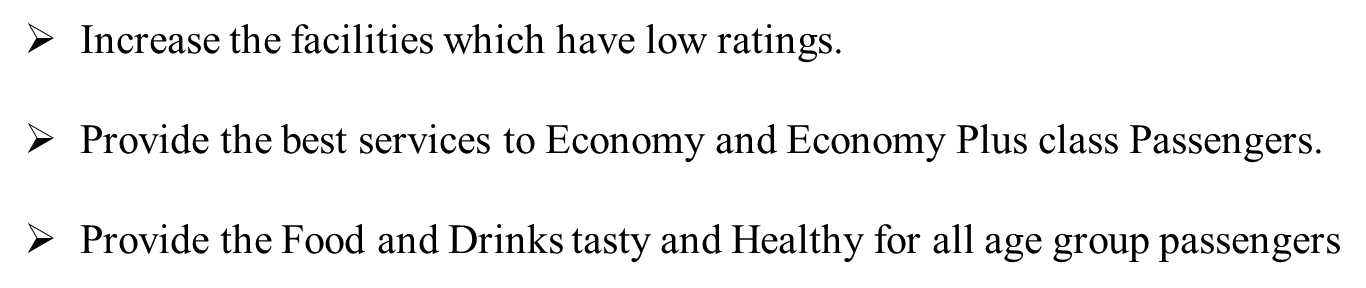